In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
import seaborn as sns
import copy


In [3]:
from acled_vis import *

In [4]:
frame = pd.read_csv("01-2017-10-2018-afghanistan.csv")
b_frame = pd.read_csv('afghanistan.csv')

In [5]:
mali_bframe = pd.read_csv('mali.csv')
mali_aframe = pd.read_csv('01-2010-10-2018-mali.csv')
niger_bframe = pd.read_csv('niger.csv')
niger_aframe = pd.read_csv('01-2010-10-2018-niger.csv')
somalia_bframe = pd.read_csv('somalia.csv')
somalia_aframe = pd.read_csv('01-2010-10-2018-somalia.csv')
southsudan_bframe = pd.read_csv('southsudan.csv')
southsudan_aframe = pd.read_csv('01-2010-10-2018-southsudan.csv')
display(somalia_aframe)

data_id  iso event_id_cnty  event_id_no_cnty event_date  year  \
0      1885131  706      SOM26765           26765.0   6-Oct-18  2018   
1      1885132  706      SOM26766           26766.0   6-Oct-18  2018   
2      1885133  706      SOM26767           26767.0   6-Oct-18  2018   
3      1885124  706      SOM26758           26758.0   5-Oct-18  2018   
4      1885125  706      SOM26759           26759.0   5-Oct-18  2018   
5      1885126  706      SOM26760           26760.0   5-Oct-18  2018   
6      1885127  706      SOM26761           26761.0   5-Oct-18  2018   
7      1885128  706      SOM26762           26762.0   5-Oct-18  2018   
8      1885129  706      SOM26763           26763.0   5-Oct-18  2018   
9      1885130  706      SOM26764           26764.0   5-Oct-18  2018   
10     1885120  706      SOM26754           26754.0   4-Oct-18  2018   
11     1885121  706      SOM26755           26755.0   4-Oct-18  2018   
12     1885122  706      SOM26756           26756.0   4-Oct-18  2018   
13     1885123  706      SOM26757           26757.0   4-Oct-18  2018   
14     1885113  706      SOM26747           26747.0   3-Oct-18  2018   
15     1885114  706      SOM26748           26748.0   3-Oct-18  2018   
16     1885115  706      SOM26749           26749.0   3-Oct-18  2018   
17     1885116  706      SOM26750           26750.0   3-Oct-18  2018   
18     1885117  706      SOM26751           26751.0   3-Oct-18  2018   
19     1885118  706      SOM26752           26752.0   3-Oct-18  2018   
20     1885119  706      SOM26753           26753.0   3-Oct-18  2018   
21     1885108  706      SOM26742           26742.0   2-Oct-18  2018   
22     1885109  706      SOM26743           26743.0   2-Oct-18  2018   
23     1885110  706      SOM26744           26744.0   2-Oct-18  2018   
24     1885111  706      SOM26745           26745.0   2-Oct-18  2018   
25     1885112  706      SOM26746           26746.0   2-Oct-18  2018   
26     1885097  706      SOM26731           26731.0   1-Oct-18  2018   
27     1885098  706      SOM26732           26732.0   1-Oct-18  2018   
28     1885099  706      SOM26733           26733.0   1-Oct-18  2018   
29     1885100  706      SOM26734           26734.0   1-Oct-18  2018   
...        ...  ...           ...               ...        ...   ...   
21054  1531048  706       SOM5607            5607.0   8-Jan-10  2010   
21055  1531049  706       SOM5608            5608.0   8-Jan-10  2010   
21056  1531067  706       SOM5606            5606.0   7-Jan-10  2010   
21057  1531068  706       SOM5602            5602.0   7-Jan-10  2010   
21058  1531054  706       SOM5605            5605.0   7-Jan-10  2010   
21059  1531069  706       SOM5604            5604.0   7-Jan-10  2010   
21060  1531070  706       SOM5603            5603.0   7-Jan-10  2010   
21061   544343  706       SOM5601            5601.0   5-Jan-10  2010   
21062   544342  706       SOM5600            5600.0   5-Jan-10  2010   
21063  1531105  706       SOM5598            5598.0   4-Jan-10  2010   
21064  1531106  706       SOM5596            5596.0   4-Jan-10  2010   
21065  1531107  706       SOM5595            5595.0   4-Jan-10  2010   
21066  1531116  706       SOM5594            5594.0   4-Jan-10  2010   
21067  1531117  706       SOM5589            5589.0   4-Jan-10  2010   
21068  1531118  706       SOM5593            5593.0   4-Jan-10  2010   
21069  1531120  706       SOM5599            5599.0   4-Jan-10  2010   
21070  1531121  706       SOM5597            5597.0   4-Jan-10  2010   
21071  1531108  706       SOM5592            5592.0   4-Jan-10  2010   
21072  1531122  706       SOM5591            5591.0   4-Jan-10  2010   
21073  1531123  706       SOM5590            5590.0   4-Jan-10  2010   
21074  1531109  706       SOM5586            5586.0   4-Jan-10  2010   
21075  1531115  706       SOM5587            5587.0   4-Jan-10  2010   
21076  1531119  706       SOM5588            5588.0   4-Jan-10  2010   
21077  1531140  706       SOM5584            55

In [6]:

#get groups by admin zone and list of zone names
admin1_acled_g = frame.groupby('admin1')
admin1_acled = list(admin1_acled_g.groups.keys())
admin1_bucket_g = b_frame.groupby('admin1_name')
admin1_bucket = list(admin1_bucket_g.groups.keys())

#print the suspected typo in the website download
print('num bucket: {}, num acled: {}'.format(admin1_bucket_g.ngroups, admin1_acled_g.ngroups))
print('count of Ghanzi entries: {}, count of Ghazni entries: {}'.format(admin1_acled_g.event_id_cnty.get_group('Ghanzi').count(), admin1_acled_g.event_id_cnty.get_group('Ghazni').count()))
admin1_acled.remove("Ghanzi")
#print comparison list without typo, note the spelling discrepancies
admin_codes = []
for i in range(0, 34):
    print("acled: {}, bucket: {}".format(admin1_acled[i], admin1_bucket[i]))
    code = list(admin1_bucket_g.admin1_code.get_group(admin1_bucket[i]))
    admin_codes.extend(code)


#fix the spellings (change website to match bucket)
frame.admin1[(frame['admin1'] == 'Helmand')] = 'Hilmand'
frame.admin1[(frame['admin1'] == 'Herat')] = 'Hirat'
frame.admin1[(frame['admin1'] == 'Jowzjan')] = 'Jawzjan'
frame.admin1[(frame['admin1'] == 'Nimruz')] = 'Nimroz'
frame.admin1[(frame['admin1'] == 'Paktia')] = 'Paktya'
frame.admin1[(frame['admin1'] == 'Panjshir')] = 'Panjsher'
frame.admin1[(frame['admin1'] == 'Sar-e Pol')] = 'Sari pul'
frame.admin1[(frame['admin1'] == 'Urozgan')] = 'Uruzgan'
frame.admin1[(frame['admin1'] == 'Ghanzi')] = 'Ghazni'

# need to regroup frames after adjustment 
admin1_acled_g = frame.groupby('admin1')
admin1_acled = list(admin1_acled_g.groups.keys())
admin1_bucket_g = b_frame.groupby('admin1_name')
admin1_bucket = list(admin1_bucket_g.groups.keys())

#verify that the regions have been fixed
print('num bucket: {}, num acled: {}'.format(admin1_bucket_g.ngroups, admin1_acled_g.ngroups))
admin_codes = []
for i in range(0, 34):
    print("acled: {}, bucket: {}, matches: {}".format(admin1_acled[i], admin1_bucket[i], admin1_acled[i] == admin1_bucket[i]))

num bucket: 34, num acled: 35
count of Ghanzi entries: 3, count of Ghazni entries: 1275
acled: Badakhshan, bucket: Badakhshan
acled: Badghis, bucket: Badghis
acled: Baghlan, bucket: Baghlan
acled: Balkh, bucket: Balkh
acled: Bamyan, bucket: Bamyan
acled: Daykundi, bucket: Daykundi
acled: Farah, bucket: Farah
acled: Faryab, bucket: Faryab
acled: Ghazni, bucket: Ghazni
acled: Ghor, bucket: Ghor
acled: Helmand, bucket: Hilmand
acled: Herat, bucket: Hirat
acled: Jowzjan, bucket: Jawzjan
acled: Kabul, bucket: Kabul
acled: Kandahar, bucket: Kandahar
acled: Kapisa, bucket: Kapisa
acled: Khost, bucket: Khost
acled: Kunar, bucket: Kunar
acled: Kunduz, bucket: Kunduz
acled: Laghman, bucket: Laghman
acled: Logar, bucket: Logar
acled: Nangarhar, bucket: Nangarhar
acled: Nimruz, bucket: Nimroz
acled: Nuristan, bucket: Nuristan
acled: Paktia, bucket: Paktika
acled: Paktika, bucket: Paktya
acled: Panjshir, bucket: Panjsher
acled: Parwan, bucket: Parwan
acled: Samangan, bucket: Samangan
acled: Sar-e P

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

num bucket: 34, num acled: 34
acled: Badakhshan, bucket: Badakhshan, matches: True
acled: Badghis, bucket: Badghis, matches: True
acled: Baghlan, bucket: Baghlan, matches: True
acled: Balkh, bucket: Balkh, matches: True
acled: Bamyan, bucket: Bamyan, matches: True
acled: Daykundi, bucket: Daykundi, matches: True
acled: Farah, bucket: Farah, matches: True
acled: Faryab, bucket: Faryab, matches: True
acled: Ghazni, bucket: Ghazni, matches: True
acled: Ghor, bucket: Ghor, matches: True
acled: Hilmand, bucket: Hilmand, matches: True
acled: Hirat, bucket: Hirat, matches: True
acled: Jawzjan, bucket: Jawzjan, matches: True
acled: Kabul, bucket: Kabul, matches: True
acled: Kandahar, bucket: Kandahar, matches: True
acled: Kapisa, bucket: Kapisa, matches: True
acled: Khost, bucket: Khost, matches: True
acled: Kunar, bucket: Kunar, matches: True
acled: Kunduz, bucket: Kunduz, matches: True
acled: Laghman, bucket: Laghman, matches: True
acled: Logar, bucket: Logar, matches: True
acled: Nangarhar,

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
print('afghanistan')
index_by_event_date(frame)
print('mali')
index_by_event_date(mali_aframe)
print('niger')
index_by_event_date(niger_aframe)
print('somalia')
index_by_event_date(somalia_aframe)
print('southsudan')
index_by_event_date(southsudan_aframe)

afghanistan
0    29-Sep-18
1    29-Sep-18
2    29-Sep-18
3    29-Sep-18
4    29-Sep-18
Name: event_date, dtype: object
month code: 9
mali
0    6-Oct-18
1    5-Oct-18
2    5-Oct-18
3    5-Oct-18
4    4-Oct-18
Name: event_date, dtype: object
month code: 10
niger
0     5-Oct-18
1    29-Sep-18
2    27-Sep-18
3    25-Sep-18
4    25-Sep-18
Name: event_date, dtype: object
month code: 10
somalia
0    6-Oct-18
1    6-Oct-18
2    6-Oct-18
3    5-Oct-18
4    5-Oct-18
Name: event_date, dtype: object
month code: 10
southsudan
0    5-Oct-18
1    4-Oct-18
2    2-Oct-18
3    2-Oct-18
4    1-Oct-18
Name: event_date, dtype: object
month code: 10


In [119]:
display(frame)

data_id  iso event_id_cnty  event_id_no_cnty  \
event_date                                                                
2018-09-29 00:00:00+00:00  1876688    4      AFG14197             14197   
2018-09-29 00:00:00+00:00  1876689    4      AFG14198             14198   
2018-09-29 00:00:00+00:00  1876690    4      AFG14199             14199   
2018-09-29 00:00:00+00:00  1876691    4      AFG14200             14200   
2018-09-29 00:00:00+00:00  1876692    4      AFG14201             14201   
2018-09-29 00:00:00+00:00  1876693    4      AFG14202             14202   
2018-09-29 00:00:00+00:00  1876694    4      AFG14203             14203   
2018-09-29 00:00:00+00:00  1876695    4      AFG14204             14204   
2018-09-29 00:00:00+00:00  1876696    4      AFG14205             14205   
2018-09-28 00:00:00+00:00  1876677    4      AFG14186             14186   
2018-09-28 00:00:00+00:00  1876678    4      AFG14187             14187   
2018-09-28 00:00:00+00:00  1876679    4      AFG14188             14188   
2018-09-28 00:00:00+00:00  1876680    4      AFG14189             14189   
2018-09-28 00:00:00+00:00  1876681    4      AFG14190             14190   
2018-09-28 00:00:00+00:00  1876682    4      AFG14191             14191   
2018-09-28 00:00:00+00:00  1876683    4      AFG14192             14192   
2018-09-28 00:00:00+00:00  1876684    4      AFG14193             14193   
2018-09-28 00:00:00+00:00  1876685    4      AFG14194             14194   
2018-09-28 00:00:00+00:00  1876686    4      AFG14195             14195   
2018-09-28 00:00:00+00:00  1876687    4      AFG14196             14196   
2018-09-27 00:00:00+00:00  1876657    4      AFG14166             14166   
2018-09-27 00:00:00+00:00  1876658    4      AFG14167             14167   
2018-09-27 00:00:00+00:00  1876659    4      AFG14168             14168   
2018-09-27 00:00:00+00:00  1876660    4      AFG14169             14169   
2018-09-27 00:00:00+00:00  1876661    4      AFG14170             14170   
2018-09-27 00:00:00+00:00  1876662    4      AFG14171             14171   
2018-09-27 00:00:00+00:00  1876663    4      AFG14172             14172   
2018-09-27 00:00:00+00:00  1876664    4      AFG14173             14173   
2018-09-27 00:00:00+00:00  1876665    4      AFG14174             14174   
2018-09-27 00:00:00+00:00  1876666    4      AFG14175             14175   
...                            ...  ...           ...               ...   
2017-01-01 00:00:00+00:00  1436287    4         AFG12                12   
2017-01-01 00:00:00+00:00  1436288    4         AFG13                13   
2017-01-01 00:00:00+00:00  1436289    4         AFG14                14   
2017-01-01 00:00:00+00:00  1436290    4         AFG15                15   
2017-01-01 00:00:00+00:00  1436291    4         AFG16                16   
2017-01-01 00:00:00+00:00  1436292    4         AFG17                17   
2017-01-01 00:00:00+00:00  1436293    4         AFG18                18   
2017-01-01 00:00:00+00:00  1436294    4         AFG19                19   
2017-01-01 00:00:00+00:00  1436295    4         AFG20                20   
2017-01-01 00:00:00+00:00  1436296    4         AFG21                21   
2017-01-01 00:00:00+00:00  1594409    4         AFG22                22   
2017-01-01 00:00:00+00:00  1594418    4         AFG23                23   
2017-01-01 00:00:00+00:00  1594422    4         AFG24                24   
2017-01-01 00:00:00+00:00  1436300    4         AFG25                25   
2017-01-01 00:00:00+00:00  1436301    4         AFG26                26   
2017-01-01 00:00:00+00:00  1436302    4         AFG27                27   
2017-01-01 00:00:00+00:00  1436303    4         AFG28                28   
2017-01-01 00:00:00+00:00  1436304    4         AFG29                29   
2017-01-01 00:00:00+00:00  1594463    4         AFG30                30   
2017-01-01 00:00:00+00:00  1594468    4         AFG31                31   
2017-01-01 00:00:00+00:00  1436307    4         AFG3

In [7]:
print('afghanistan')
display(frame.describe())
display(frame['fatalities'].isna().sum())
display((frame['fatalities']==0).astype(int).sum(axis=0))
print('mali')
display(mali_aframe.describe())
display(mali_aframe['fatalities'].isna().sum())
display((mali_aframe['fatalities']==0).astype(int).sum(axis=0))
print('niger')
display(niger_aframe.describe())
display(niger_aframe['fatalities'].isna().sum())
display((niger_aframe['fatalities']==0).astype(int).sum(axis=0))
print('somalia')
display(somalia_aframe.describe())
display(somalia_aframe['fatalities'].isna().sum())
display((somalia_aframe['fatalities']==0).astype(int).sum(axis=0))
print('southsudan')
display(southsudan_aframe.describe())
display(southsudan_aframe['fatalities'].isna().sum())
display((southsudan_aframe['fatalities']==0).astype(int).sum(axis=0))

afghanistan


data_id      iso  event_id_no_cnty          year  time_precision  \
count  1.404500e+04  14045.0      14045.000000  14045.000000    14045.000000   
mean   1.518722e+06      4.0       7064.786828   2017.428124        1.153008   
std    1.630280e+05      0.0       4104.790297      0.494824        0.361390   
min    1.045371e+06      4.0          1.000000   2017.000000        1.000000   
25%    1.387492e+06      4.0       3512.000000   2017.000000        1.000000   
50%    1.420558e+06      4.0       7032.000000   2017.000000        1.000000   
75%    1.684251e+06      4.0      10581.000000   2018.000000        1.000000   
max    1.882498e+06      4.0      14205.000000   2018.000000        3.000000   

             inter1        inter2   interaction  admin3      latitude  \
count  14045.000000  14045.000000  14045.000000     0.0  14045.000000   
mean       1.891776      2.021218     16.230402     NaN     34.048578   
std        1.608851      1.559000     11.168036     NaN      1.563218   
min        1.000000      0.000000     10.000000     NaN     29.420900   
25%        1.000000      1.000000     12.000000     NaN     32.820100   
50%        1.000000      2.000000     12.000000     NaN     34.103200   
75%        2.000000      2.000000     13.000000     NaN     34.949000   
max        8.000000      8.000000     88.000000     NaN     38.443500   

          longitude  geo_precision    fatalities     timestamp  
count  14045.000000   14045.000000  14045.000000  1.404500e+04  
mean      67.654643       1.972873      5.980491  1.527265e+09  
std        2.635662       0.615860      9.081292  4.769644e+06  
min       60.894400       1.000000      0.000000  1.523277e+09  
25%       65.387900       2.000000      1.000000  1.524054e+09  
50%       68.579400       2.000000      4.000000  1.524054e+09  
75%       69.920400       2.000000      7.000000  1.531176e+09  
max       71.600200       3.000000    225.000000  1.538773e+09

0

2375

mali


data_id          iso  event_id_no_cnty         year  \
count  2.130000e+03  2130.000000       2130.000000  2130.000000   
mean   1.340288e+06   466.182160       1227.631455  2015.398122   
std    4.608634e+05     8.407017        642.282600     2.295092   
min    2.455930e+05   466.000000        106.000000  2010.000000   
25%    1.380266e+06   466.000000        670.250000  2013.000000   
50%    1.463932e+06   466.000000       1239.500000  2016.000000   
75%    1.514154e+06   466.000000       1785.750000  2017.000000   
max    1.884506e+06   854.000000       2319.000000  2018.000000   

       time_precision       inter1       inter2  interaction     latitude  \
count     2130.000000  2130.000000  2130.000000  2130.000000  2130.000000   
mean         1.096244     3.290141     3.903286    29.793897    15.913203   
std          0.367331     2.010855     3.021768    15.162321     2.028340   
min          1.000000     1.000000     0.000000    10.000000    10.316700   
25%          1.000000     2.000000     1.000000    17.000000    14.530600   
50%          1.000000     3.000000     3.000000    28.000000    15.918200   
75%          1.000000     4.000000     7.000000    37.000000    16.770500   
max          3.000000     8.000000     8.000000    88.000000    22.674400   

         longitude  geo_precision   fatalities     timestamp  
count  2130.000000    2130.000000  2130.000000  2.130000e+03  
mean     -2.152750       1.403286     2.313146  1.525003e+09  
std       3.269157       0.549382     6.114230  5.813261e+06  
min     -12.199400       1.000000     0.000000  1.515624e+09  
25%      -4.281700       1.000000     0.000000  1.524054e+09  
50%      -2.219800       1.000000     0.000000  1.524054e+09  
75%       0.856000       2.000000     2.000000  1.524054e+09  
max       3.709500       3.000000   111.000000  1.539017e+09

0

1188

niger


data_id    iso  event_id_no_cnty         year  time_precision  \
count  3.770000e+02  377.0        377.000000   377.000000      377.000000   
mean   1.436026e+06  562.0        458.745358  2015.742706        1.076923   
std    3.295171e+05    0.0        126.894155     2.015922        0.329285   
min    2.507400e+05  562.0         85.000000  2010.000000        1.000000   
25%    1.416474e+06  562.0        357.000000  2015.000000        1.000000   
50%    1.457330e+06  562.0        463.000000  2016.000000        1.000000   
75%    1.528884e+06  562.0        565.000000  2017.000000        1.000000   
max    1.884517e+06  562.0        666.000000  2018.000000        3.000000   

           inter1      inter2  interaction    latitude   longitude  \
count  377.000000  377.000000   377.000000  377.000000  377.000000   
mean     3.071618    2.819629    26.923077   14.271165    7.605216   
std      1.857322    2.721924    17.448615    1.586385    5.098453   
min      1.000000    0.000000    10.000000   12.755500    0.276400   
25%      2.000000    1.000000    12.000000   13.520000    2.120000   
50%      2.000000    1.000000    23.000000   13.650000    7.990000   
75%      5.000000    7.000000    37.000000   14.424400   12.849700   
max      8.000000    8.000000    80.000000   23.230700   13.640000   

       geo_precision  fatalities     timestamp  
count     377.000000  377.000000  3.770000e+02  
mean        1.427056    5.122016  1.525694e+09  
std         0.606358   16.224849  4.961619e+06  
min         1.000000    0.000000  1.515624e+09  
25%         1.000000    0.000000  1.524054e+09  
50%         1.000000    0.000000  1.524054e+09  
75%         2.000000    4.000000  1.524054e+09  
max         3.000000  230.000000  1.539017e+09

0

191

somalia


data_id      iso  event_id_no_cnty          year  time_precision  \
count  2.108400e+04  21084.0      21083.000000  21084.000000    21084.000000   
mean   1.404261e+06    706.0      16177.811222   2014.391339        1.020063   
std    2.820398e+05      0.0       6113.204367      2.345203        0.146827   
min    5.365600e+05    706.0       1833.000000   2010.000000        1.000000   
25%    1.423818e+06    706.0      10903.500000   2013.000000        1.000000   
50%    1.478024e+06    706.0      16180.000000   2014.000000        1.000000   
75%    1.508486e+06    706.0      21459.500000   2016.000000        1.000000   
max    1.885133e+06    706.0      26767.000000   2018.000000        3.000000   

             inter1        inter2   interaction  admin3      latitude  \
count  21084.000000  21084.000000  21084.000000     0.0  21084.000000   
mean       3.137213      3.423070     26.166667     NaN      3.656581   
std        2.425986      2.483453     15.318798     NaN      2.957742   
min        1.000000      0.000000     10.000000     NaN     -1.650000   
25%        1.000000      2.000000     12.000000     NaN      2.033300   
50%        2.000000      2.000000     27.000000     NaN      2.150000   
75%        4.000000      7.000000     37.000000     NaN      4.736000   
max        8.000000      8.000000     88.000000     NaN     11.966600   

          longitude  geo_precision    fatalities     timestamp  
count  21084.000000   21084.000000  21084.000000  2.108400e+04  
mean      45.057043       1.138541      1.722823  1.524363e+09  
std        1.795795       0.373576      6.573892  3.305299e+06  
min       41.008900       1.000000      0.000000  1.518766e+09  
25%       44.066800       1.000000      0.000000  1.524054e+09  
50%       45.300300       1.000000      0.000000  1.524054e+09  
75%       45.390000       1.000000      1.000000  1.524054e+09  
max       51.266800       3.000000    587.000000  1.539034e+09

0

11705

southsudan


data_id     iso  event_id_no_cnty         year  time_precision  \
count  5.182000e+03  5182.0       5182.000000  5182.000000     5182.000000   
mean   1.393341e+06   728.0       2639.061752  2015.430143        1.252219   
std    2.663250e+05     0.0       1513.544074     1.683292        0.530365   
min    5.614530e+05   728.0          1.000000  2011.000000        1.000000   
25%    1.409102e+06   728.0       1333.250000  2014.000000        1.000000   
50%    1.453844e+06   728.0       2641.500000  2016.000000        1.000000   
75%    1.488112e+06   728.0       3944.750000  2017.000000        1.000000   
max    1.885162e+06   728.0       5525.000000  2018.000000        3.000000   

            inter1       inter2  interaction     latitude    longitude  \
count  5182.000000  5182.000000  5182.000000  5182.000000  5182.000000   
mean      2.412389     3.839637    25.478194     7.137479    30.754400   
std       1.708191     2.710782    16.332053     2.080911     1.753365   
min       1.000000     0.000000    10.000000     3.550000    24.417000   
25%       1.000000     2.000000    12.000000     4.860900    29.715100   
50%       2.000000     3.000000    17.000000     7.273300    31.034800   
75%       3.000000     7.000000    37.000000     9.010000    31.666700   
max       8.000000     8.000000    88.000000    12.037500    34.430000   

       geo_precision   fatalities     timestamp  
count    5182.000000  5182.000000  5.182000e+03  
mean        1.477229     5.904284  1.524263e+09  
std         0.598333    29.628129  3.045164e+06  
min         1.000000     0.000000  1.518766e+09  
25%         1.000000     0.000000  1.524054e+09  
50%         1.000000     0.000000  1.524054e+09  
75%         2.000000     3.000000  1.524054e+09  
max         3.000000   750.000000  1.539034e+09

0

2694

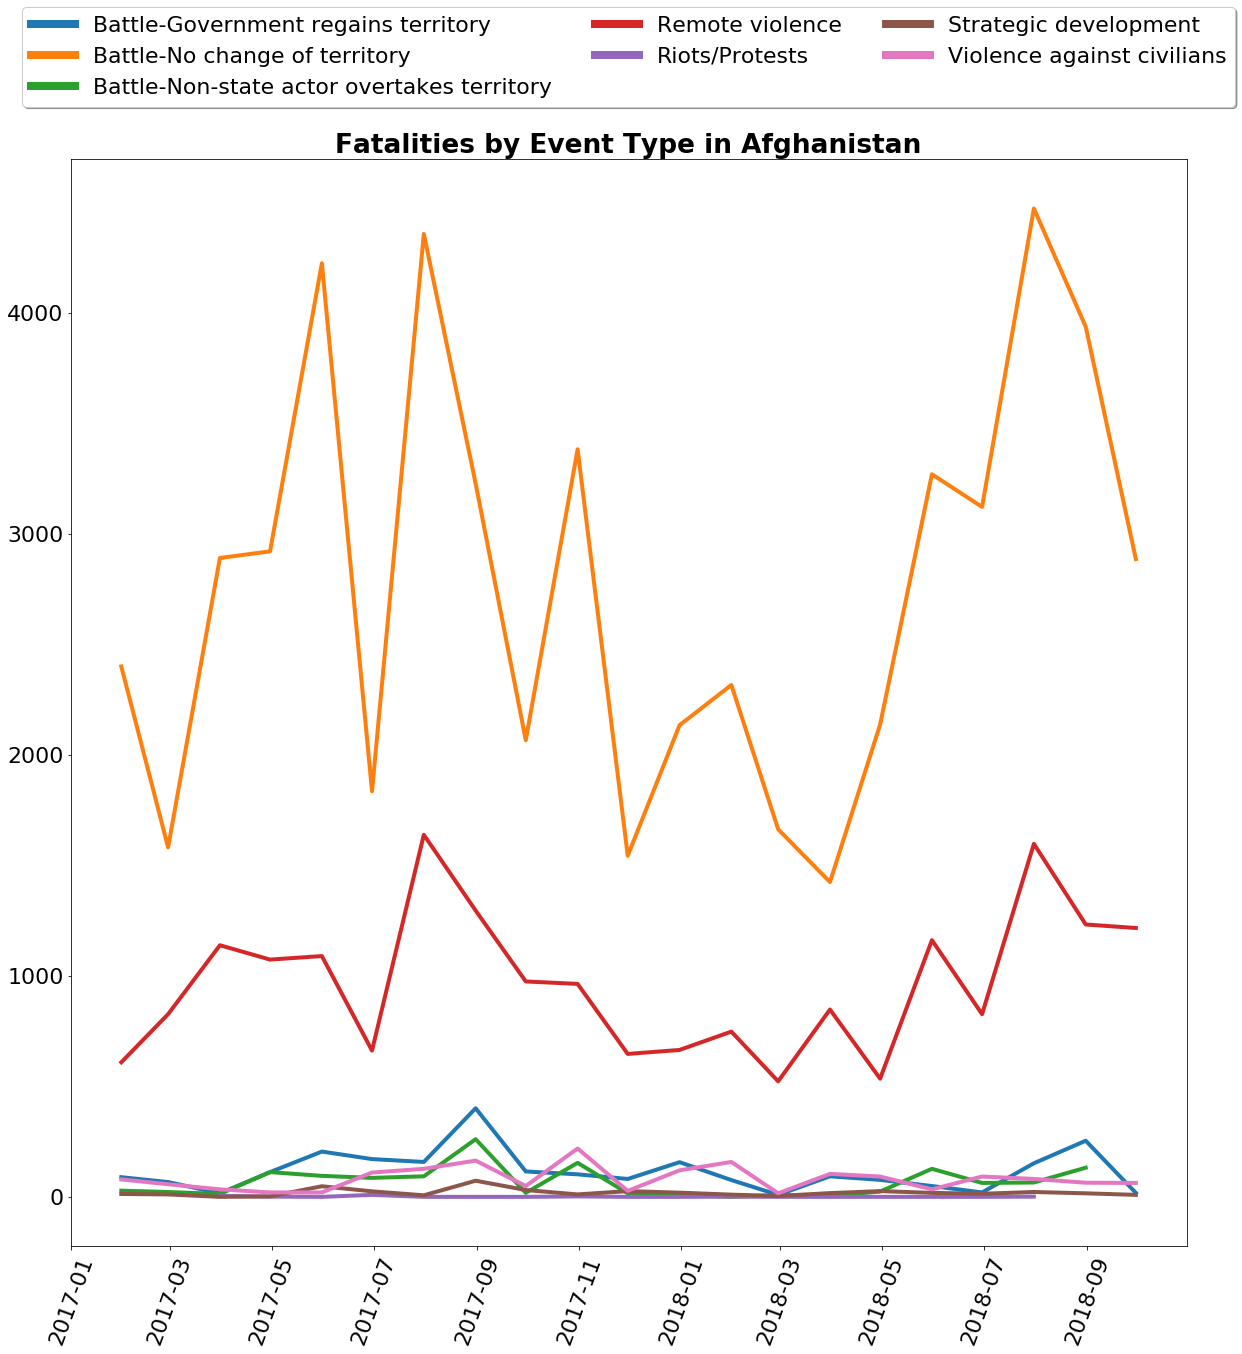

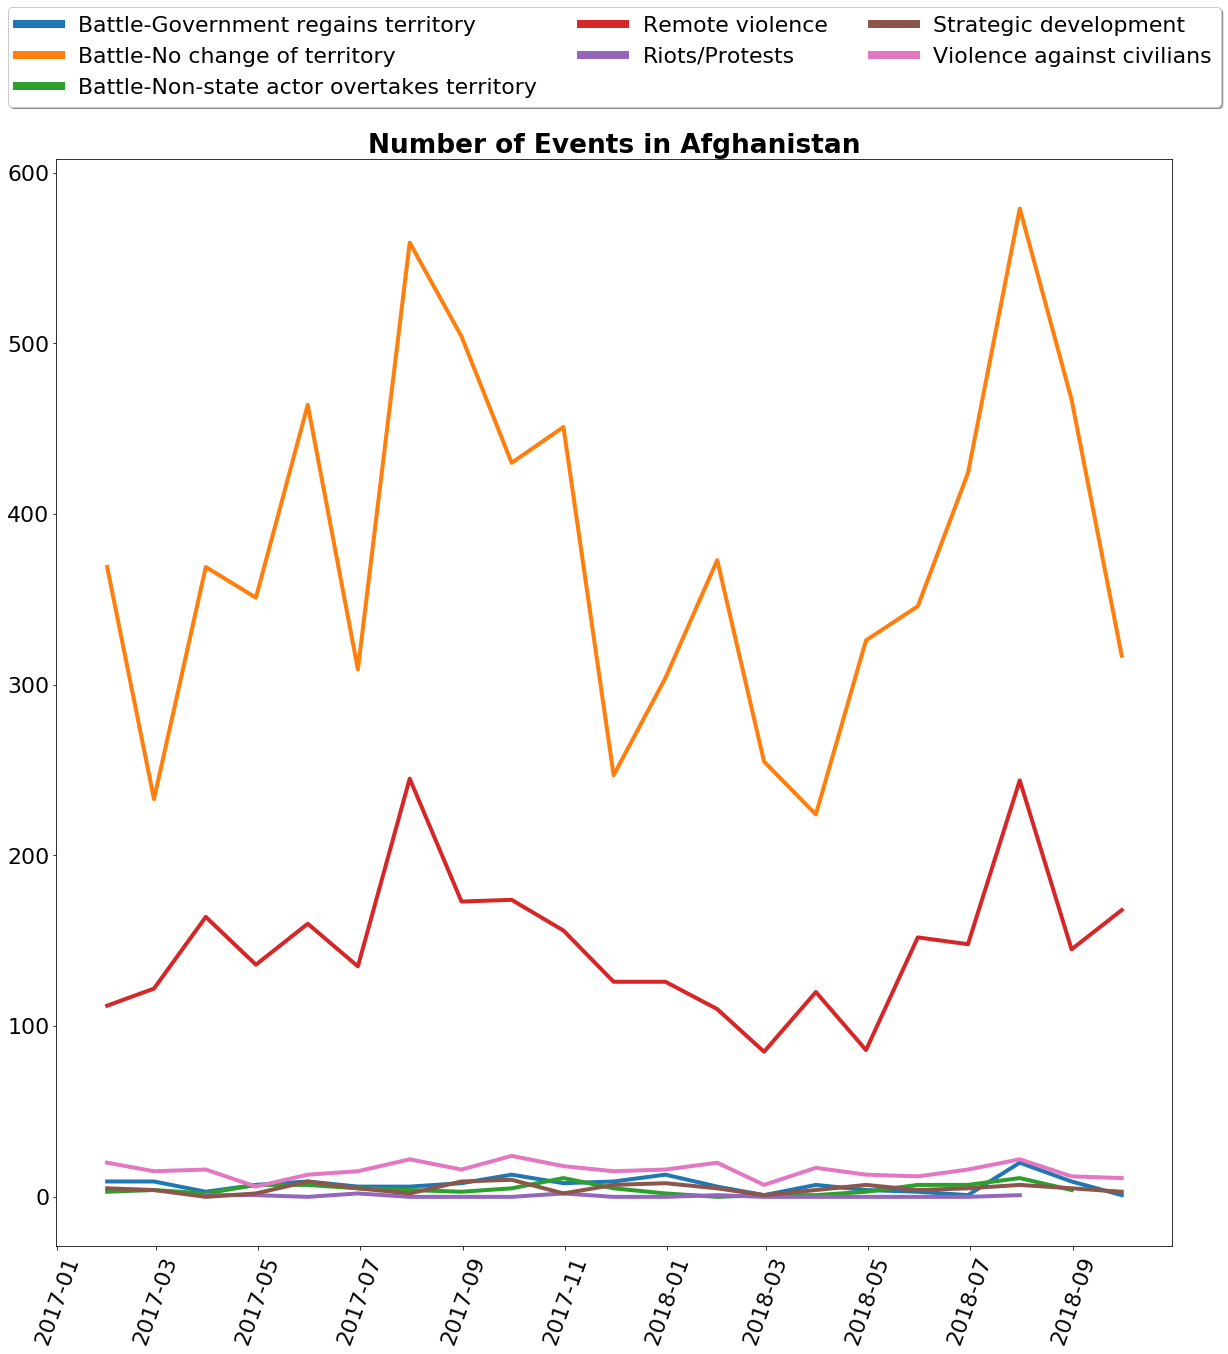

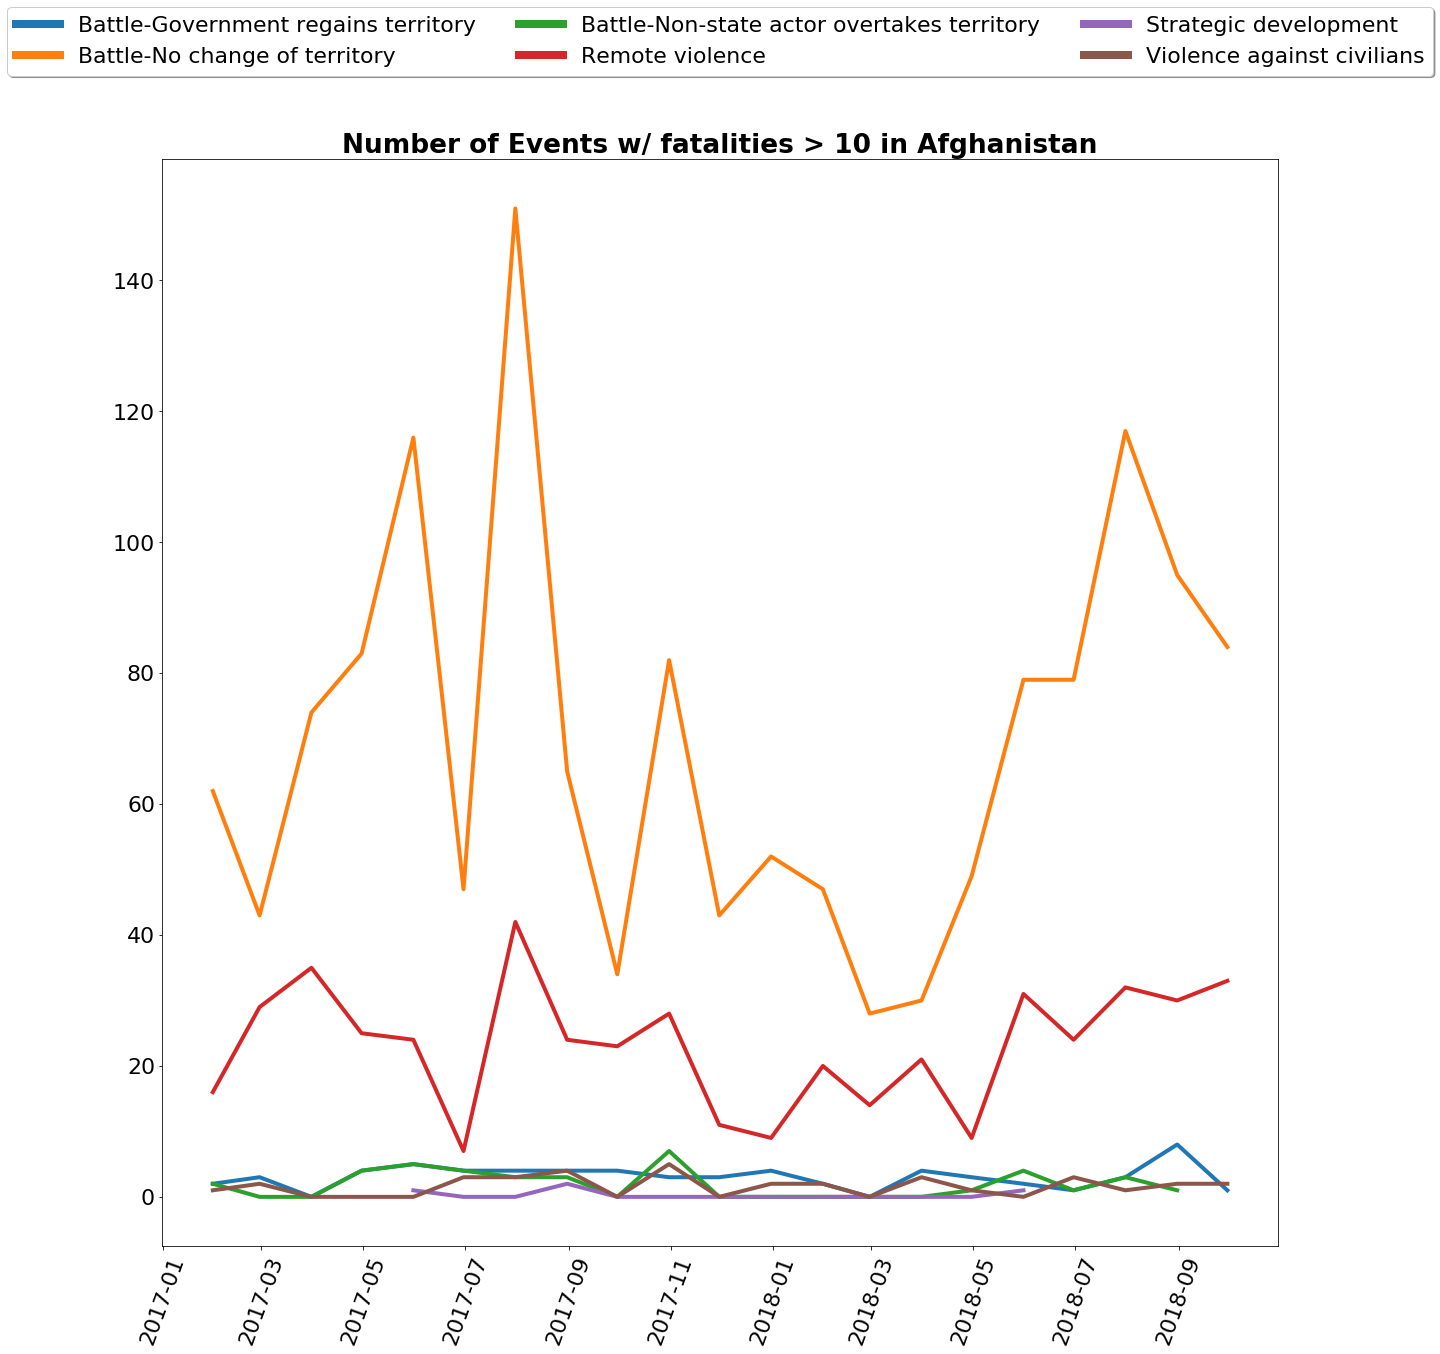

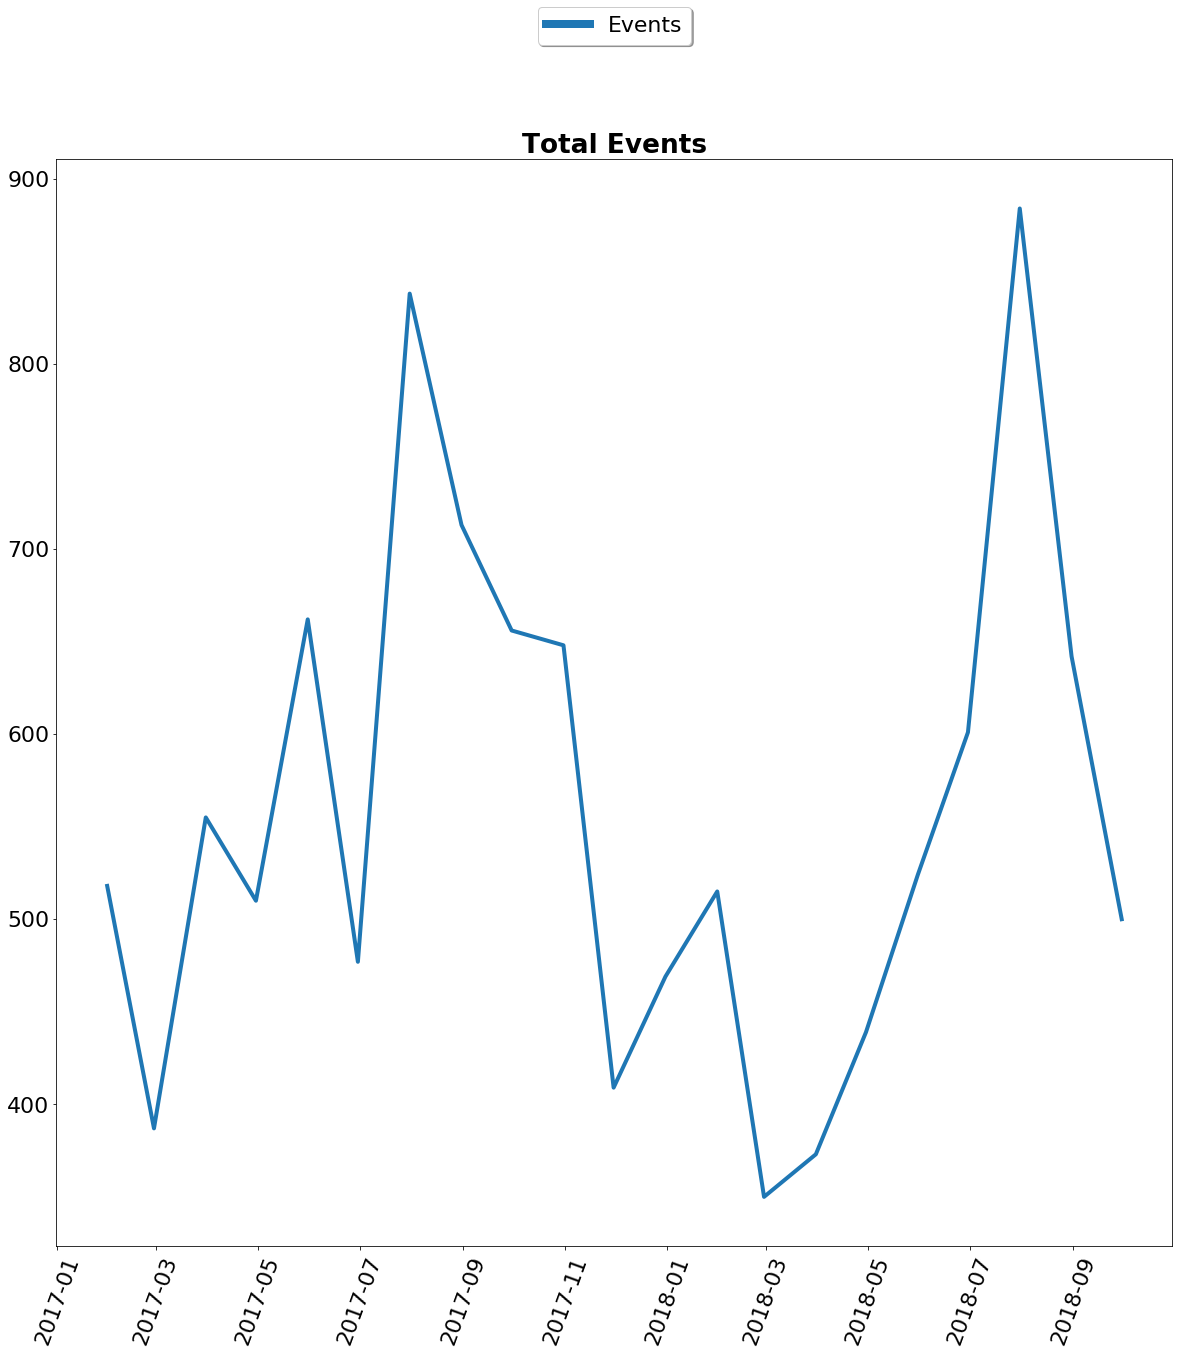

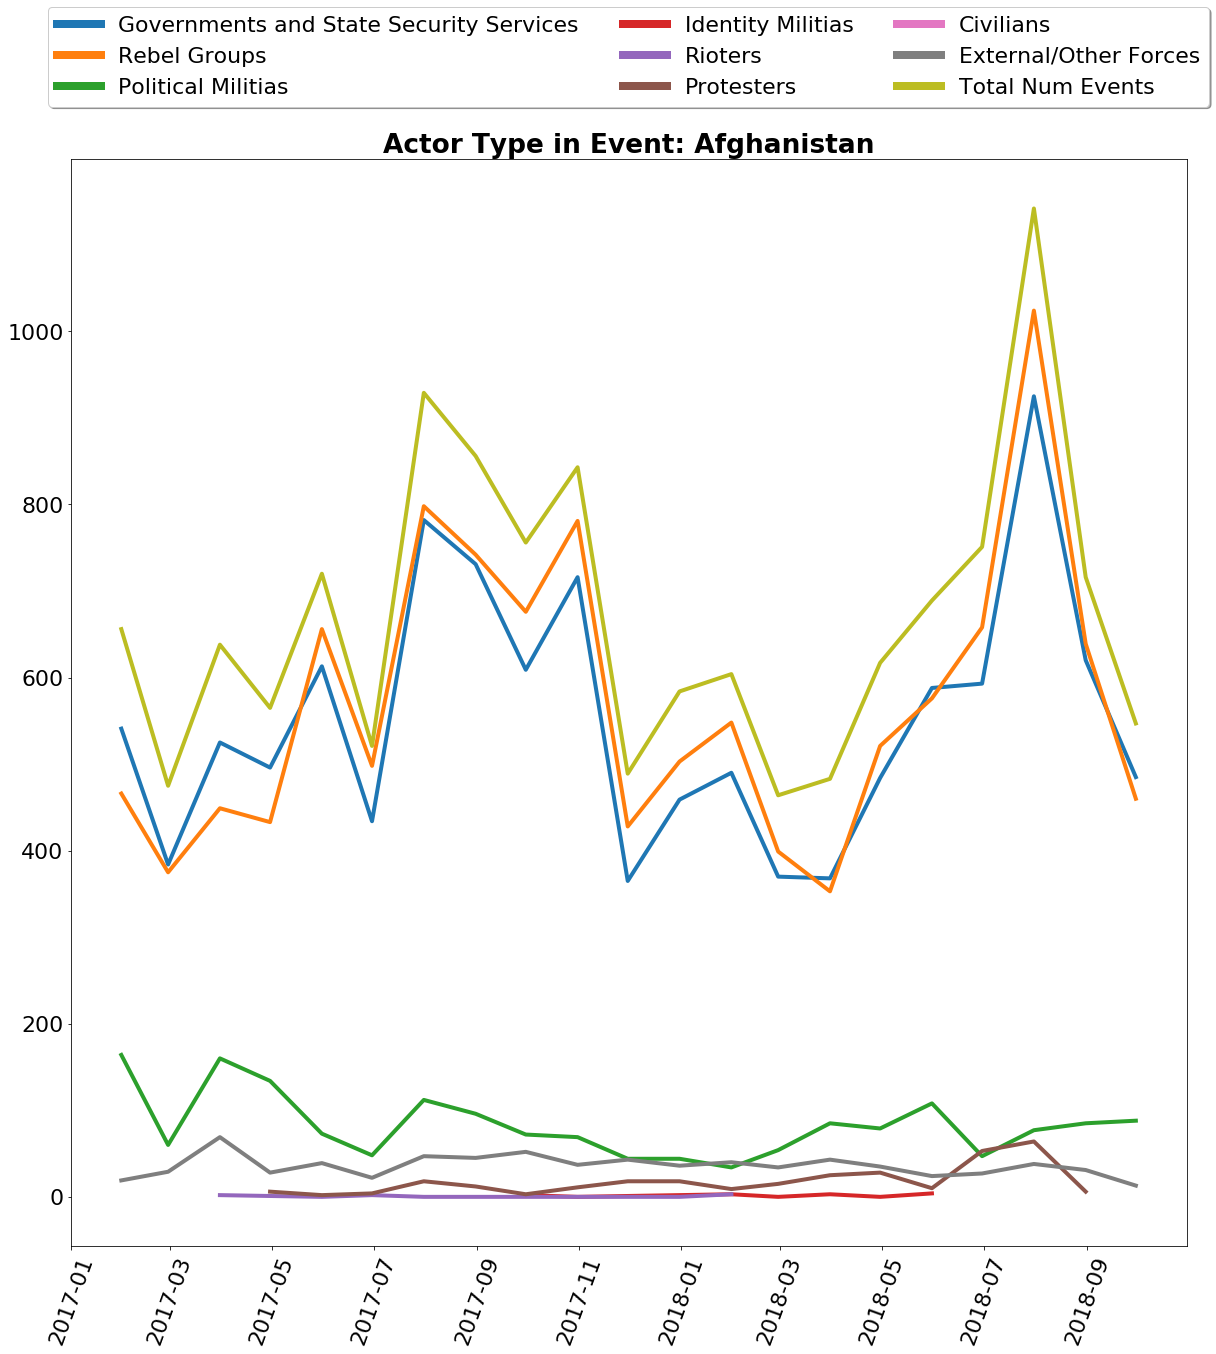

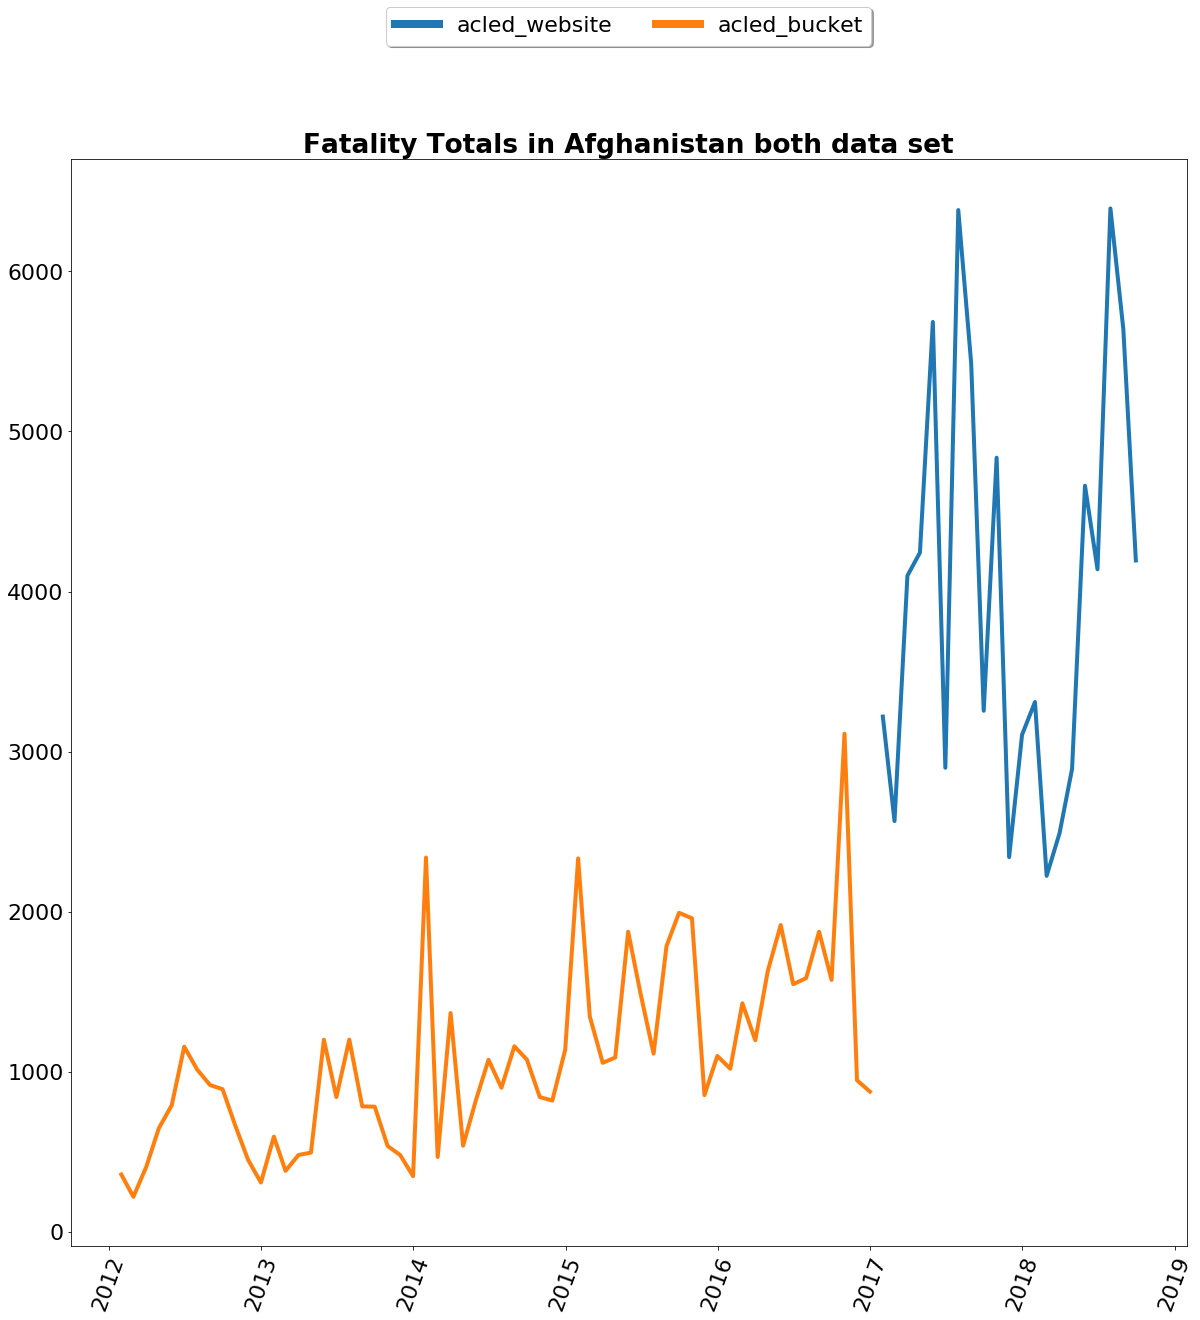

In [8]:
plot_fatalities_by_events(frame, 'Afghanistan')
title_str = 'Number of Events in Afghanistan'
event_counts(frame, title_str, 'event_type')
title_str = 'Number of Events w/ fatalities > 10 in Afghanistan'
event_counts(frame, title_str, 'event_type', 10)
title_str = 'Total Events'
event_counts(frame, title_str)
actor_type(frame, 'Afghanistan')
website_vs_bucket_fatalities(frame, b_frame, 'Afghanistan')

NdviCrop.2013_11  NdviCrop.2014_09  NdviCrop.2015_09  NdviCrop.2016_04  \
count         34.000000         34.000000         34.000000         34.000000   
mean           0.209437          0.238871          0.227756          0.152928   
std            0.073371          0.055444          0.057268          0.050298   
min            0.094910          0.151097          0.125922          0.050195   
25%            0.154225          0.199991          0.189272          0.128285   
50%            0.186121          0.241998          0.220373          0.141943   
75%            0.258746          0.266139          0.259608          0.168178   
max            0.414588          0.359875          0.354680          0.300108   

       NdviCrop.2017_08  
count         34.000000  
mean           0.249722  
std            0.050156  
min            0.156925  
25%            0.211737  
50%            0.245621  
75%            0.278089  
max            0.352405

number of Nan in NdviCrop


NdviCrop.2013_11    0
NdviCrop.2014_09    0
NdviCrop.2015_09    0
NdviCrop.2016_04    0
NdviCrop.2017_08    0
dtype: int64

Correlation between IPC1_pct and NdviCrop by month
Correlation between IPC1_pct and NdviCrop all months: 
0.05207969965498015


Pearson's
.2013_11     0.037803
.2014_09    -0.188701
.2015_09     0.115192
.2016_04     0.101798
.2017_08     0.278315
All Months   0.052080

.2017_08


NdviCrop.2013_11  NdviCrop.2014_09  NdviCrop.2015_09  NdviCrop.2016_04  \
count         34.000000         34.000000         34.000000         34.000000   
mean           0.209437          0.238871          0.227756          0.152928   
std            0.073371          0.055444          0.057268          0.050298   
min            0.094910          0.151097          0.125922          0.050195   
25%            0.154225          0.199991          0.189272          0.128285   
50%            0.186121          0.241998          0.220373          0.141943   
75%            0.258746          0.266139          0.259608          0.168178   
max            0.414588          0.359875          0.354680          0.300108   

       NdviCrop.2017_08  
count         34.000000  
mean           0.249722  
std            0.050156  
min            0.156925  
25%            0.211737  
50%            0.245621  
75%            0.278089  
max            0.352405

number of Nan in NdviCrop


NdviCrop.2013_11    0
NdviCrop.2014_09    0
NdviCrop.2015_09    0
NdviCrop.2016_04    0
NdviCrop.2017_08    0
dtype: int64

Correlation between IPC2_pct and NdviCrop by month
Correlation between IPC2_pct and NdviCrop all months: 
0.13863167292228606


Pearson's
.2013_11    -0.058897
.2014_09     0.189560
.2015_09    -0.083623
.2016_04     0.190974
.2017_08    -0.023736
All Months   0.138632

.2016_04


NdviCrop.2013_11  NdviCrop.2014_09  NdviCrop.2015_09  NdviCrop.2016_04  \
count         34.000000         34.000000         34.000000         34.000000   
mean           0.209437          0.238871          0.227756          0.152928   
std            0.073371          0.055444          0.057268          0.050298   
min            0.094910          0.151097          0.125922          0.050195   
25%            0.154225          0.199991          0.189272          0.128285   
50%            0.186121          0.241998          0.220373          0.141943   
75%            0.258746          0.266139          0.259608          0.168178   
max            0.414588          0.359875          0.354680          0.300108   

       NdviCrop.2017_08  
count         34.000000  
mean           0.249722  
std            0.050156  
min            0.156925  
25%            0.211737  
50%            0.245621  
75%            0.278089  
max            0.352405

number of Nan in NdviCrop


NdviCrop.2013_11    0
NdviCrop.2014_09    0
NdviCrop.2015_09    0
NdviCrop.2016_04    0
NdviCrop.2017_08    0
dtype: int64

Correlation between IPC3_pct and NdviCrop by month
Correlation between IPC3_pct and NdviCrop all months: 
-0.19377044503481444


Pearson's
.2013_11    -0.132853
.2014_09    -0.162394
.2015_09     0.325241
.2016_04    -0.102134
.2017_08    -0.247126
All Months  -0.193770

.2015_09


NdviCrop.2013_11  NdviCrop.2014_09  NdviCrop.2015_09  NdviCrop.2016_04  \
count         34.000000         34.000000         34.000000         34.000000   
mean           0.209437          0.238871          0.227756          0.152928   
std            0.073371          0.055444          0.057268          0.050298   
min            0.094910          0.151097          0.125922          0.050195   
25%            0.154225          0.199991          0.189272          0.128285   
50%            0.186121          0.241998          0.220373          0.141943   
75%            0.258746          0.266139          0.259608          0.168178   
max            0.414588          0.359875          0.354680          0.300108   

       NdviCrop.2017_08  
count         34.000000  
mean           0.249722  
std            0.050156  
min            0.156925  
25%            0.211737  
50%            0.245621  
75%            0.278089  
max            0.352405

number of Nan in NdviCrop


NdviCrop.2013_11    0
NdviCrop.2014_09    0
NdviCrop.2015_09    0
NdviCrop.2016_04    0
NdviCrop.2017_08    0
dtype: int64

Correlation between IPC4_pct and NdviCrop by month
Correlation between IPC4_pct and NdviCrop all months: 
-0.05538462841525354


Pearson's
.2013_11     0.017777
.2014_09     0.224736
.2015_09    -0.017205
.2016_04    -0.372787
.2017_08    -0.238453
All Months  -0.055385

.2016_04


NdviCrop.2013_11  NdviCrop.2014_09  NdviCrop.2015_09  NdviCrop.2016_04  \
count         34.000000         34.000000         34.000000         34.000000   
mean           0.209437          0.238871          0.227756          0.152928   
std            0.073371          0.055444          0.057268          0.050298   
min            0.094910          0.151097          0.125922          0.050195   
25%            0.154225          0.199991          0.189272          0.128285   
50%            0.186121          0.241998          0.220373          0.141943   
75%            0.258746          0.266139          0.259608          0.168178   
max            0.414588          0.359875          0.354680          0.300108   

       NdviCrop.2017_08  
count         34.000000  
mean           0.249722  
std            0.050156  
min            0.156925  
25%            0.211737  
50%            0.245621  
75%            0.278089  
max            0.352405

number of Nan in NdviCrop


NdviCrop.2013_11    0
NdviCrop.2014_09    0
NdviCrop.2015_09    0
NdviCrop.2016_04    0
NdviCrop.2017_08    0
dtype: int64

Correlation between IPC5_pct and NdviCrop by month
Correlation between IPC5_pct and NdviCrop all months: 
nan


Pearson's
.2013_11          NaN
.2014_09          NaN
.2015_09          NaN
.2016_04          NaN
.2017_08          NaN
All Months        NaN

nan


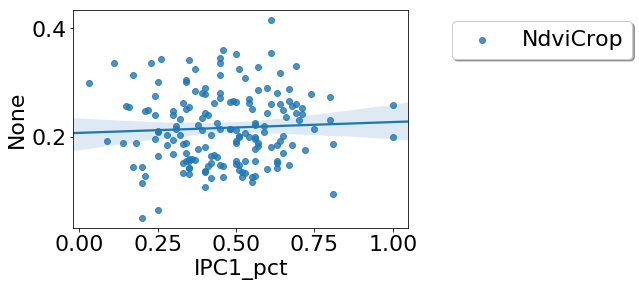

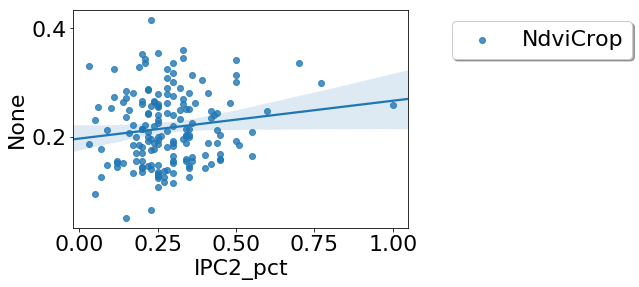

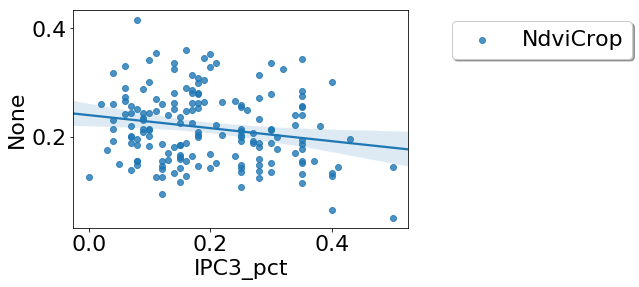

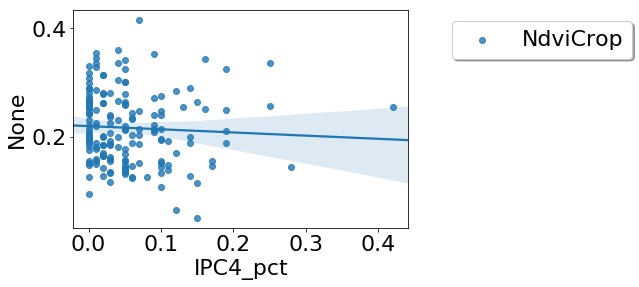

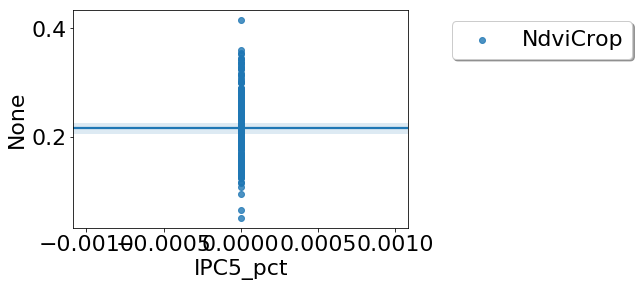

In [9]:
IPC_pct_corr_plots(b_frame)

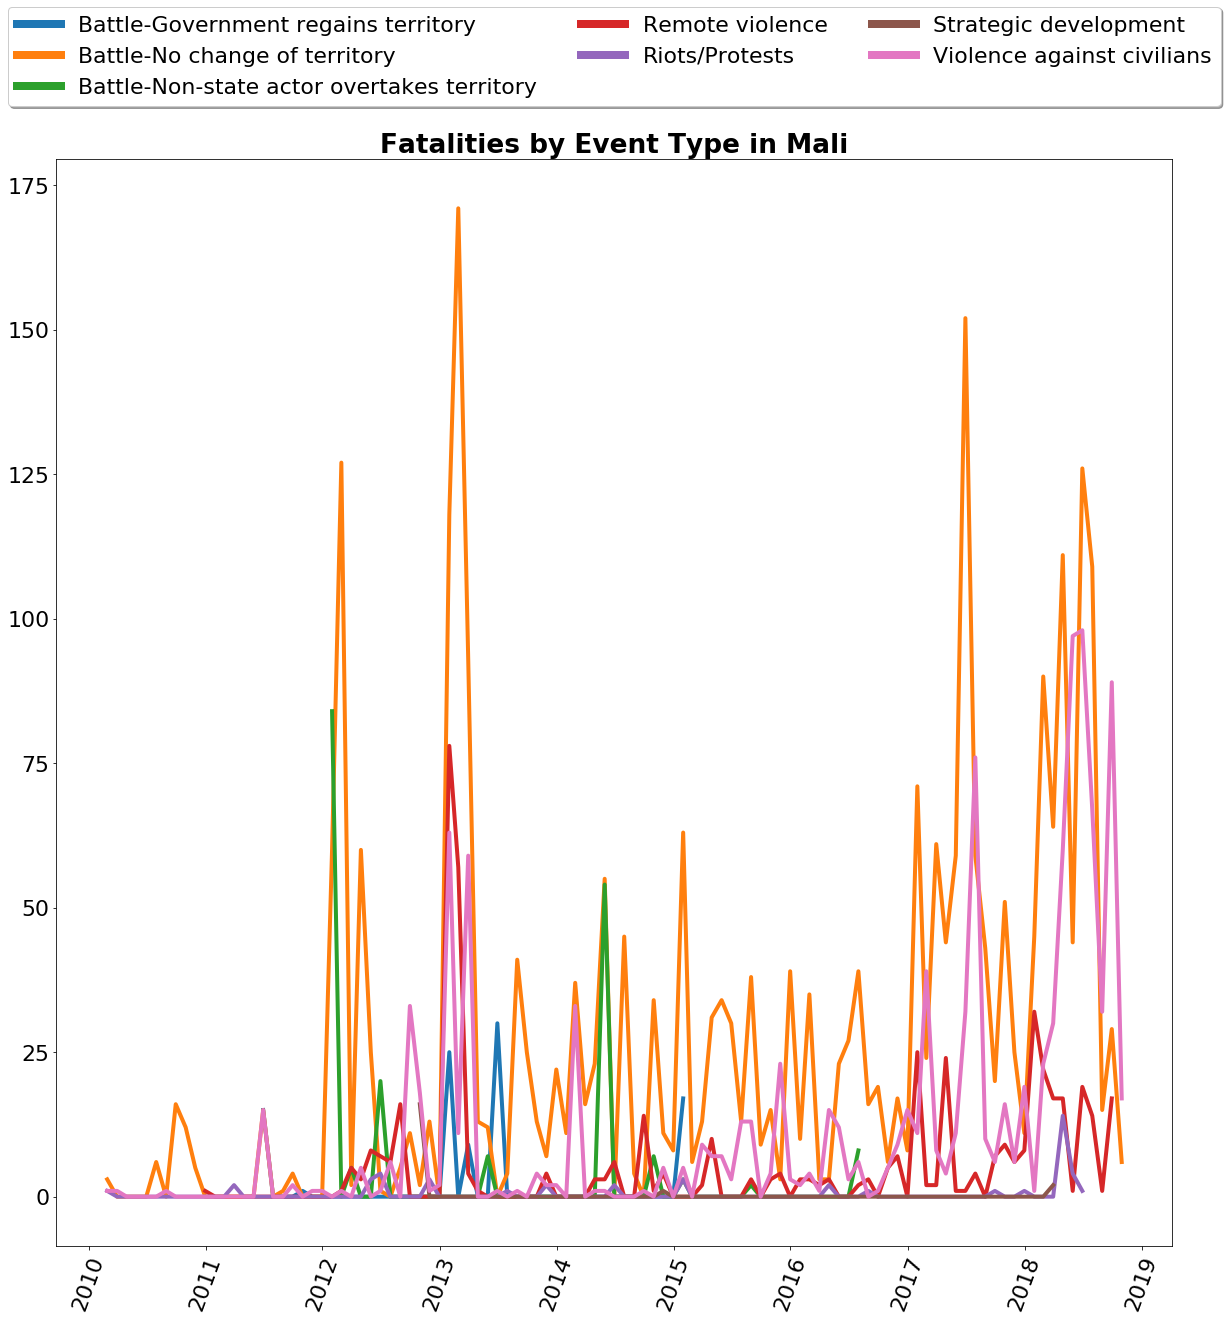

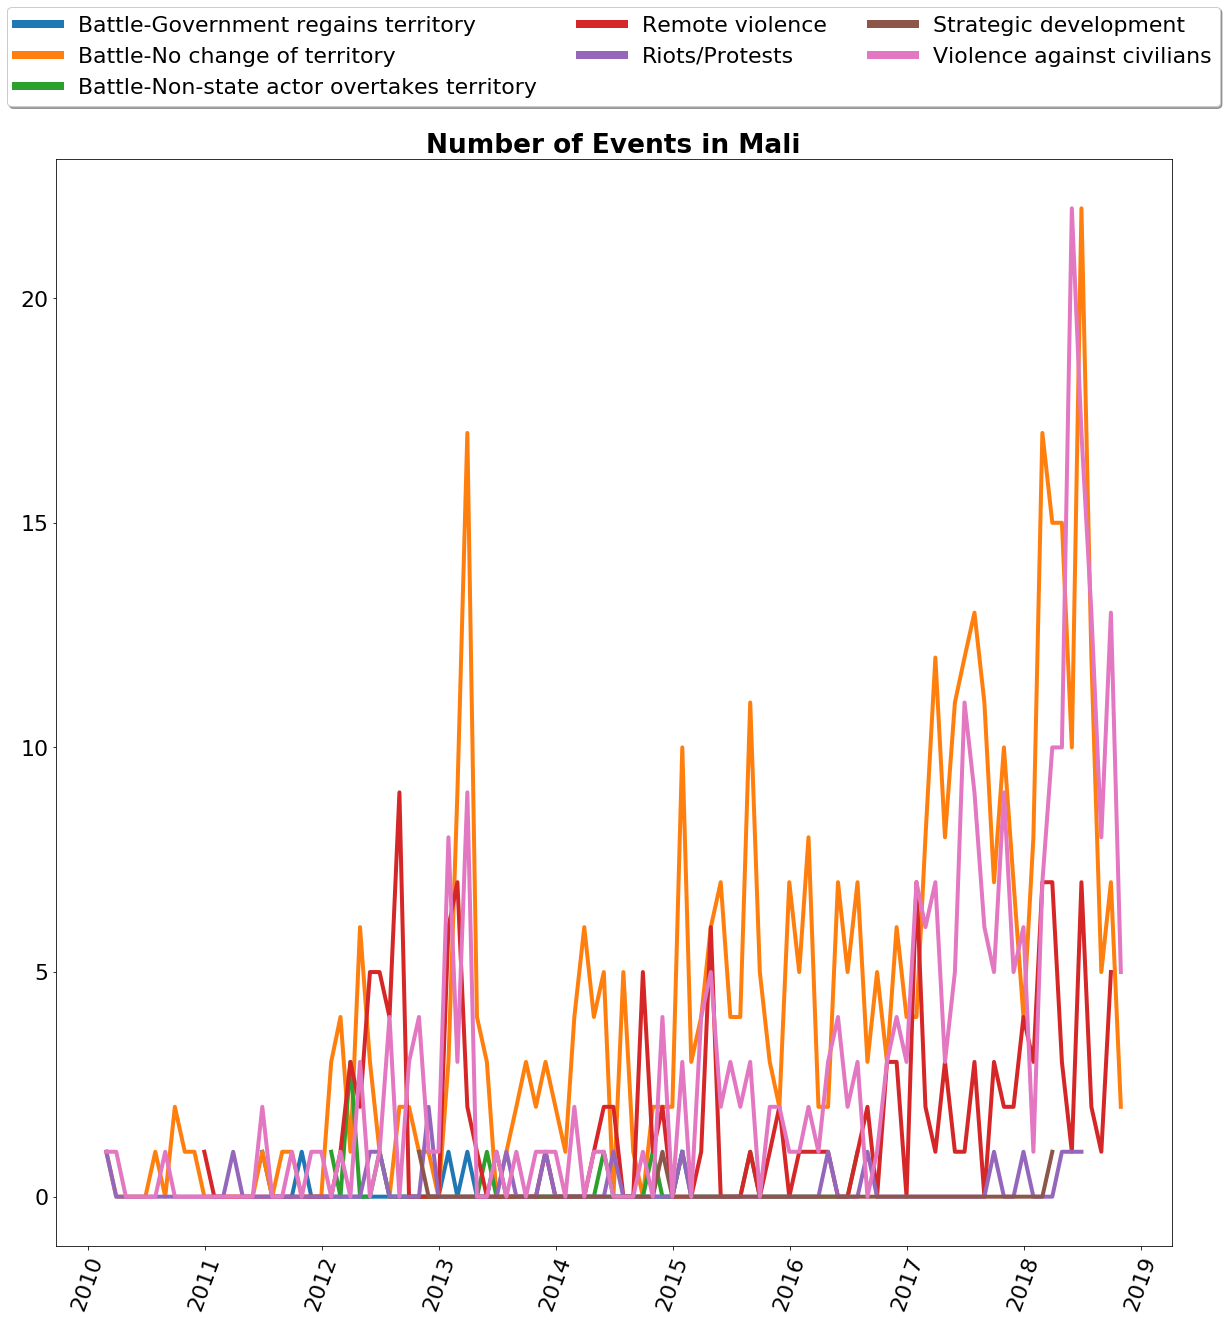

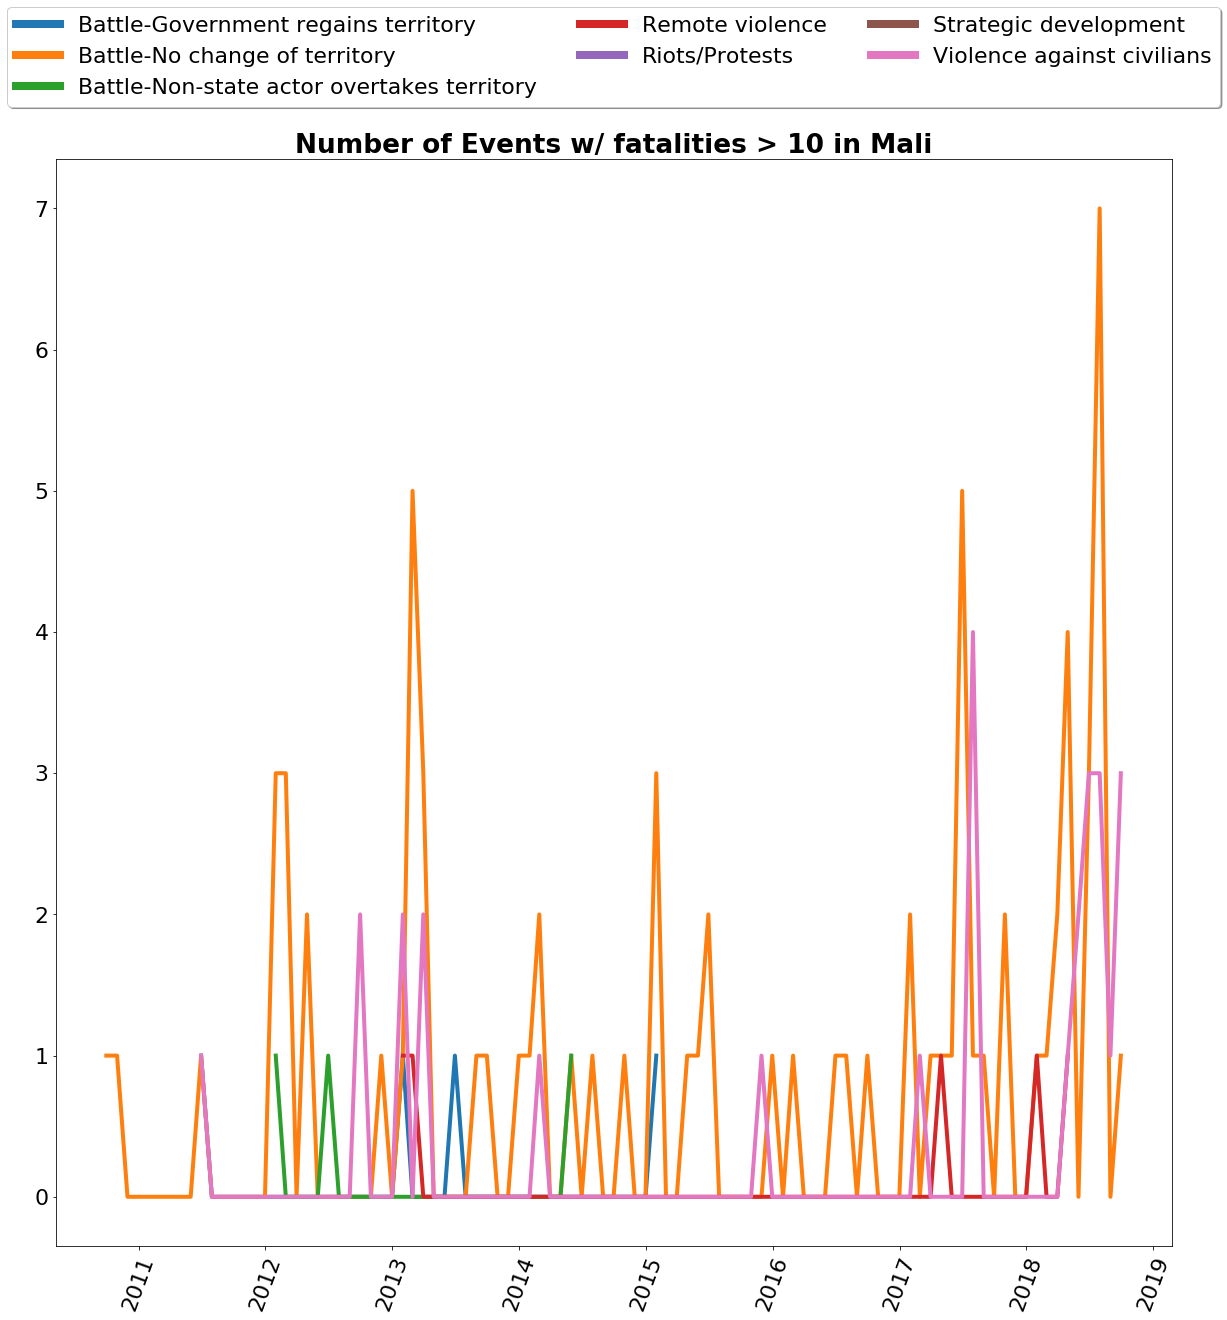

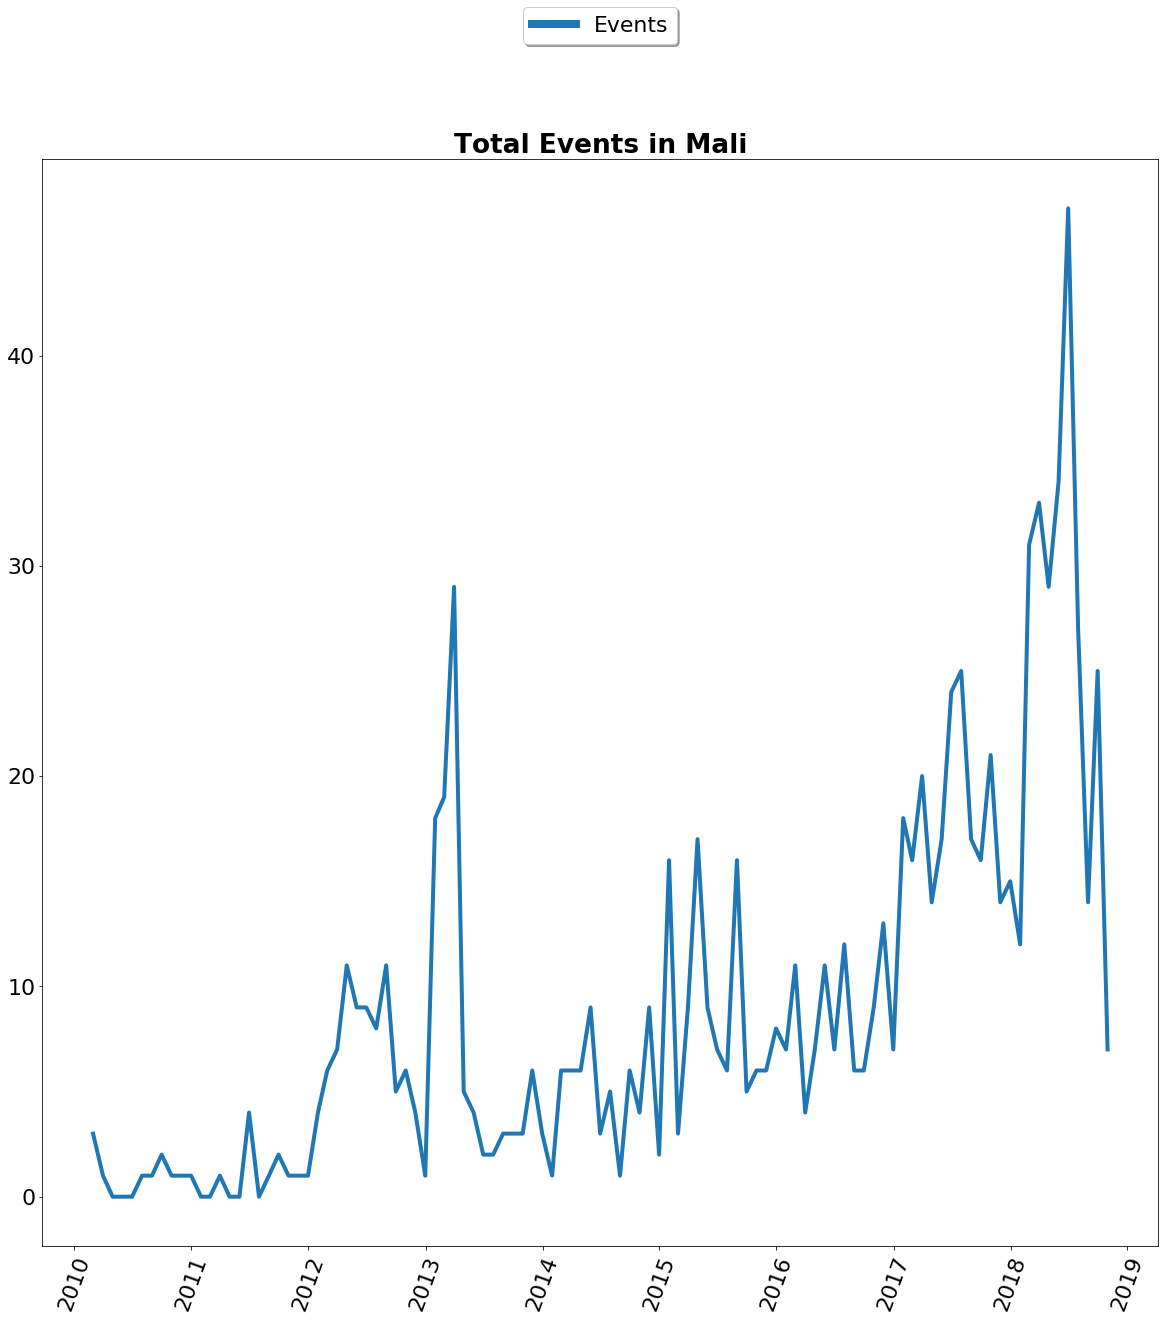

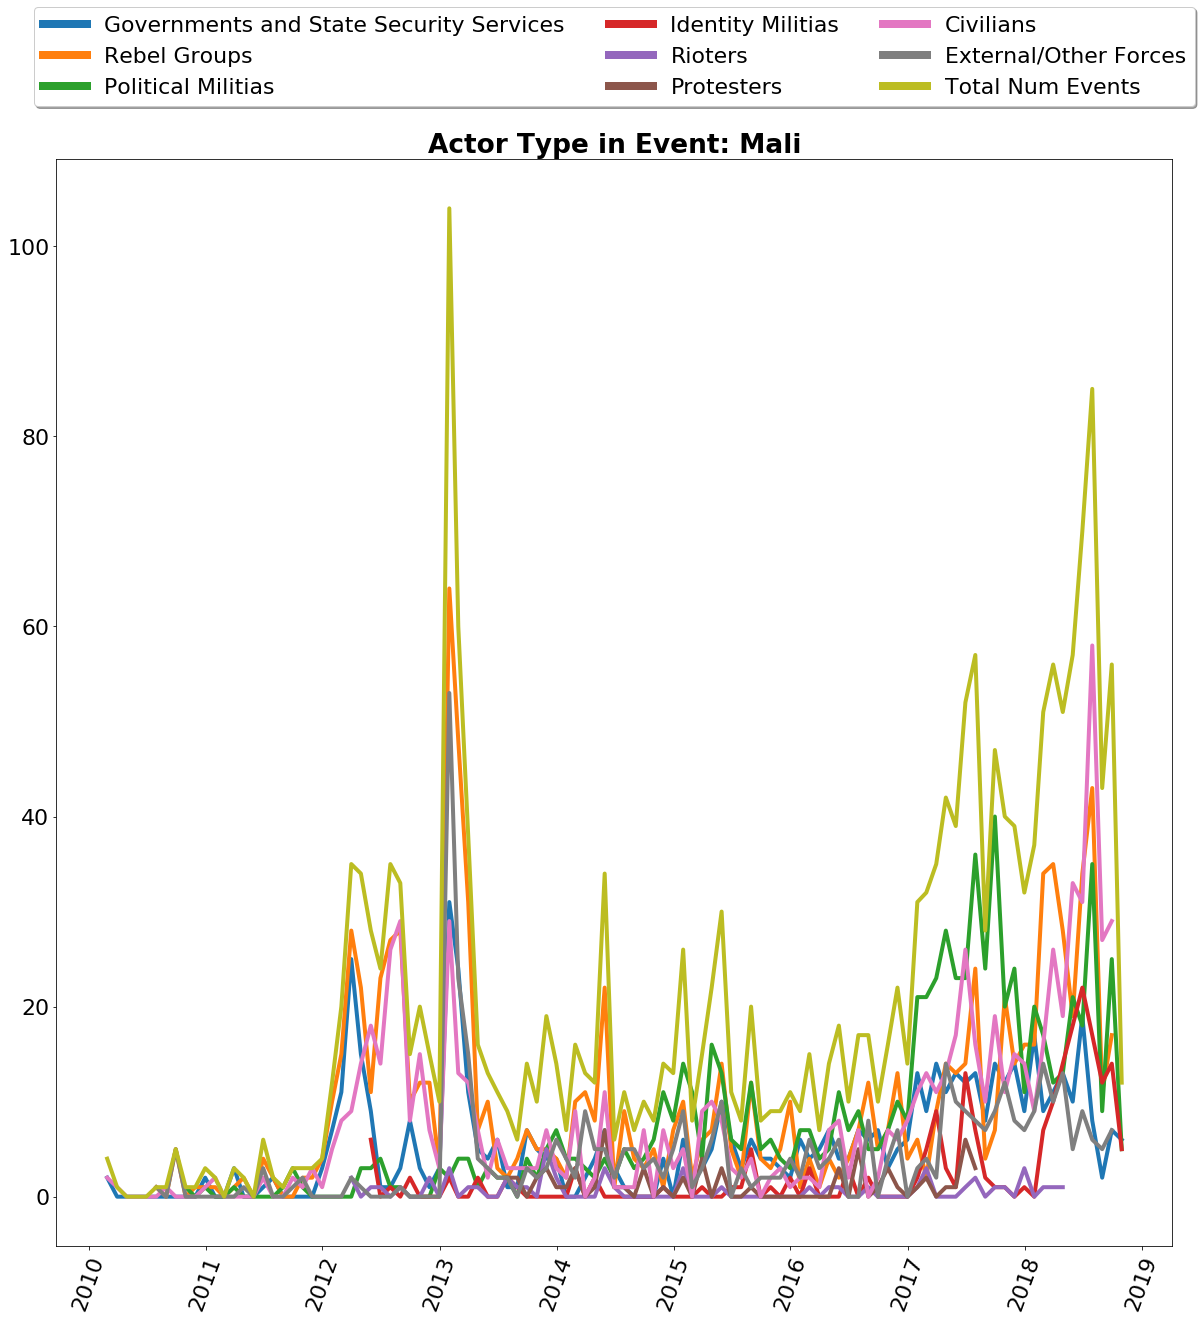

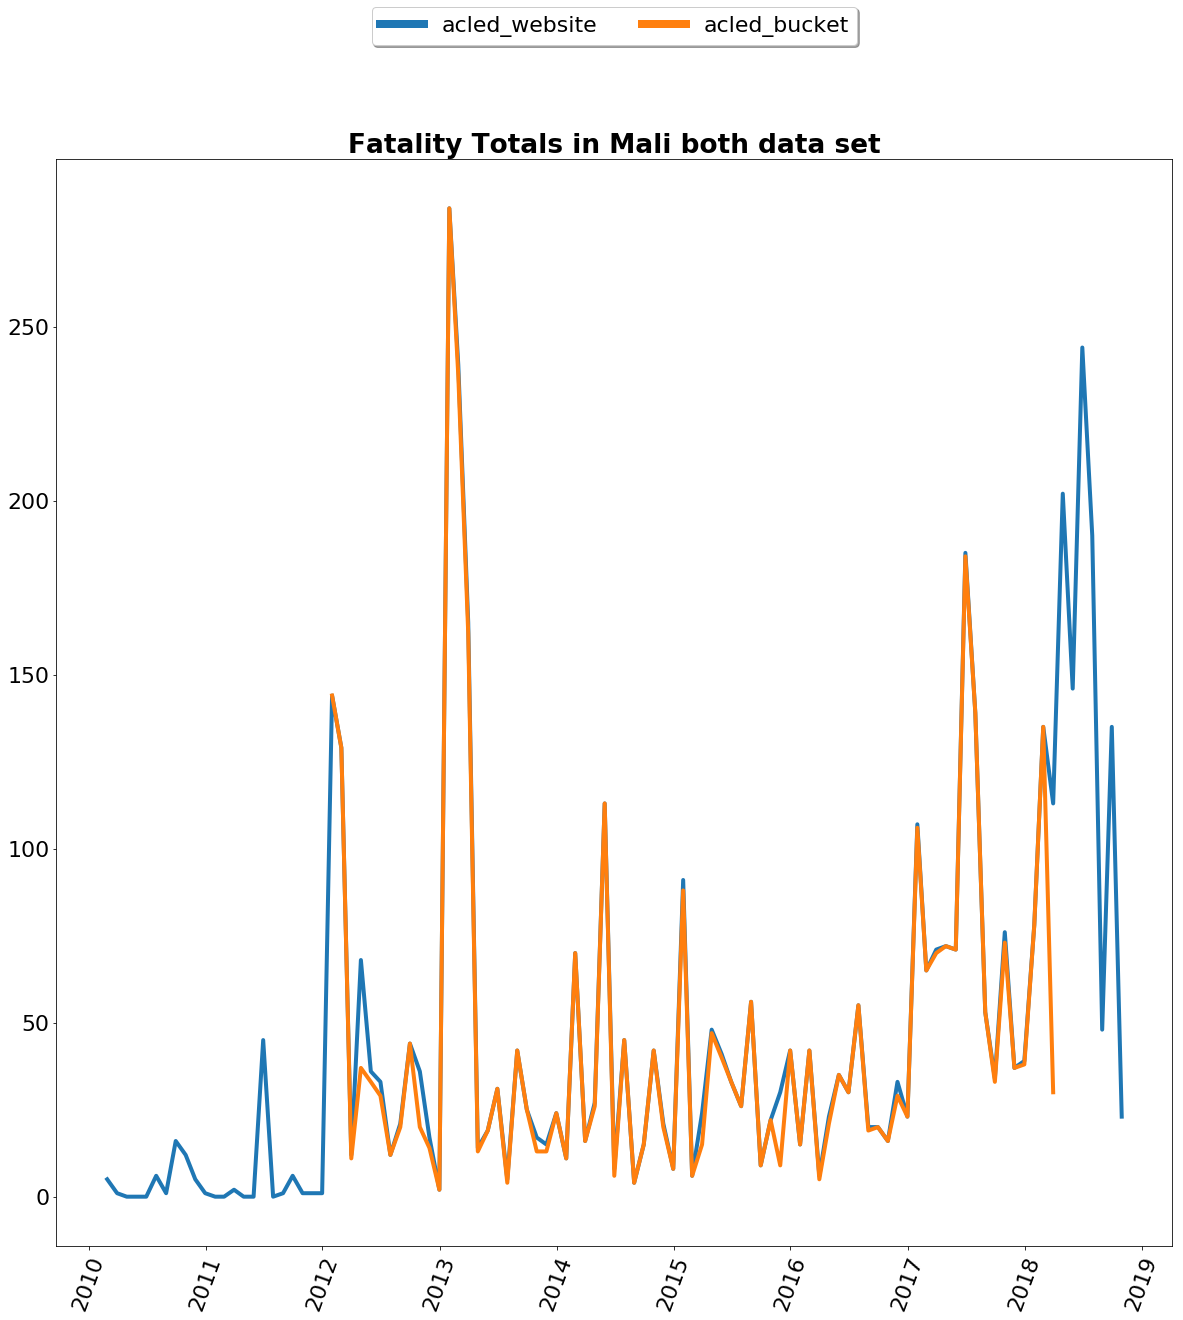

In [10]:
plot_fatalities_by_events(mali_aframe, 'Mali')
title_str = 'Number of Events in Mali'
event_counts(mali_aframe, title_str, 'event_type')
title_str = 'Number of Events w/ fatalities > 10 in Mali'
event_counts(mali_aframe, title_str, 'event_type', 10)
title_str = 'Total Events in Mali'
event_counts(mali_aframe, title_str)
actor_type(mali_aframe, 'Mali')
website_vs_bucket_fatalities(mali_aframe, mali_bframe, 'Mali')

NdviCrop.2013_12  NdviCrop.2014_03  NdviCrop.2015_03  NdviCrop.2015_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.313844          0.231246          0.224957          0.506435   
std            0.092172          0.055693          0.054734          0.143282   
min            0.144833          0.133167          0.129433          0.168800   
25%            0.251716          0.199572          0.192480          0.425686   
50%            0.311817          0.221874          0.213169          0.511188   
75%            0.366666          0.249233          0.244350          0.623200   
max            0.577000          0.369955          0.363715          0.773829   

       NdviCrop.2016_03  NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.233248          0.490713          0.234805          0.451639   
std            0.054690          0.142354          0.055544          0.133147   
min            0.132400          0.148000          0.126767          0.152967   
25%            0.199977          0.406053          0.197466          0.355671   
50%            0.217161          0.488576          0.224209          0.446758   
75%            0.253412          0.614777          0.260511          0.551823   
max            0.366481          0.763095          0.355956          0.730229   

       NdviCrop.2018_03  
count         39.000000  
mean           0.231528  
std            0.056300  
min            0.126250  
25%            0.193490  
50%            0.220296  
75%            0.252022  
max            0.370374

number of Nan in NdviCrop


NdviCrop.2013_12    10
NdviCrop.2014_03    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC1_pct and NdviCrop by month
Correlation between IPC1_pct and NdviCrop all months: 
0.28546430109187204


Pearson's
.2013_12     0.650359
.2014_03     0.587764
.2015_03     0.381582
.2015_10     0.448054
.2016_03     0.136494
.2016_10     0.093386
.2017_03     0.246164
.2017_10     0.397409
.2018_03     0.340637
All Months   0.285464

.2013_12


NdviCrop.2013_12  NdviCrop.2014_03  NdviCrop.2015_03  NdviCrop.2015_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.313844          0.231246          0.224957          0.506435   
std            0.092172          0.055693          0.054734          0.143282   
min            0.144833          0.133167          0.129433          0.168800   
25%            0.251716          0.199572          0.192480          0.425686   
50%            0.311817          0.221874          0.213169          0.511188   
75%            0.366666          0.249233          0.244350          0.623200   
max            0.577000          0.369955          0.363715          0.773829   

       NdviCrop.2016_03  NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.233248          0.490713          0.234805          0.451639   
std            0.054690          0.142354          0.055544          0.133147   
min            0.132400          0.148000          0.126767          0.152967   
25%            0.199977          0.406053          0.197466          0.355671   
50%            0.217161          0.488576          0.224209          0.446758   
75%            0.253412          0.614777          0.260511          0.551823   
max            0.366481          0.763095          0.355956          0.730229   

       NdviCrop.2018_03  
count         39.000000  
mean           0.231528  
std            0.056300  
min            0.126250  
25%            0.193490  
50%            0.220296  
75%            0.252022  
max            0.370374

number of Nan in NdviCrop


NdviCrop.2013_12    10
NdviCrop.2014_03    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC2_pct and NdviCrop by month
Correlation between IPC2_pct and NdviCrop all months: 
-0.22191701099838618


Pearson's
.2013_12    -0.660055
.2014_03    -0.591274
.2015_03    -0.355019
.2015_10    -0.353494
.2016_03     0.199583
.2016_10     0.113632
.2017_03    -0.159270
.2017_10    -0.256323
.2018_03    -0.267262
All Months  -0.221917

.2013_12


NdviCrop.2013_12  NdviCrop.2014_03  NdviCrop.2015_03  NdviCrop.2015_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.313844          0.231246          0.224957          0.506435   
std            0.092172          0.055693          0.054734          0.143282   
min            0.144833          0.133167          0.129433          0.168800   
25%            0.251716          0.199572          0.192480          0.425686   
50%            0.311817          0.221874          0.213169          0.511188   
75%            0.366666          0.249233          0.244350          0.623200   
max            0.577000          0.369955          0.363715          0.773829   

       NdviCrop.2016_03  NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.233248          0.490713          0.234805          0.451639   
std            0.054690          0.142354          0.055544          0.133147   
min            0.132400          0.148000          0.126767          0.152967   
25%            0.199977          0.406053          0.197466          0.355671   
50%            0.217161          0.488576          0.224209          0.446758   
75%            0.253412          0.614777          0.260511          0.551823   
max            0.366481          0.763095          0.355956          0.730229   

       NdviCrop.2018_03  
count         39.000000  
mean           0.231528  
std            0.056300  
min            0.126250  
25%            0.193490  
50%            0.220296  
75%            0.252022  
max            0.370374

number of Nan in NdviCrop


NdviCrop.2013_12    10
NdviCrop.2014_03    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC3_pct and NdviCrop by month
Correlation between IPC3_pct and NdviCrop all months: 
-0.3281734825228515


Pearson's
.2013_12    -0.550948
.2014_03    -0.517382
.2015_03    -0.395071
.2015_10    -0.602427
.2016_03    -0.555305
.2016_10    -0.621275
.2017_03    -0.423621
.2017_10    -0.410861
.2018_03    -0.388610
All Months  -0.328173

.2016_10


NdviCrop.2013_12  NdviCrop.2014_03  NdviCrop.2015_03  NdviCrop.2015_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.313844          0.231246          0.224957          0.506435   
std            0.092172          0.055693          0.054734          0.143282   
min            0.144833          0.133167          0.129433          0.168800   
25%            0.251716          0.199572          0.192480          0.425686   
50%            0.311817          0.221874          0.213169          0.511188   
75%            0.366666          0.249233          0.244350          0.623200   
max            0.577000          0.369955          0.363715          0.773829   

       NdviCrop.2016_03  NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.233248          0.490713          0.234805          0.451639   
std            0.054690          0.142354          0.055544          0.133147   
min            0.132400          0.148000          0.126767          0.152967   
25%            0.199977          0.406053          0.197466          0.355671   
50%            0.217161          0.488576          0.224209          0.446758   
75%            0.253412          0.614777          0.260511          0.551823   
max            0.366481          0.763095          0.355956          0.730229   

       NdviCrop.2018_03  
count         39.000000  
mean           0.231528  
std            0.056300  
min            0.126250  
25%            0.193490  
50%            0.220296  
75%            0.252022  
max            0.370374

number of Nan in NdviCrop


NdviCrop.2013_12    10
NdviCrop.2014_03    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC4_pct and NdviCrop by month
Correlation between IPC4_pct and NdviCrop all months: 
-0.17306115389852583


Pearson's
.2013_12    -0.466584
.2014_03    -0.423012
.2015_03    -0.191109
.2015_10    -0.511432
.2016_03          NaN
.2016_10          NaN
.2017_03          NaN
.2017_10          NaN
.2018_03    -0.087726
All Months  -0.173061

.2015_10


NdviCrop.2013_12  NdviCrop.2014_03  NdviCrop.2015_03  NdviCrop.2015_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.313844          0.231246          0.224957          0.506435   
std            0.092172          0.055693          0.054734          0.143282   
min            0.144833          0.133167          0.129433          0.168800   
25%            0.251716          0.199572          0.192480          0.425686   
50%            0.311817          0.221874          0.213169          0.511188   
75%            0.366666          0.249233          0.244350          0.623200   
max            0.577000          0.369955          0.363715          0.773829   

       NdviCrop.2016_03  NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  \
count         39.000000         39.000000         39.000000         39.000000   
mean           0.233248          0.490713          0.234805          0.451639   
std            0.054690          0.142354          0.055544          0.133147   
min            0.132400          0.148000          0.126767          0.152967   
25%            0.199977          0.406053          0.197466          0.355671   
50%            0.217161          0.488576          0.224209          0.446758   
75%            0.253412          0.614777          0.260511          0.551823   
max            0.366481          0.763095          0.355956          0.730229   

       NdviCrop.2018_03  
count         39.000000  
mean           0.231528  
std            0.056300  
min            0.126250  
25%            0.193490  
50%            0.220296  
75%            0.252022  
max            0.370374

number of Nan in NdviCrop


NdviCrop.2013_12    10
NdviCrop.2014_03    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC5_pct and NdviCrop by month
Correlation between IPC5_pct and NdviCrop all months: 
nan


Pearson's
.2013_12          NaN
.2014_03          NaN
.2015_03          NaN
.2015_10          NaN
.2016_03          NaN
.2016_10          NaN
.2017_03          NaN
.2017_10          NaN
.2018_03          NaN
All Months        NaN

nan


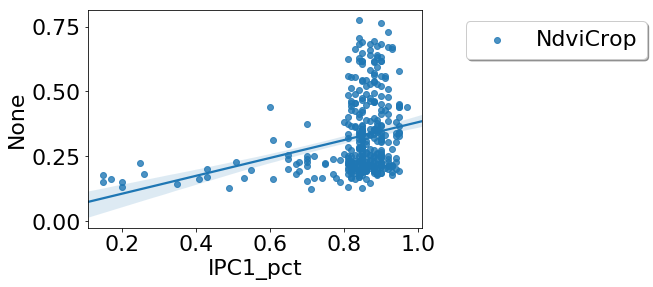

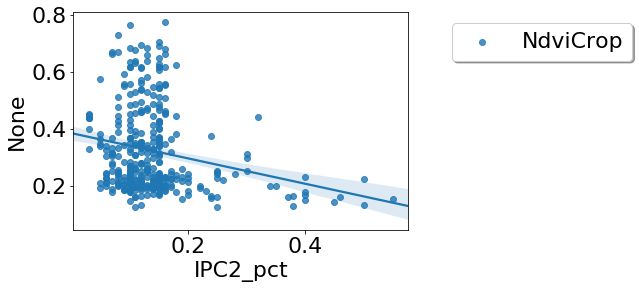

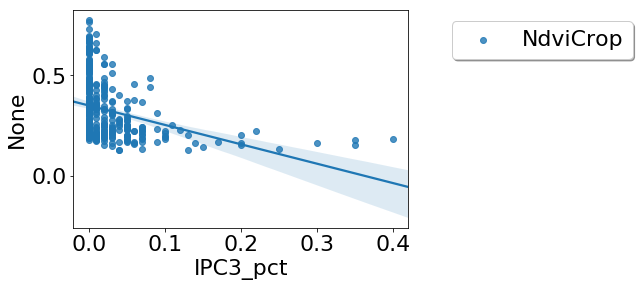

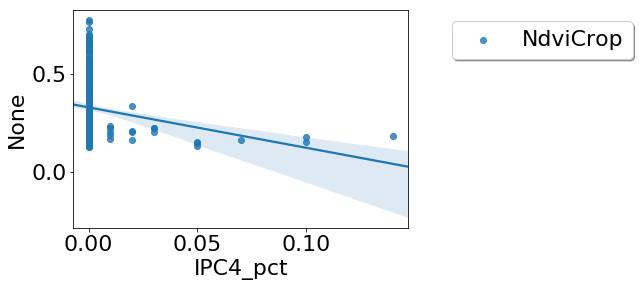

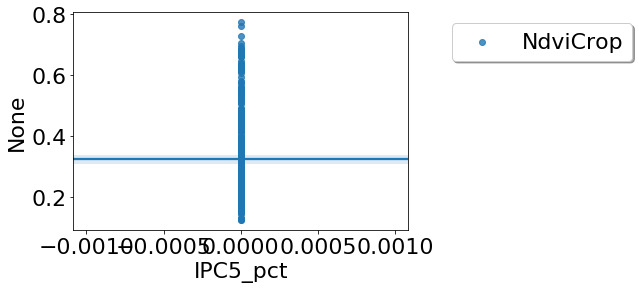

In [11]:
IPC_pct_corr_plots(mali_bframe)

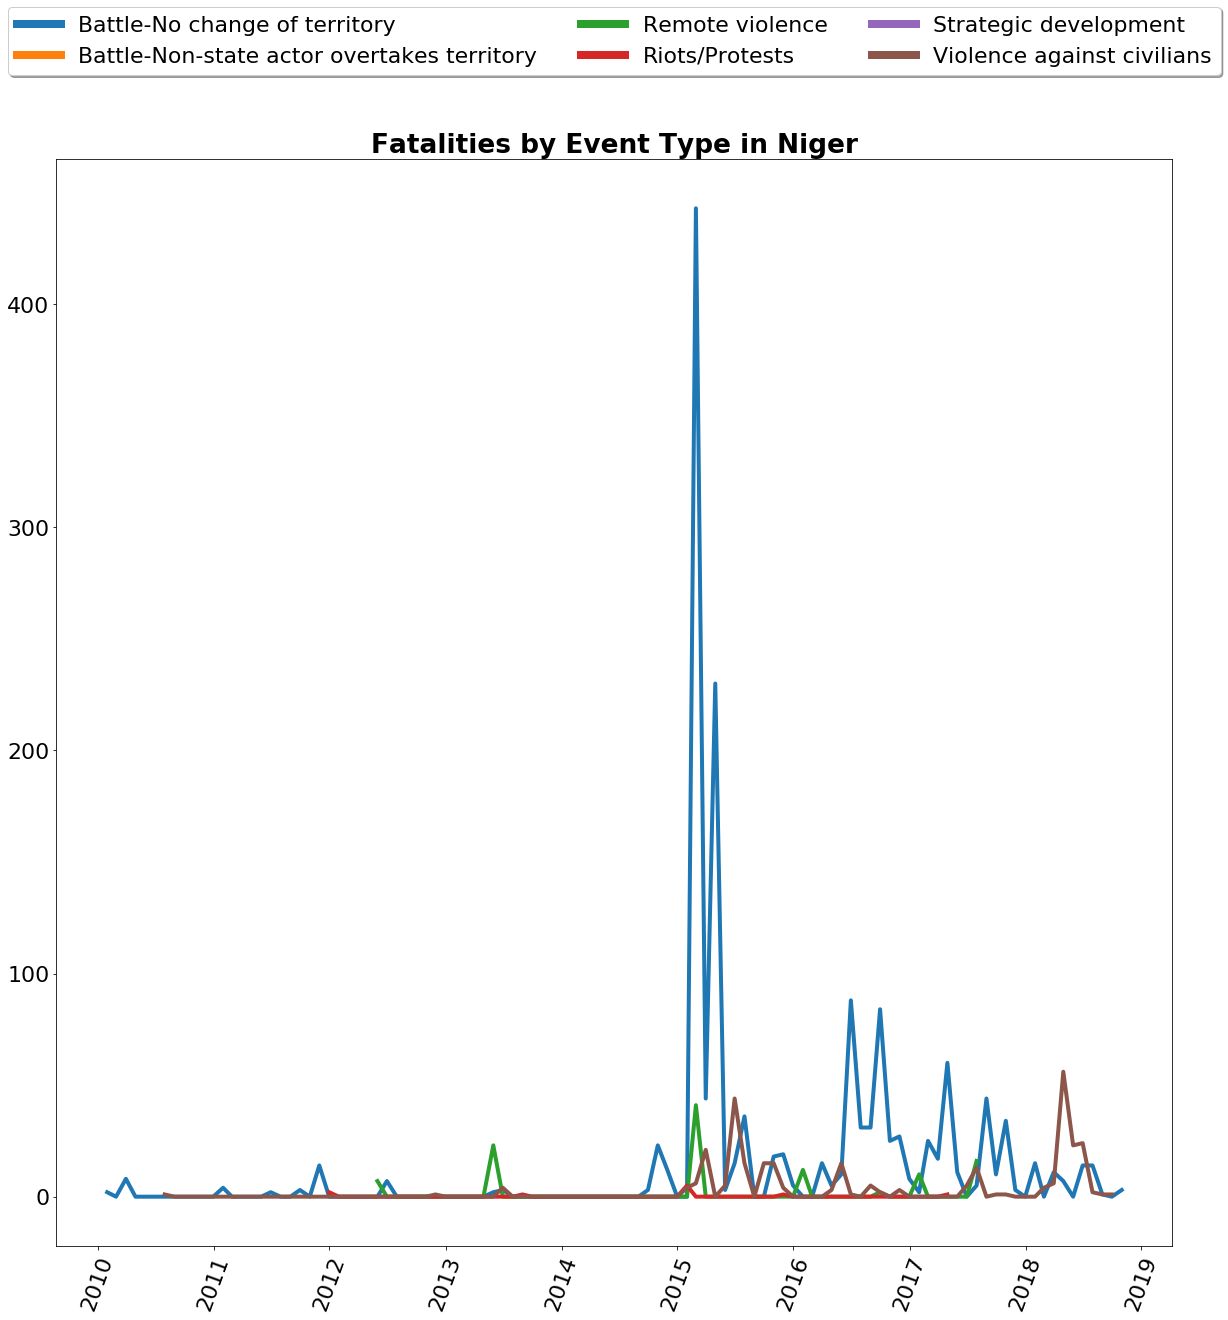

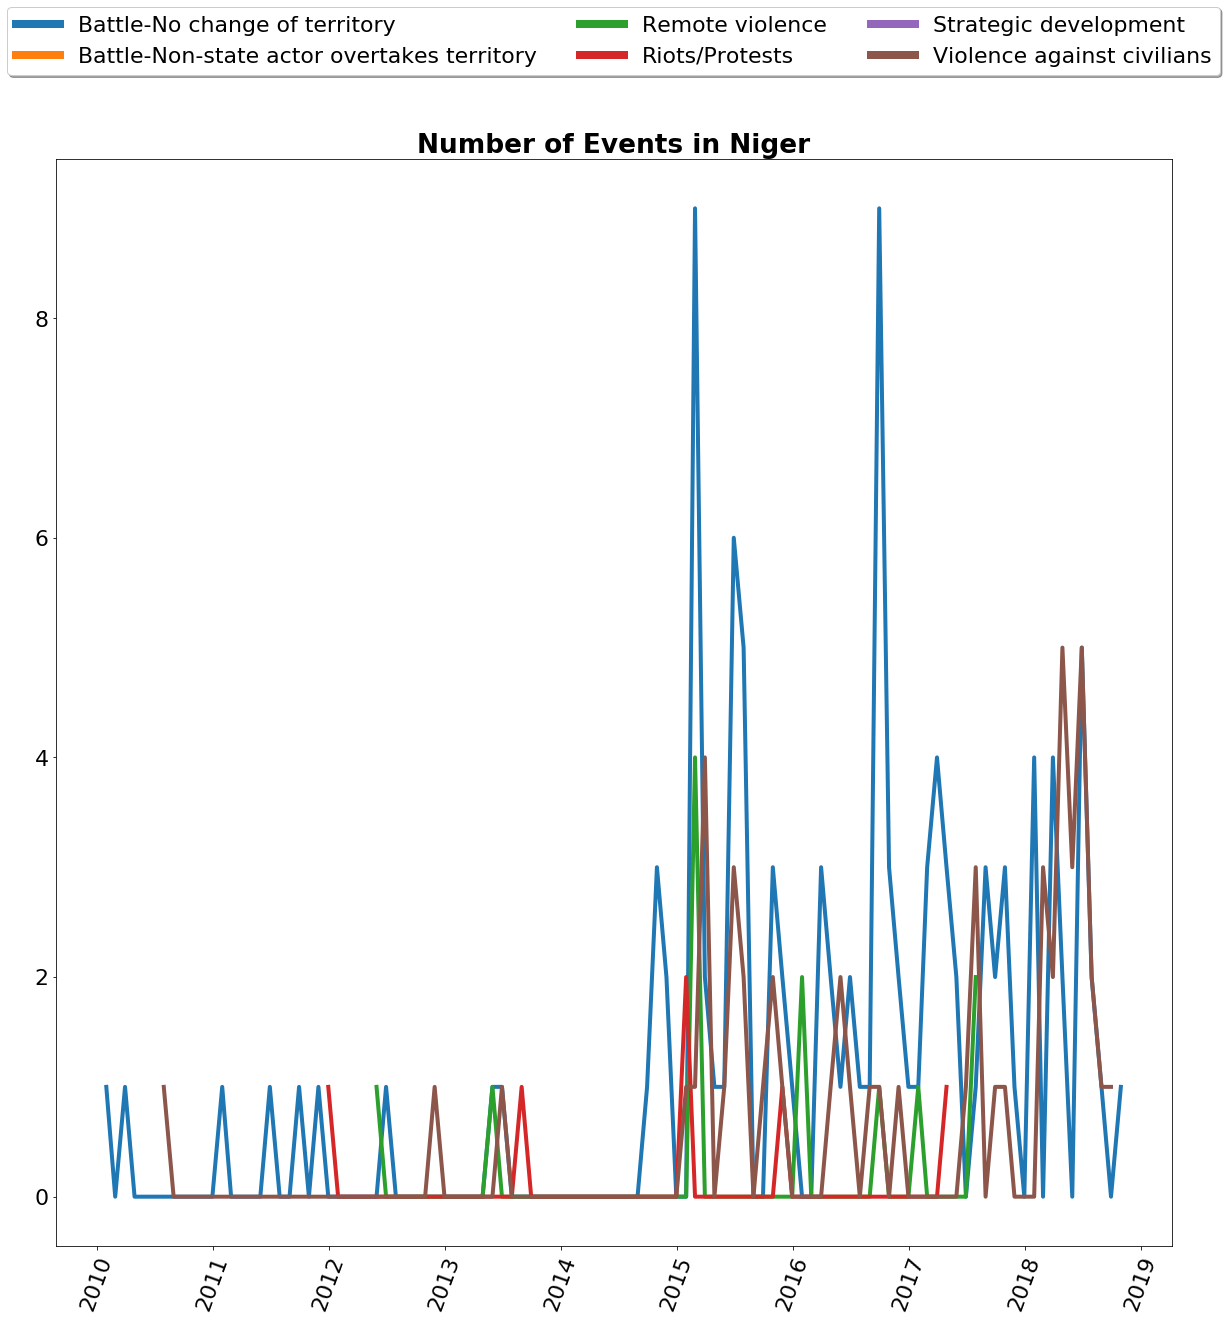

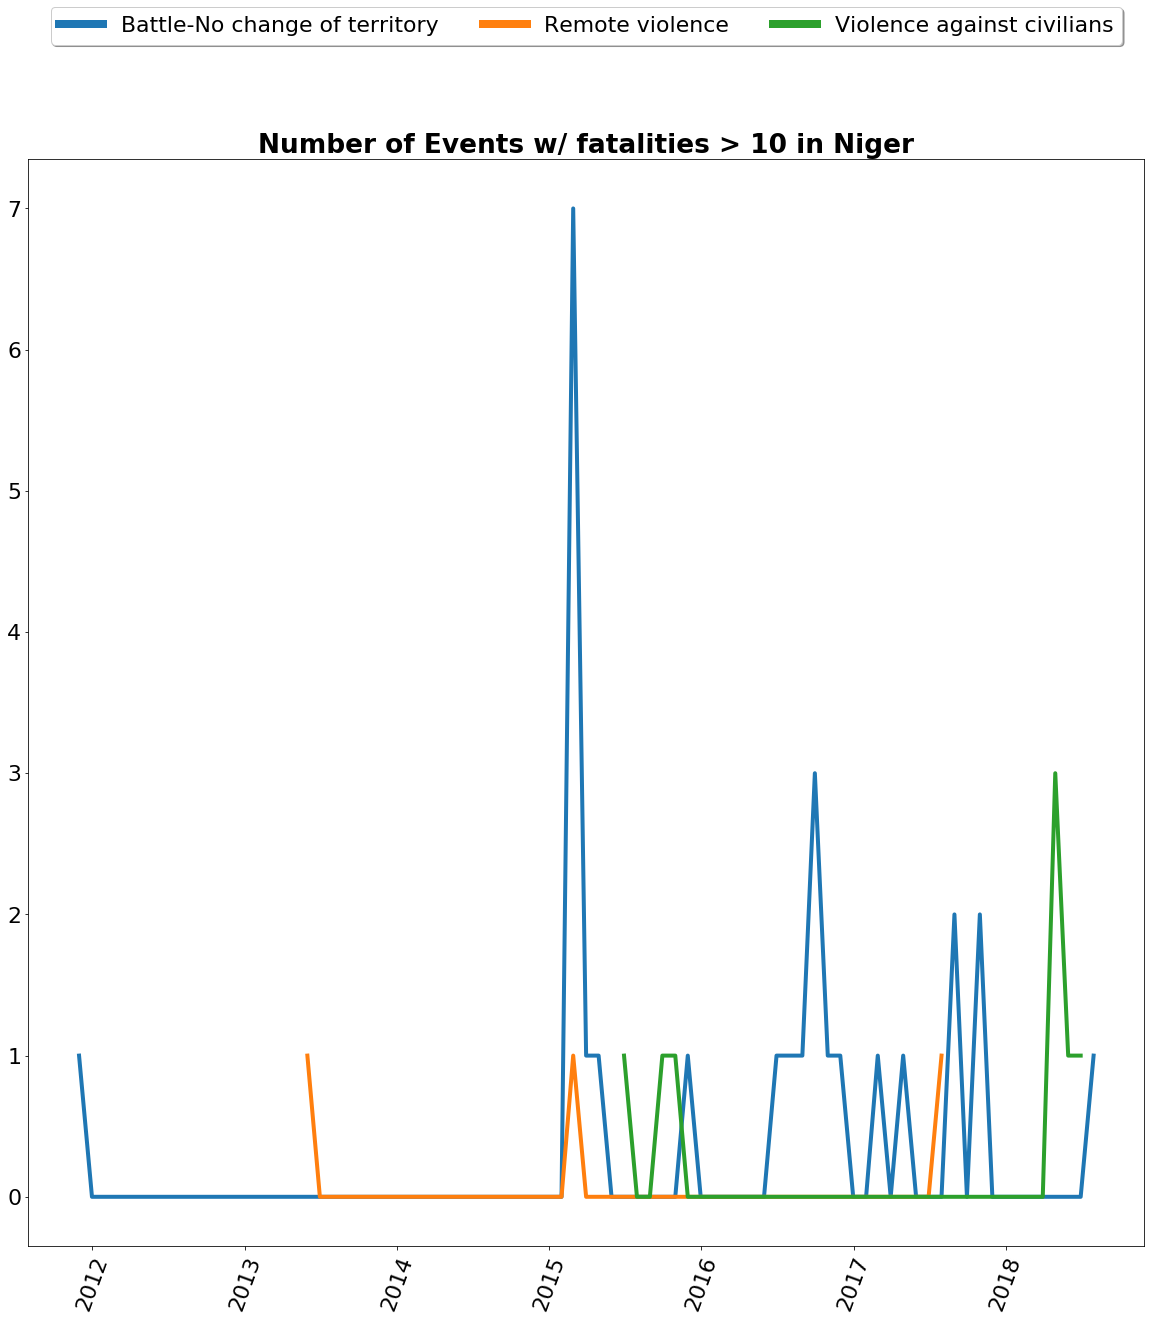

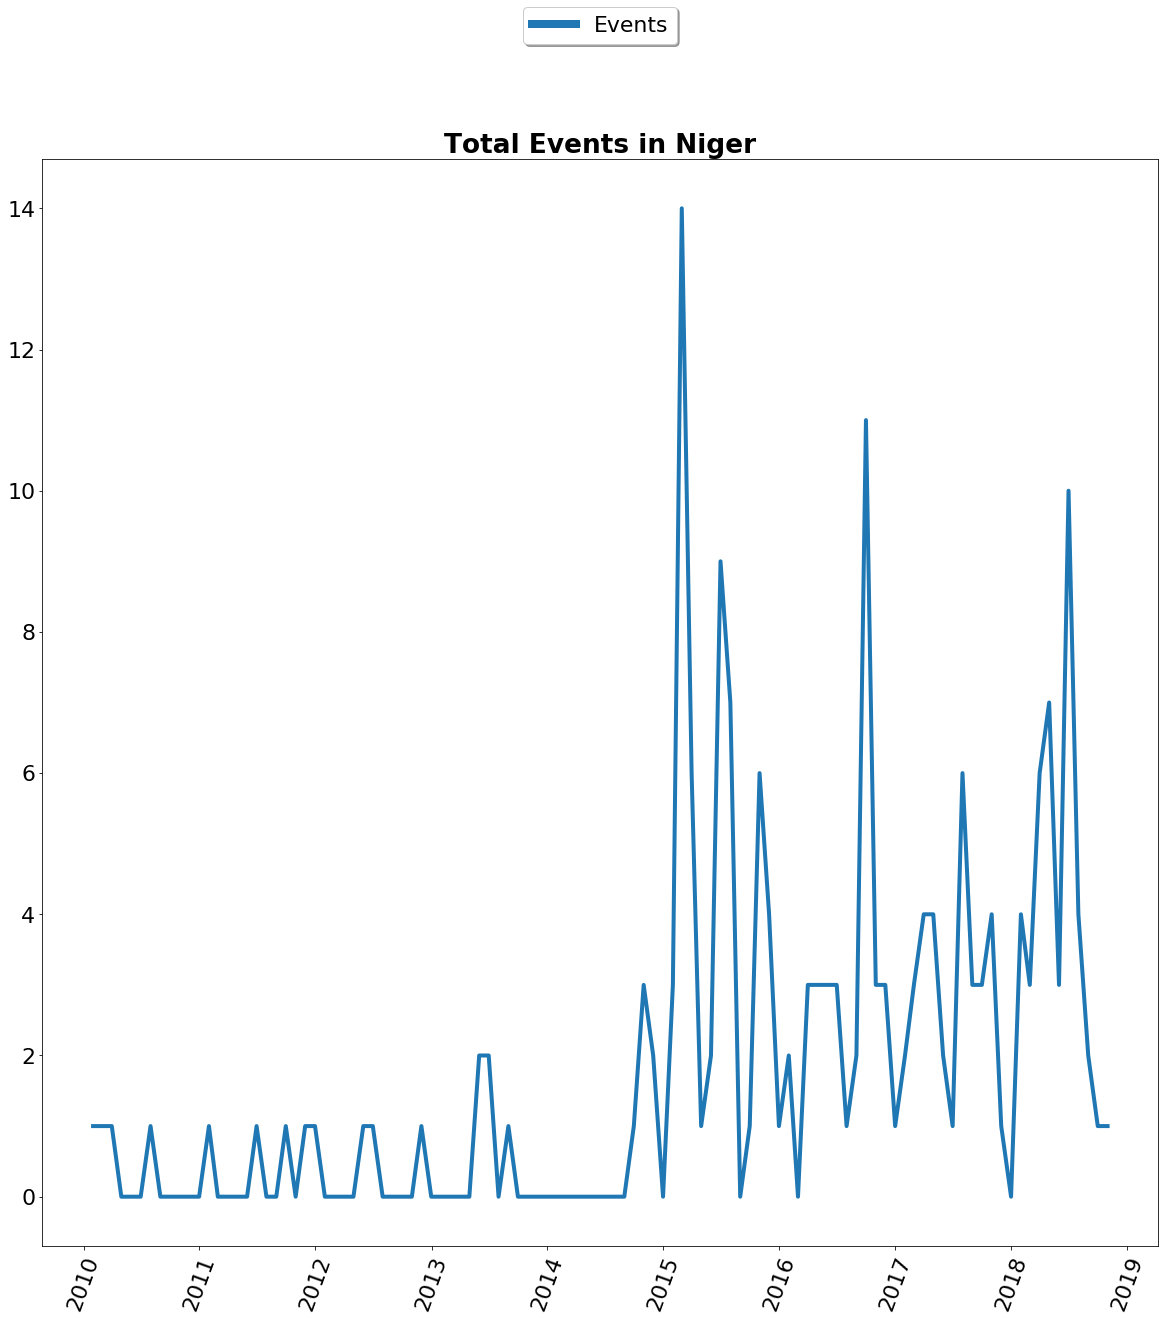

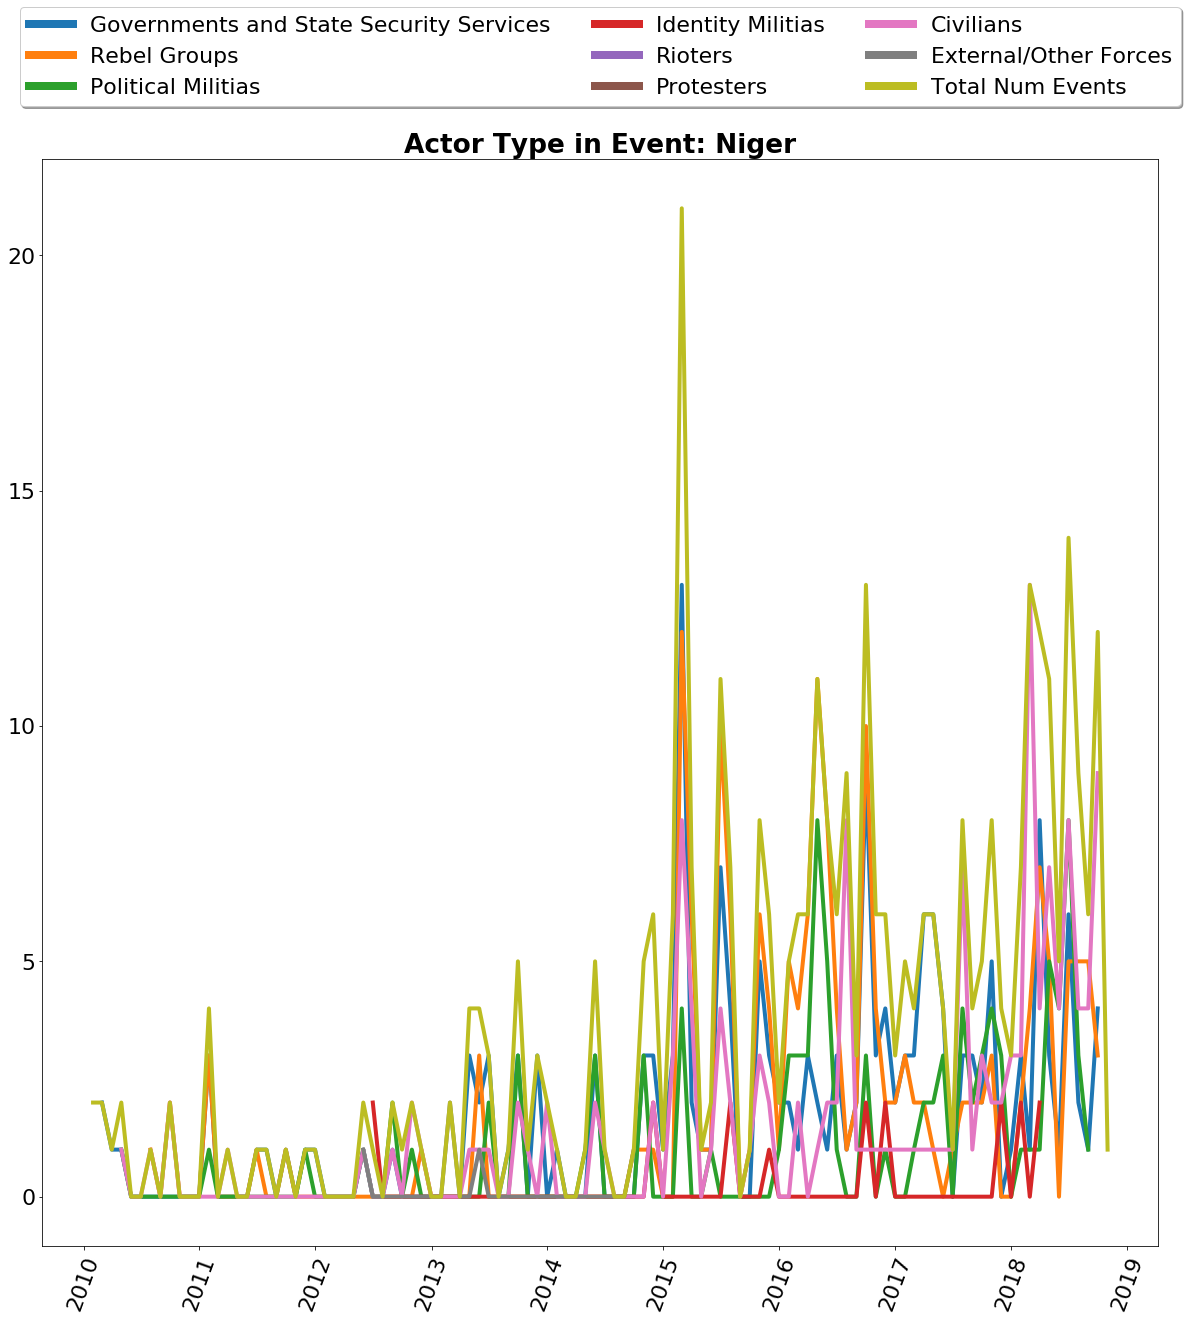

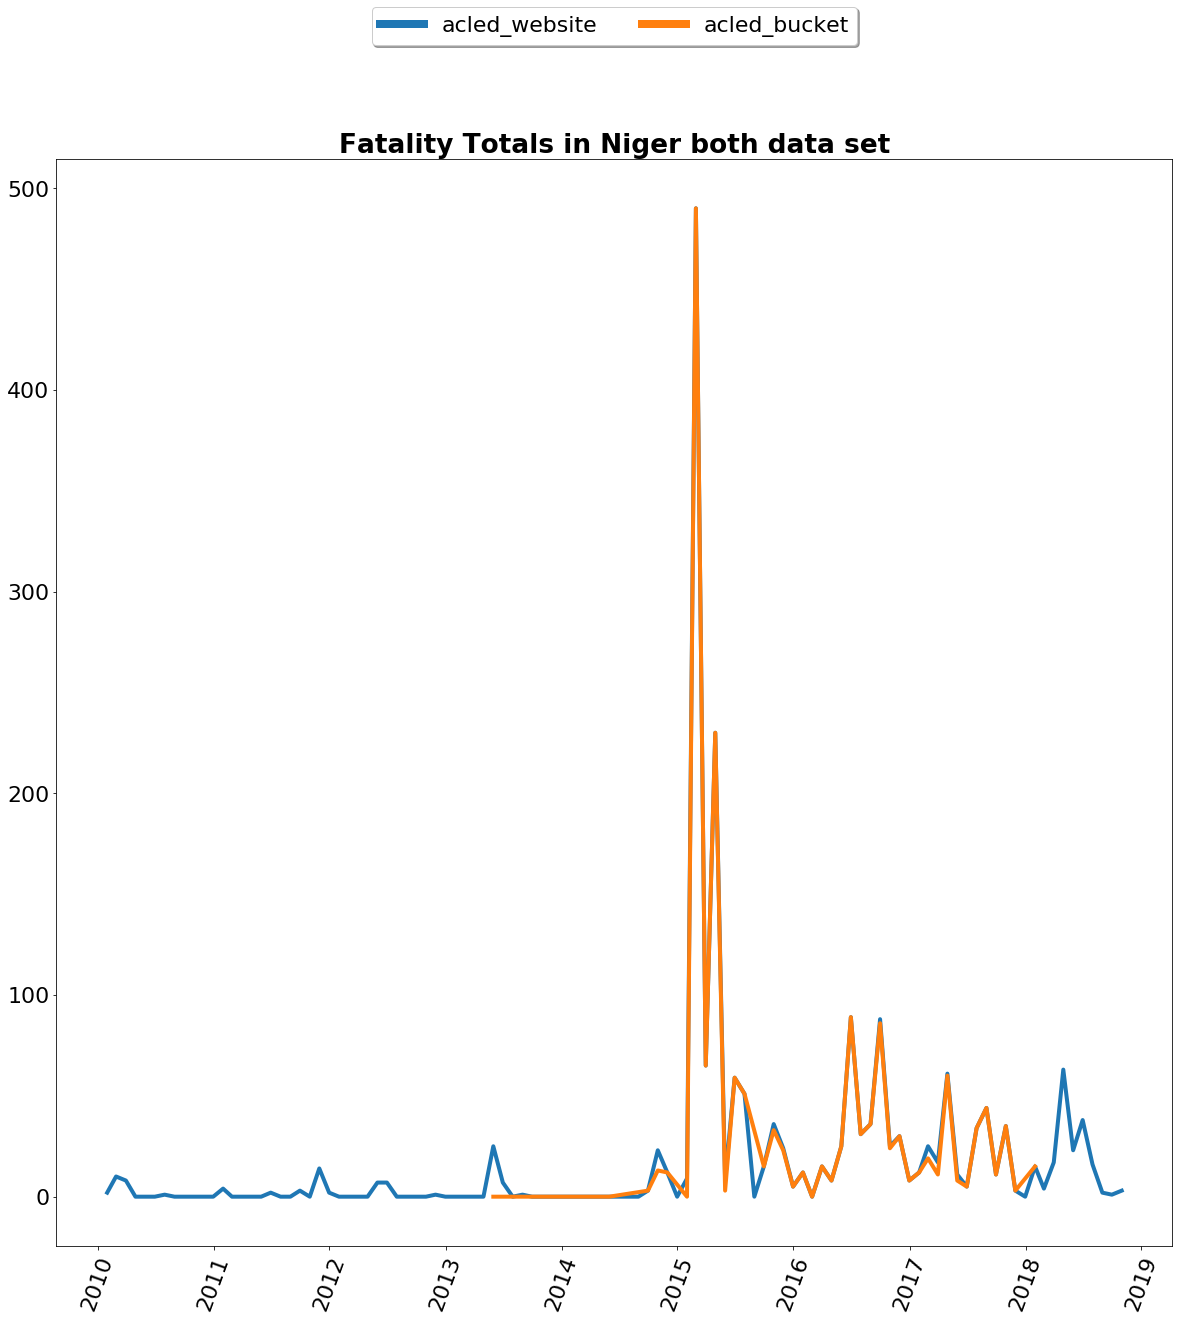

In [12]:
plot_fatalities_by_events(niger_aframe, 'Niger')
title_str = 'Number of Events in Niger'
event_counts(niger_aframe, title_str, 'event_type')
title_str = 'Number of Events w/ fatalities > 10 in Niger'
event_counts(niger_aframe, title_str, 'event_type', 10)
title_str = 'Total Events in Niger'
event_counts(niger_aframe, title_str)
actor_type(niger_aframe, 'Niger')
website_vs_bucket_fatalities(niger_aframe, niger_bframe, 'Niger')

NdviCrop.2014_11  NdviCrop.2015_03  NdviCrop.2015_10  NdviCrop.2016_03  \
count         51.000000         51.000000         51.000000         51.000000   
mean           0.206678          0.160353          0.255410          0.166902   
std            0.033076          0.015448          0.045566          0.018633   
min            0.164021          0.132919          0.176510          0.133865   
25%            0.185179          0.151909          0.226618          0.157124   
50%            0.199134          0.159389          0.247163          0.163188   
75%            0.225581          0.167643          0.274968          0.173985   
max            0.343024          0.214447          0.432760          0.232975   

       NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  NdviCrop.2018_03  
count         51.000000         51.000000         51.000000         51.000000  
mean           0.241150          0.163239          0.239672          0.168096  
std            0.046338          0.017871          0.048795          0.019229  
min            0.176427          0.130257          0.161037          0.124395  
25%            0.212214          0.150939          0.205914          0.159219  
50%            0.226146          0.160585          0.227702          0.167321  
75%            0.255126          0.173000          0.254349          0.173423  
max            0.420743          0.220196          0.422275          0.237501

number of Nan in NdviCrop


NdviCrop.2014_11    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC1_pct and NdviCrop by month
Correlation between IPC1_pct and NdviCrop all months: 
0.21505244244162752


Pearson's
.2014_11     0.143074
.2015_03     0.029915
.2015_10     0.179791
.2016_03    -0.189377
.2016_10     0.210997
.2017_03     0.093215
.2017_10     0.374278
.2018_03     0.244741
All Months   0.215052

.2017_10


NdviCrop.2014_11  NdviCrop.2015_03  NdviCrop.2015_10  NdviCrop.2016_03  \
count         51.000000         51.000000         51.000000         51.000000   
mean           0.206678          0.160353          0.255410          0.166902   
std            0.033076          0.015448          0.045566          0.018633   
min            0.164021          0.132919          0.176510          0.133865   
25%            0.185179          0.151909          0.226618          0.157124   
50%            0.199134          0.159389          0.247163          0.163188   
75%            0.225581          0.167643          0.274968          0.173985   
max            0.343024          0.214447          0.432760          0.232975   

       NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  NdviCrop.2018_03  
count         51.000000         51.000000         51.000000         51.000000  
mean           0.241150          0.163239          0.239672          0.168096  
std            0.046338          0.017871          0.048795          0.019229  
min            0.176427          0.130257          0.161037          0.124395  
25%            0.212214          0.150939          0.205914          0.159219  
50%            0.226146          0.160585          0.227702          0.167321  
75%            0.255126          0.173000          0.254349          0.173423  
max            0.420743          0.220196          0.422275          0.237501

number of Nan in NdviCrop


NdviCrop.2014_11    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC2_pct and NdviCrop by month
Correlation between IPC2_pct and NdviCrop all months: 
-0.21066117263086837


Pearson's
.2014_11    -0.281314
.2015_03    -0.043473
.2015_10    -0.208441
.2016_03     0.128207
.2016_10    -0.244085
.2017_03    -0.118530
.2017_10    -0.348466
.2018_03    -0.219724
All Months  -0.210661

.2017_10


NdviCrop.2014_11  NdviCrop.2015_03  NdviCrop.2015_10  NdviCrop.2016_03  \
count         51.000000         51.000000         51.000000         51.000000   
mean           0.206678          0.160353          0.255410          0.166902   
std            0.033076          0.015448          0.045566          0.018633   
min            0.164021          0.132919          0.176510          0.133865   
25%            0.185179          0.151909          0.226618          0.157124   
50%            0.199134          0.159389          0.247163          0.163188   
75%            0.225581          0.167643          0.274968          0.173985   
max            0.343024          0.214447          0.432760          0.232975   

       NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  NdviCrop.2018_03  
count         51.000000         51.000000         51.000000         51.000000  
mean           0.241150          0.163239          0.239672          0.168096  
std            0.046338          0.017871          0.048795          0.019229  
min            0.176427          0.130257          0.161037          0.124395  
25%            0.212214          0.150939          0.205914          0.159219  
50%            0.226146          0.160585          0.227702          0.167321  
75%            0.255126          0.173000          0.254349          0.173423  
max            0.420743          0.220196          0.422275          0.237501

number of Nan in NdviCrop


NdviCrop.2014_11    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC3_pct and NdviCrop by month
Correlation between IPC3_pct and NdviCrop all months: 
-0.16491521509949514


Pearson's
.2014_11     0.200363
.2015_03    -0.020103
.2015_10    -0.052253
.2016_03     0.196105
.2016_10    -0.136039
.2017_03    -0.091224
.2017_10    -0.271693
.2018_03    -0.232578
All Months  -0.164915

.2017_10


NdviCrop.2014_11  NdviCrop.2015_03  NdviCrop.2015_10  NdviCrop.2016_03  \
count         51.000000         51.000000         51.000000         51.000000   
mean           0.206678          0.160353          0.255410          0.166902   
std            0.033076          0.015448          0.045566          0.018633   
min            0.164021          0.132919          0.176510          0.133865   
25%            0.185179          0.151909          0.226618          0.157124   
50%            0.199134          0.159389          0.247163          0.163188   
75%            0.225581          0.167643          0.274968          0.173985   
max            0.343024          0.214447          0.432760          0.232975   

       NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  NdviCrop.2018_03  
count         51.000000         51.000000         51.000000         51.000000  
mean           0.241150          0.163239          0.239672          0.168096  
std            0.046338          0.017871          0.048795          0.019229  
min            0.176427          0.130257          0.161037          0.124395  
25%            0.212214          0.150939          0.205914          0.159219  
50%            0.226146          0.160585          0.227702          0.167321  
75%            0.255126          0.173000          0.254349          0.173423  
max            0.420743          0.220196          0.422275          0.237501

number of Nan in NdviCrop


NdviCrop.2014_11    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC4_pct and NdviCrop by month
Correlation between IPC4_pct and NdviCrop all months: 
-0.07878817359608525


Pearson's
.2014_11    -0.042688
.2015_03     0.135187
.2015_10    -0.089240
.2016_03     0.185824
.2016_10    -0.054462
.2017_03     0.146646
.2017_10    -0.151949
.2018_03    -0.123938
All Months  -0.078788

.2016_03


NdviCrop.2014_11  NdviCrop.2015_03  NdviCrop.2015_10  NdviCrop.2016_03  \
count         51.000000         51.000000         51.000000         51.000000   
mean           0.206678          0.160353          0.255410          0.166902   
std            0.033076          0.015448          0.045566          0.018633   
min            0.164021          0.132919          0.176510          0.133865   
25%            0.185179          0.151909          0.226618          0.157124   
50%            0.199134          0.159389          0.247163          0.163188   
75%            0.225581          0.167643          0.274968          0.173985   
max            0.343024          0.214447          0.432760          0.232975   

       NdviCrop.2016_10  NdviCrop.2017_03  NdviCrop.2017_10  NdviCrop.2018_03  
count         51.000000         51.000000         51.000000         51.000000  
mean           0.241150          0.163239          0.239672          0.168096  
std            0.046338          0.017871          0.048795          0.019229  
min            0.176427          0.130257          0.161037          0.124395  
25%            0.212214          0.150939          0.205914          0.159219  
50%            0.226146          0.160585          0.227702          0.167321  
75%            0.255126          0.173000          0.254349          0.173423  
max            0.420743          0.220196          0.422275          0.237501

number of Nan in NdviCrop


NdviCrop.2014_11    10
NdviCrop.2015_03    10
NdviCrop.2015_10    10
NdviCrop.2016_03    10
NdviCrop.2016_10    10
NdviCrop.2017_03    10
NdviCrop.2017_10    10
NdviCrop.2018_03    10
dtype: int64

Correlation between IPC5_pct and NdviCrop by month
Correlation between IPC5_pct and NdviCrop all months: 
nan


Pearson's
.2014_11          NaN
.2015_03          NaN
.2015_10          NaN
.2016_03          NaN
.2016_10          NaN
.2017_03          NaN
.2017_10          NaN
.2018_03          NaN
All Months        NaN

nan


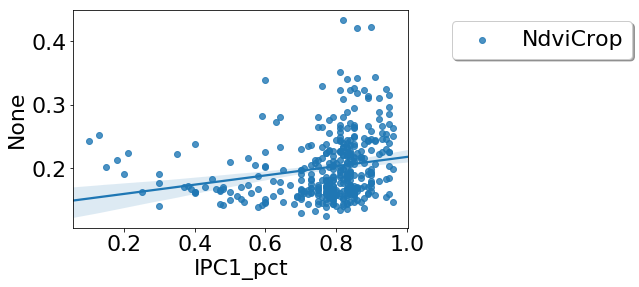

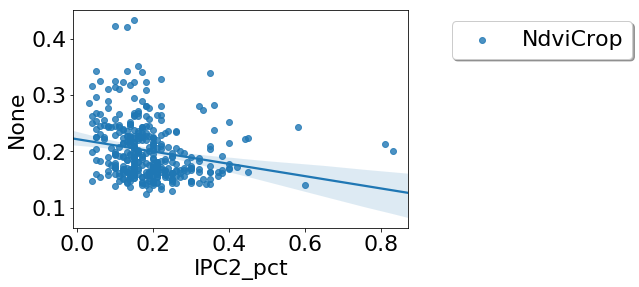

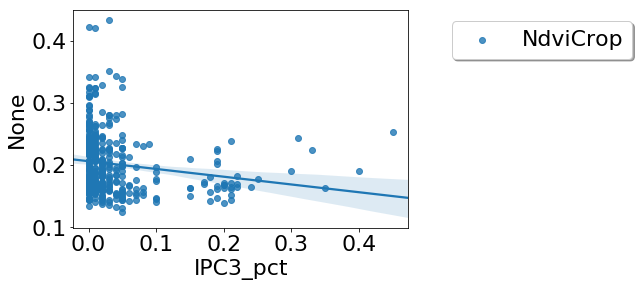

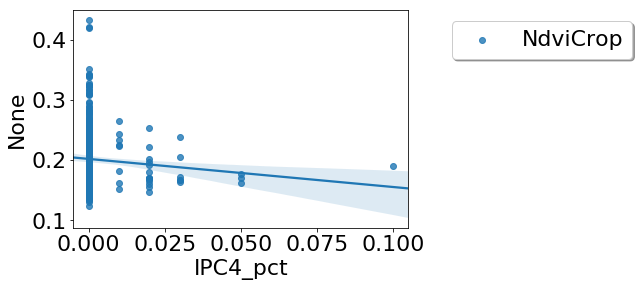

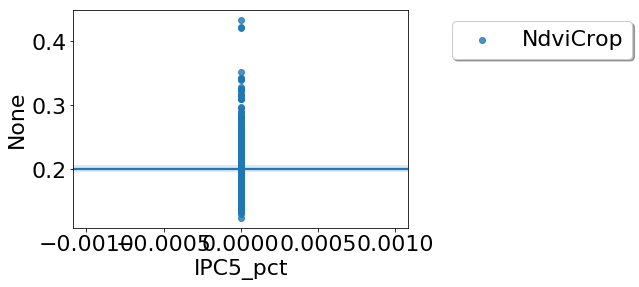

In [13]:
IPC_pct_corr_plots(niger_bframe)

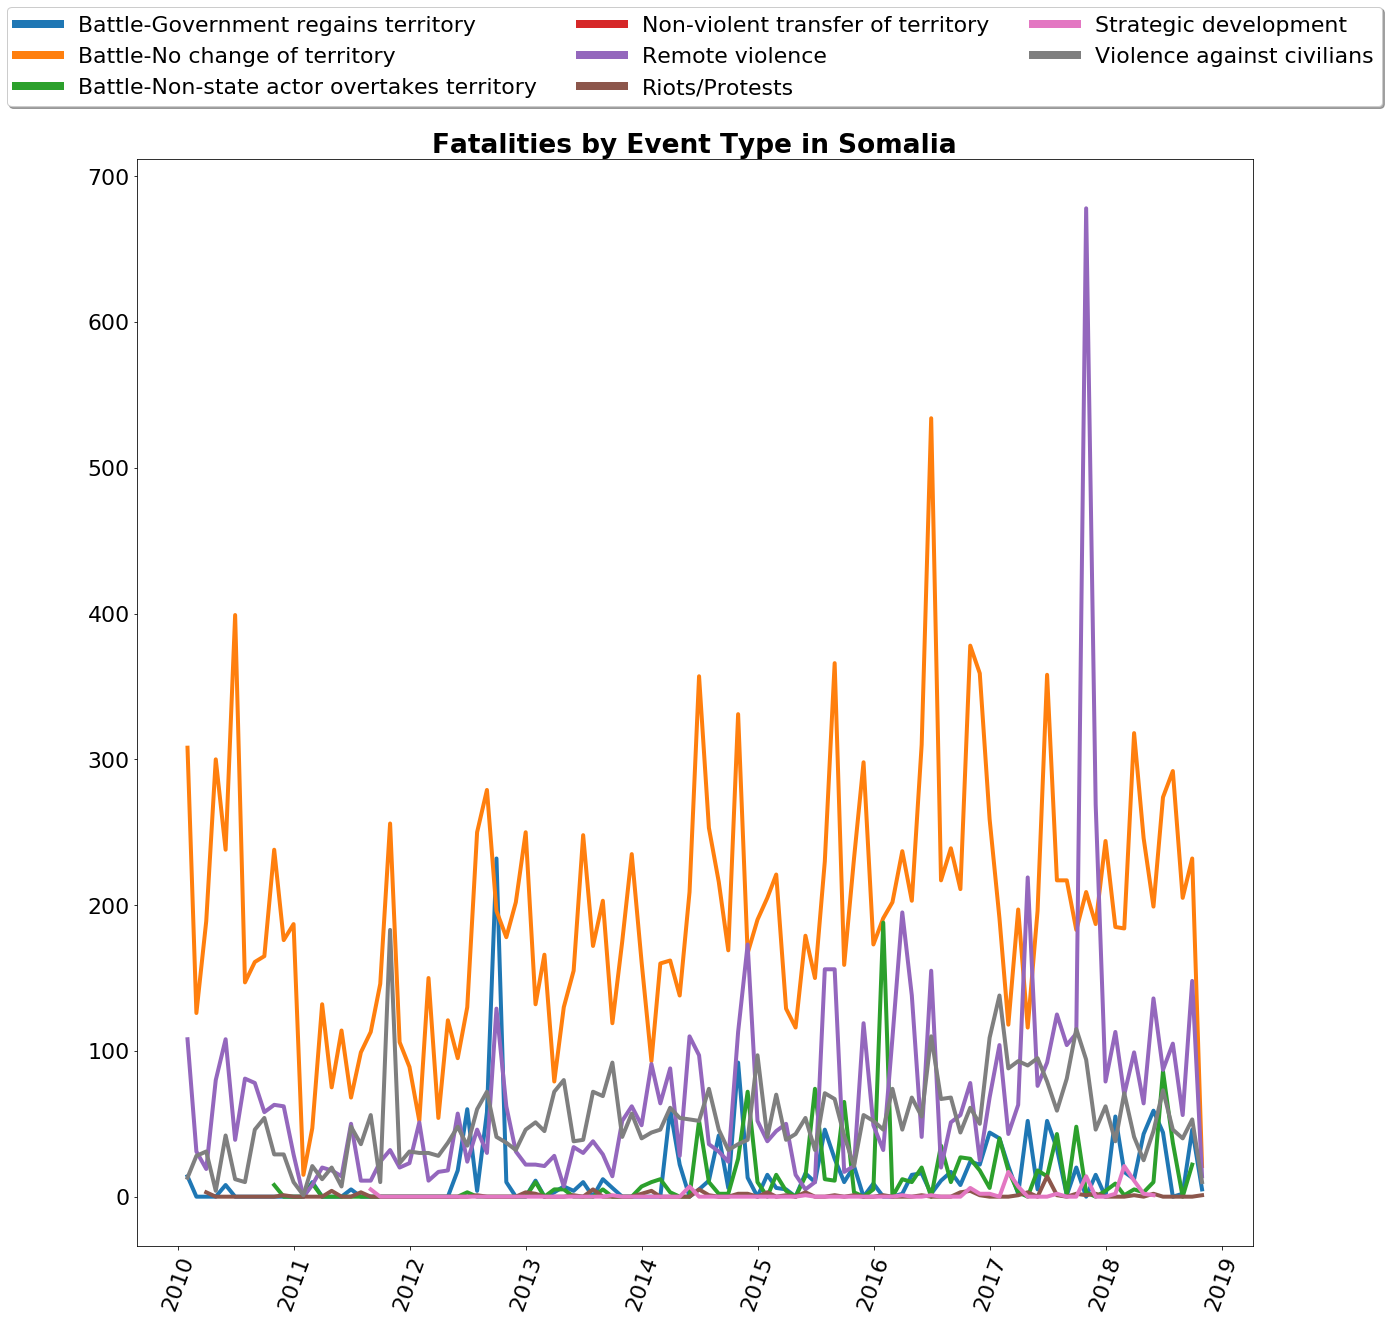

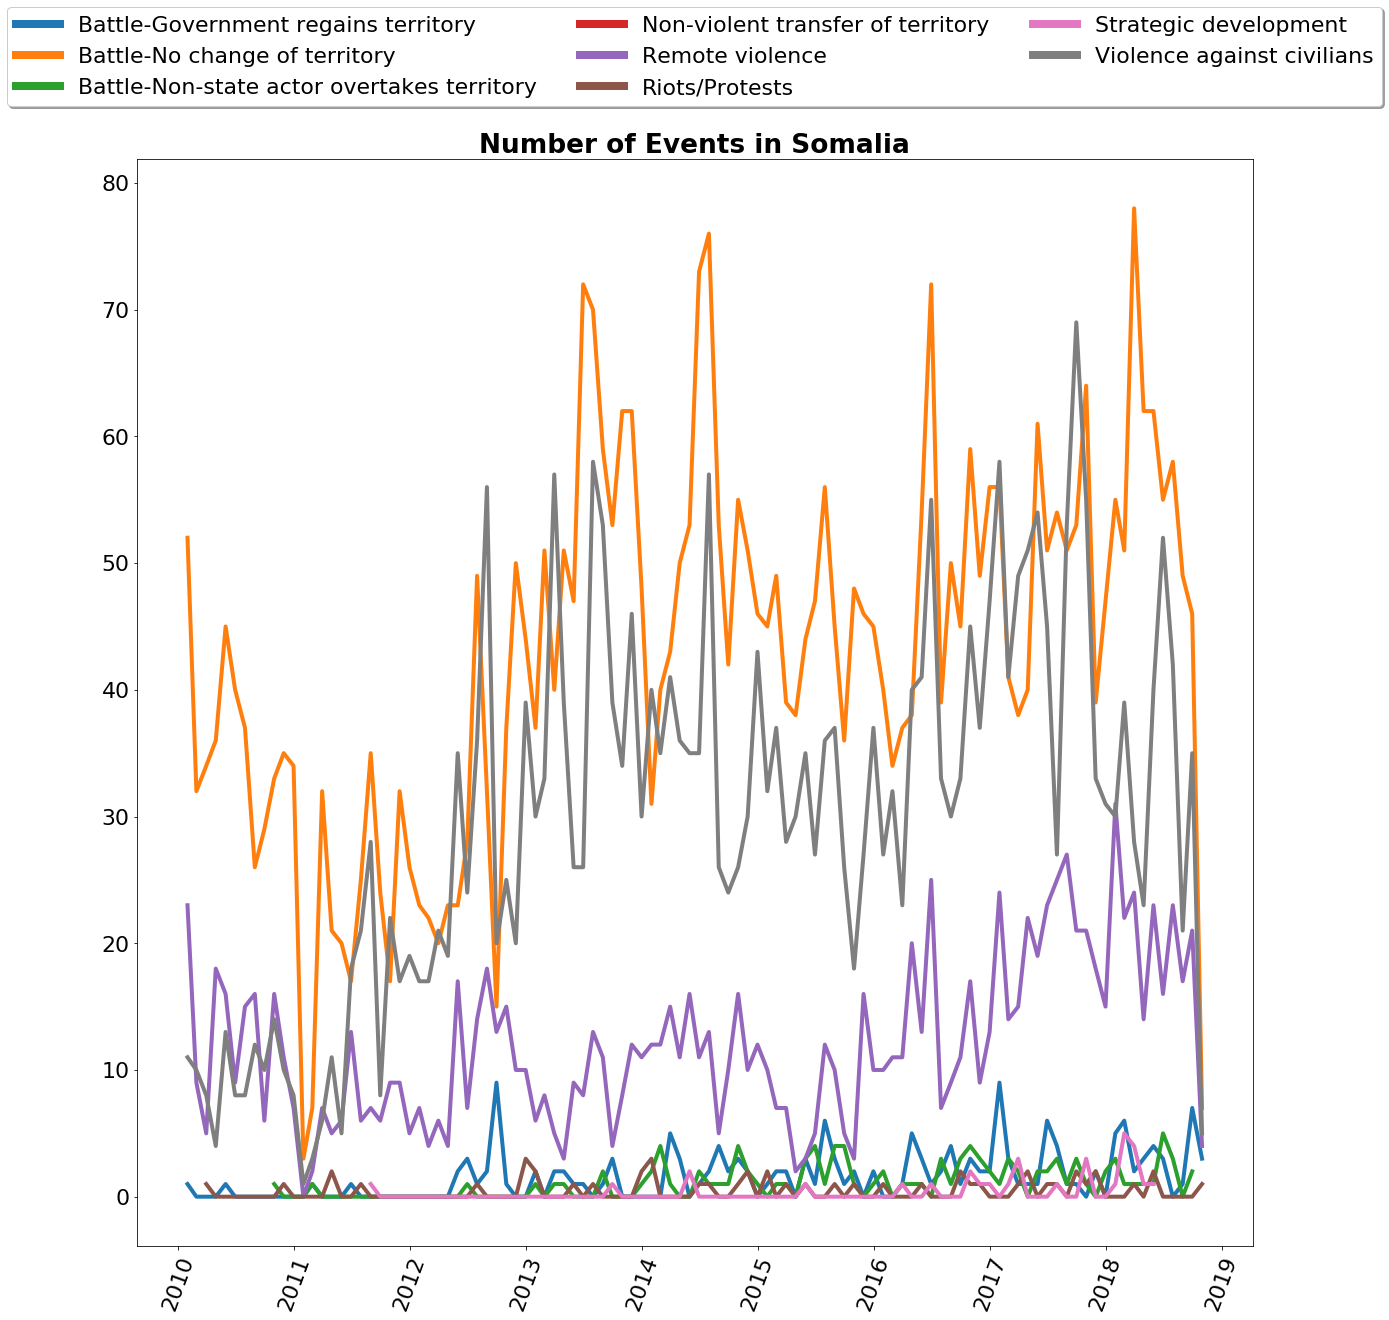

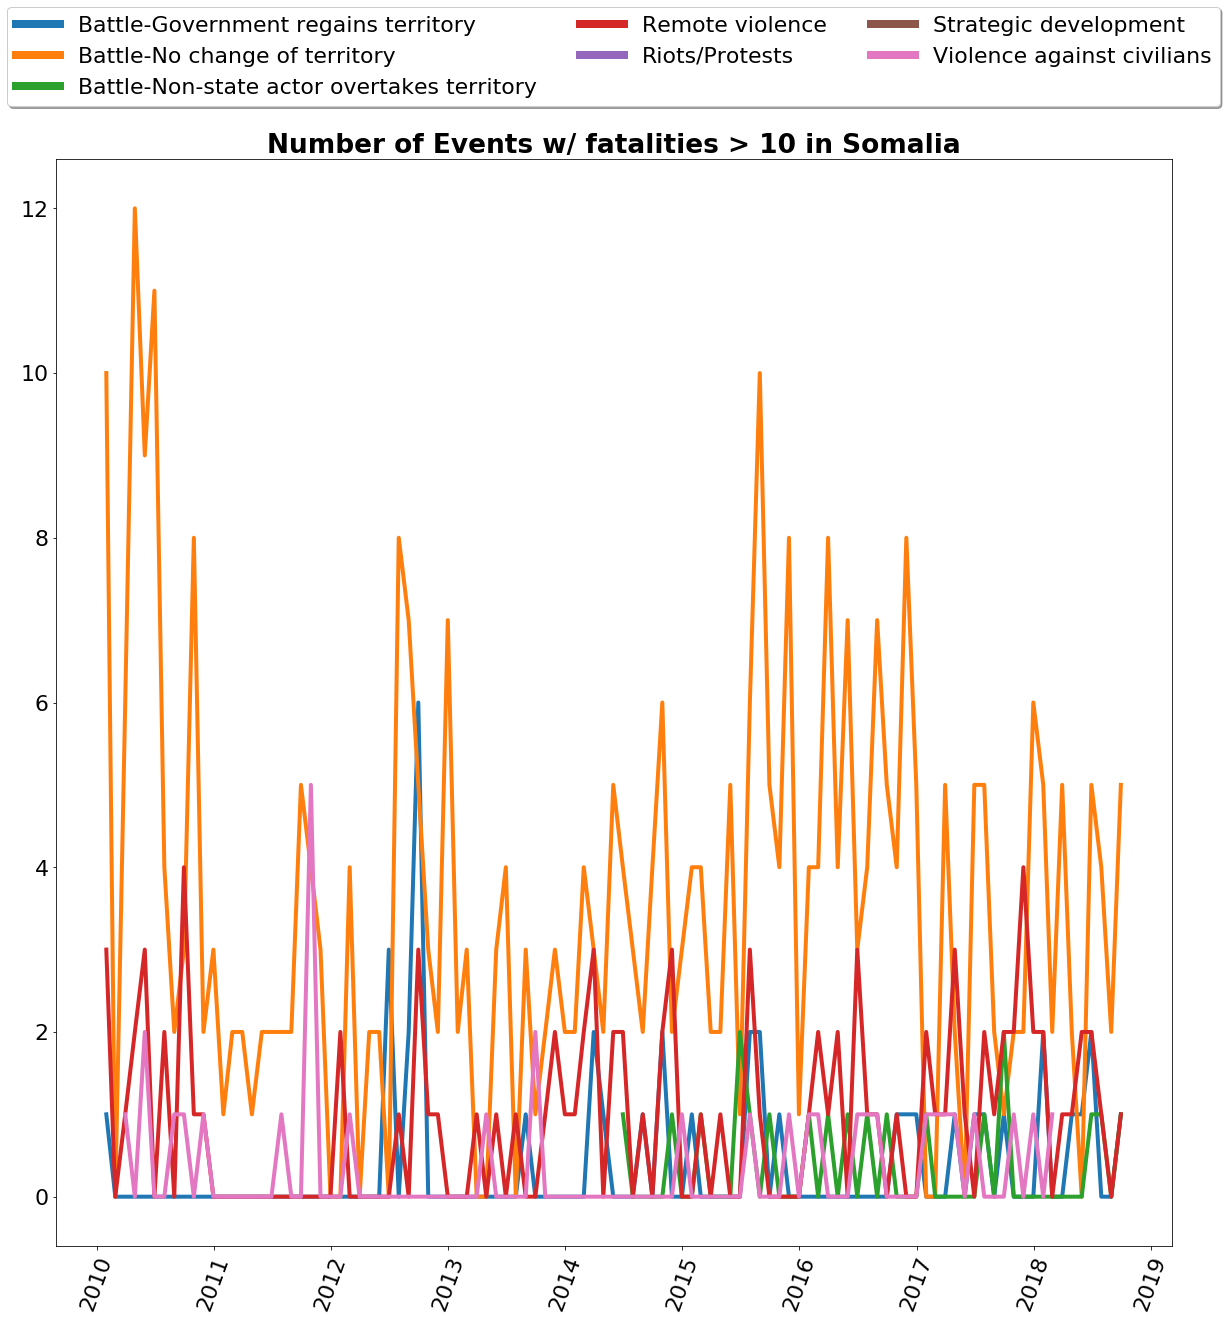

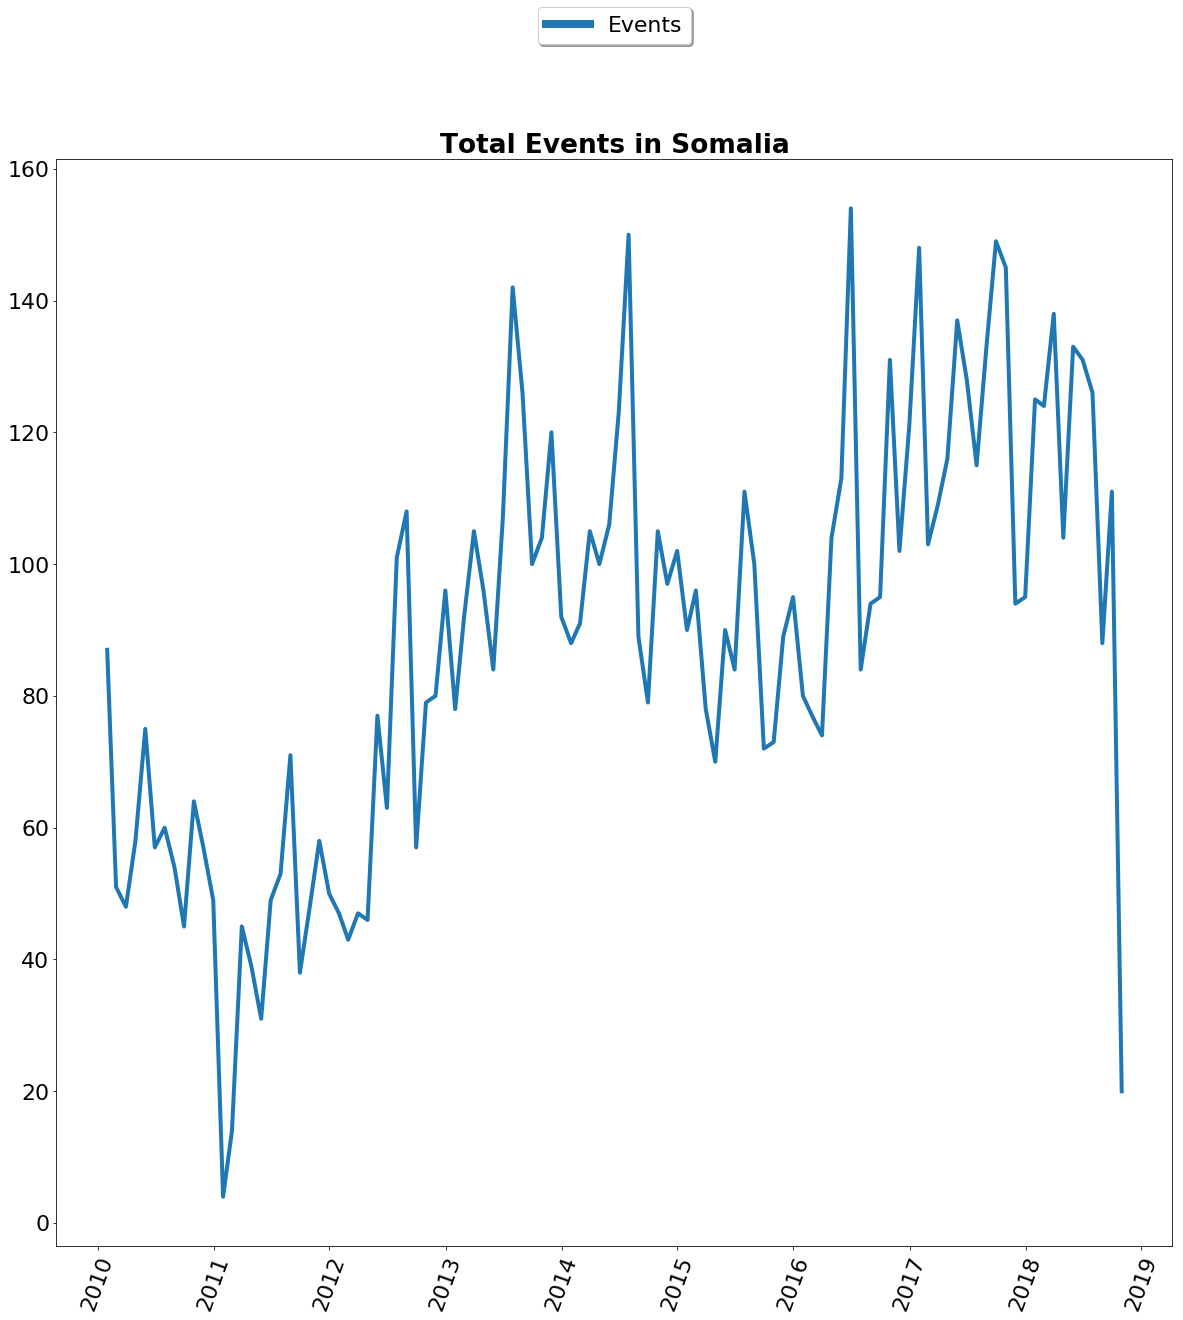

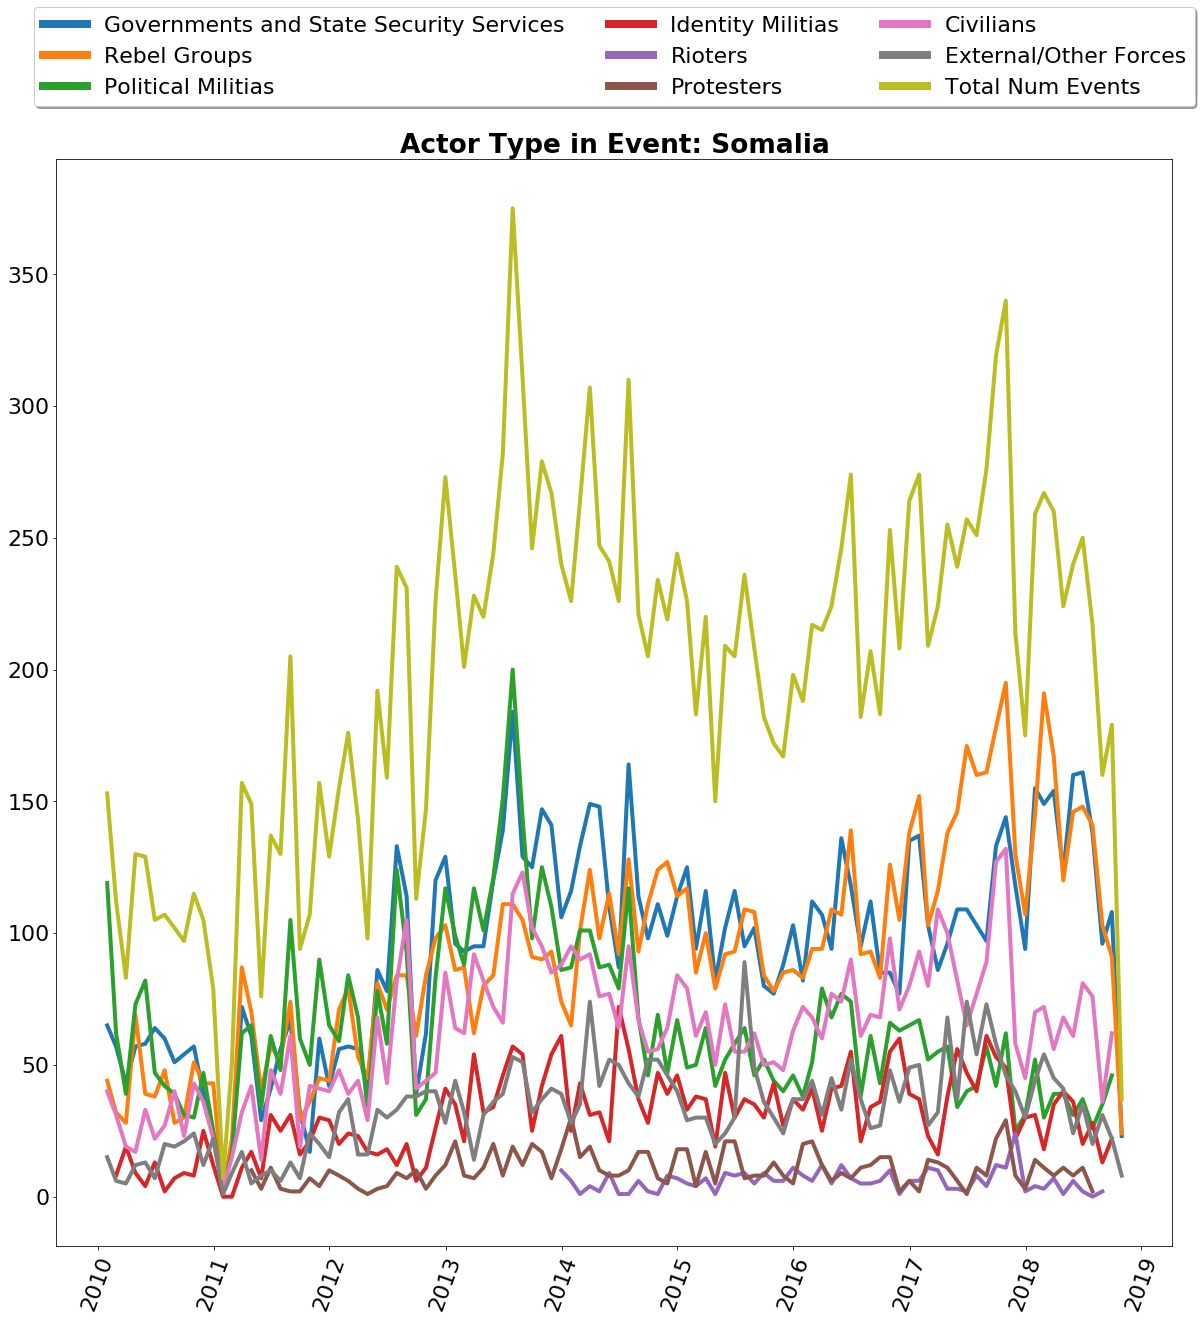

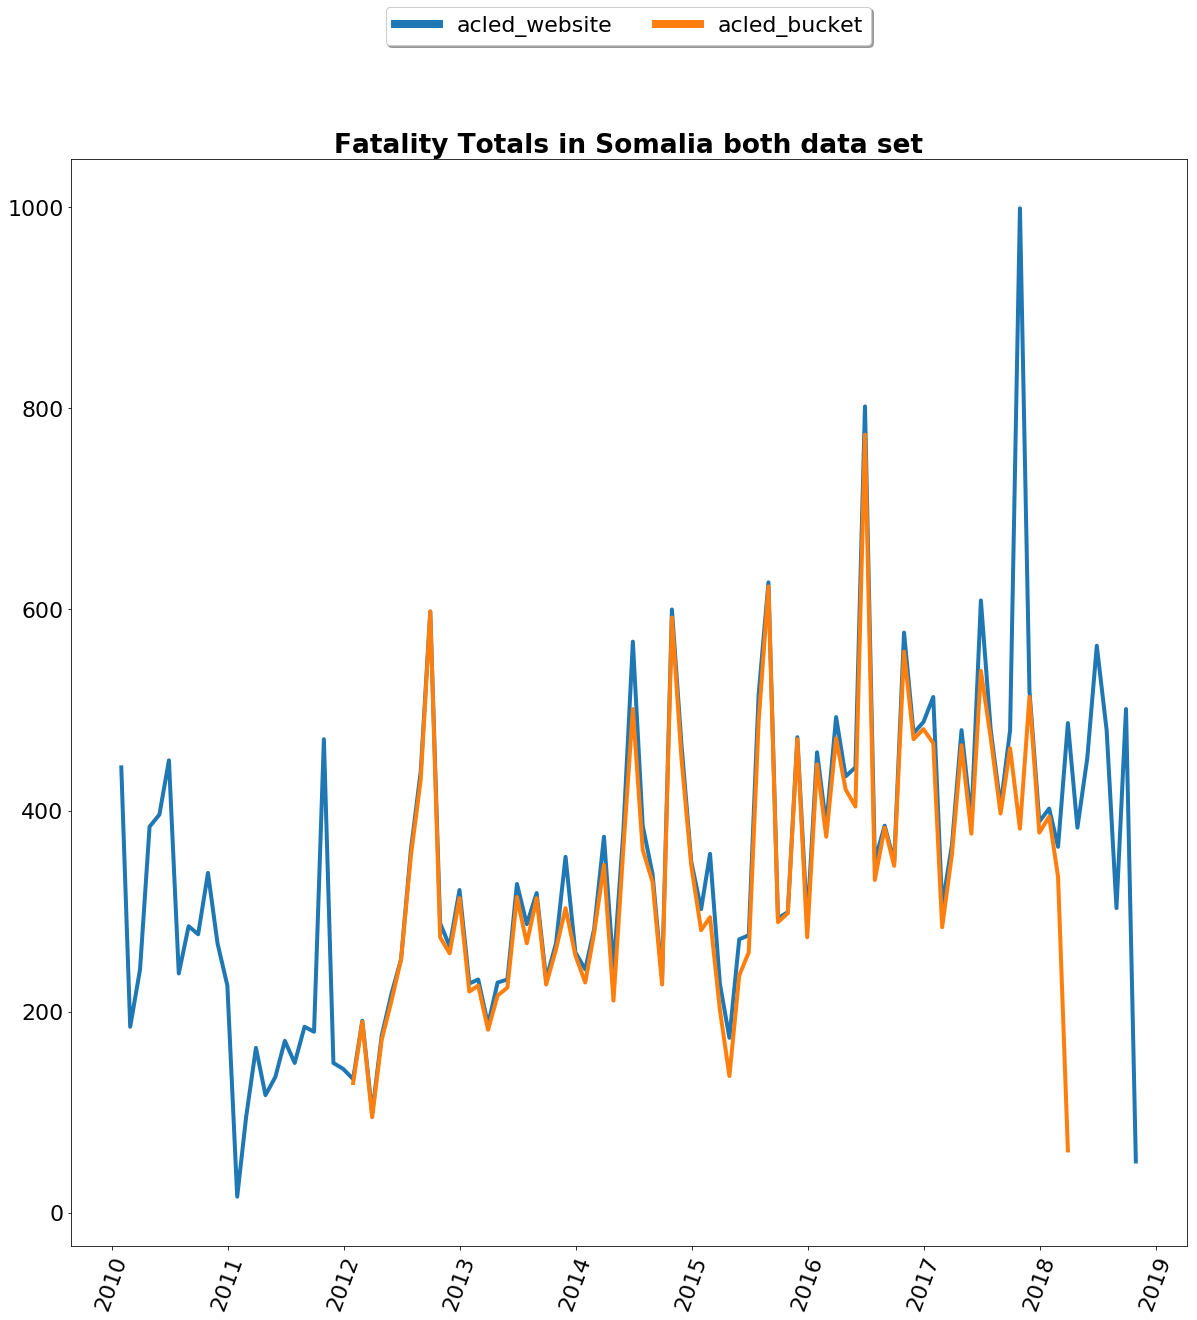

In [14]:
plot_fatalities_by_events(somalia_aframe, 'Somalia')
title_str = 'Number of Events in Somalia'
event_counts(somalia_aframe, title_str, 'event_type')
title_str = 'Number of Events w/ fatalities > 10 in Somalia'
event_counts(somalia_aframe, title_str, 'event_type', 10)
title_str = 'Total Events in Somalia'
event_counts(somalia_aframe, title_str)
actor_type(somalia_aframe, 'Somalia')
website_vs_bucket_fatalities(somalia_aframe, somalia_bframe, 'Somalia')

NdviCrop.2012_01  NdviCrop.2012_07  NdviCrop.2013_01  NdviCrop.2013_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.376129          0.367938          0.352676          0.415462   
std            0.158255          0.147040          0.123492          0.175966   
min            0.169250          0.167117          0.170920          0.188323   
25%            0.251544          0.228951          0.262220          0.253899   
50%            0.354023          0.338878          0.330555          0.366844   
75%            0.510808          0.523239          0.497561          0.587750   
max            0.656632          0.677167          0.550716          0.718450   

       NdviCrop.2014_01  NdviCrop.2014_07  NdviCrop.2015_01  NdviCrop.2015_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.352659          0.384903          0.318162          0.386835   
std            0.111014          0.159304          0.101255          0.152064   
min            0.201865          0.191913          0.179245          0.193187   
25%            0.254200          0.256325          0.234550          0.250550   
50%            0.333045          0.323616          0.294905          0.369600   
75%            0.432765          0.540801          0.410150          0.532386   
max            0.563670          0.701034          0.506150          0.660202   

       NdviCrop.2016_01  NdviCrop.2016_07  NdviCrop.2017_01  NdviCrop.2017_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.364813          0.389245          0.308532          0.344916   
std            0.130149          0.151432          0.120315          0.161049   
min            0.165985          0.170250          0.164524          0.157889   
25%            0.259235          0.273800          0.202000          0.209279   
50%            0.377134          0.343728          0.256011          0.295853   
75%            0.434620          0.525944          0.423058          0.471893   
max            0.611472          0.627333          0.592875          0.700711   

       NdviCrop.2018_01  
count         33.000000  
mean           0.306172  
std            0.096241  
min            0.180467  
25%            0.219633  
50%            0.295021  
75%            0.396705  
max            0.533083

number of Nan in NdviCrop


NdviCrop.2012_01    40
NdviCrop.2012_07    40
NdviCrop.2013_01    40
NdviCrop.2013_07    40
NdviCrop.2014_01    40
NdviCrop.2014_07    40
NdviCrop.2015_01    40
NdviCrop.2015_07    40
NdviCrop.2016_01    40
NdviCrop.2016_07    40
NdviCrop.2017_01    40
NdviCrop.2017_07    40
NdviCrop.2018_01    40
dtype: int64

Correlation between IPC1_pct and NdviCrop by month
Correlation between IPC1_pct and NdviCrop all months: 
0.02871093287941381


Pearson's
.2012_01    -0.150991
.2012_07    -0.048505
.2013_01    -0.262933
.2013_07    -0.170853
.2014_01    -0.343390
.2014_07    -0.109942
.2015_01    -0.323983
.2015_07     0.001166
.2016_01     0.025232
.2016_07    -0.069171
.2017_01    -0.264717
.2017_07     0.174729
.2018_01          NaN
All Months   0.028711

.2014_01


NdviCrop.2012_01  NdviCrop.2012_07  NdviCrop.2013_01  NdviCrop.2013_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.376129          0.367938          0.352676          0.415462   
std            0.158255          0.147040          0.123492          0.175966   
min            0.169250          0.167117          0.170920          0.188323   
25%            0.251544          0.228951          0.262220          0.253899   
50%            0.354023          0.338878          0.330555          0.366844   
75%            0.510808          0.523239          0.497561          0.587750   
max            0.656632          0.677167          0.550716          0.718450   

       NdviCrop.2014_01  NdviCrop.2014_07  NdviCrop.2015_01  NdviCrop.2015_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.352659          0.384903          0.318162          0.386835   
std            0.111014          0.159304          0.101255          0.152064   
min            0.201865          0.191913          0.179245          0.193187   
25%            0.254200          0.256325          0.234550          0.250550   
50%            0.333045          0.323616          0.294905          0.369600   
75%            0.432765          0.540801          0.410150          0.532386   
max            0.563670          0.701034          0.506150          0.660202   

       NdviCrop.2016_01  NdviCrop.2016_07  NdviCrop.2017_01  NdviCrop.2017_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.364813          0.389245          0.308532          0.344916   
std            0.130149          0.151432          0.120315          0.161049   
min            0.165985          0.170250          0.164524          0.157889   
25%            0.259235          0.273800          0.202000          0.209279   
50%            0.377134          0.343728          0.256011          0.295853   
75%            0.434620          0.525944          0.423058          0.471893   
max            0.611472          0.627333          0.592875          0.700711   

       NdviCrop.2018_01  
count         33.000000  
mean           0.306172  
std            0.096241  
min            0.180467  
25%            0.219633  
50%            0.295021  
75%            0.396705  
max            0.533083

number of Nan in NdviCrop


NdviCrop.2012_01    40
NdviCrop.2012_07    40
NdviCrop.2013_01    40
NdviCrop.2013_07    40
NdviCrop.2014_01    40
NdviCrop.2014_07    40
NdviCrop.2015_01    40
NdviCrop.2015_07    40
NdviCrop.2016_01    40
NdviCrop.2016_07    40
NdviCrop.2017_01    40
NdviCrop.2017_07    40
NdviCrop.2018_01    40
dtype: int64

Correlation between IPC2_pct and NdviCrop by month
Correlation between IPC2_pct and NdviCrop all months: 
0.09990365169457124


Pearson's
.2012_01    -0.123131
.2012_07    -0.268642
.2013_01     0.331484
.2013_07     0.576832
.2014_01     0.186987
.2014_07    -0.060531
.2015_01     0.165212
.2015_07     0.067571
.2016_01     0.096416
.2016_07     0.130830
.2017_01     0.242125
.2017_07     0.143211
.2018_01    -0.181956
All Months   0.099904

.2013_07


NdviCrop.2012_01  NdviCrop.2012_07  NdviCrop.2013_01  NdviCrop.2013_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.376129          0.367938          0.352676          0.415462   
std            0.158255          0.147040          0.123492          0.175966   
min            0.169250          0.167117          0.170920          0.188323   
25%            0.251544          0.228951          0.262220          0.253899   
50%            0.354023          0.338878          0.330555          0.366844   
75%            0.510808          0.523239          0.497561          0.587750   
max            0.656632          0.677167          0.550716          0.718450   

       NdviCrop.2014_01  NdviCrop.2014_07  NdviCrop.2015_01  NdviCrop.2015_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.352659          0.384903          0.318162          0.386835   
std            0.111014          0.159304          0.101255          0.152064   
min            0.201865          0.191913          0.179245          0.193187   
25%            0.254200          0.256325          0.234550          0.250550   
50%            0.333045          0.323616          0.294905          0.369600   
75%            0.432765          0.540801          0.410150          0.532386   
max            0.563670          0.701034          0.506150          0.660202   

       NdviCrop.2016_01  NdviCrop.2016_07  NdviCrop.2017_01  NdviCrop.2017_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.364813          0.389245          0.308532          0.344916   
std            0.130149          0.151432          0.120315          0.161049   
min            0.165985          0.170250          0.164524          0.157889   
25%            0.259235          0.273800          0.202000          0.209279   
50%            0.377134          0.343728          0.256011          0.295853   
75%            0.434620          0.525944          0.423058          0.471893   
max            0.611472          0.627333          0.592875          0.700711   

       NdviCrop.2018_01  
count         33.000000  
mean           0.306172  
std            0.096241  
min            0.180467  
25%            0.219633  
50%            0.295021  
75%            0.396705  
max            0.533083

number of Nan in NdviCrop


NdviCrop.2012_01    40
NdviCrop.2012_07    40
NdviCrop.2013_01    40
NdviCrop.2013_07    40
NdviCrop.2014_01    40
NdviCrop.2014_07    40
NdviCrop.2015_01    40
NdviCrop.2015_07    40
NdviCrop.2016_01    40
NdviCrop.2016_07    40
NdviCrop.2017_01    40
NdviCrop.2017_07    40
NdviCrop.2018_01    40
dtype: int64

Correlation between IPC3_pct and NdviCrop by month
Correlation between IPC3_pct and NdviCrop all months: 
0.053226737055145266


Pearson's
.2012_01     0.269143
.2012_07     0.600748
.2013_01     0.316910
.2013_07    -0.273301
.2014_01     0.269192
.2014_07     0.265415
.2015_01     0.449495
.2015_07    -0.353012
.2016_01    -0.386435
.2016_07    -0.185856
.2017_01     0.033712
.2017_07    -0.287443
.2018_01    -0.222188
All Months   0.053227

.2012_07


NdviCrop.2012_01  NdviCrop.2012_07  NdviCrop.2013_01  NdviCrop.2013_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.376129          0.367938          0.352676          0.415462   
std            0.158255          0.147040          0.123492          0.175966   
min            0.169250          0.167117          0.170920          0.188323   
25%            0.251544          0.228951          0.262220          0.253899   
50%            0.354023          0.338878          0.330555          0.366844   
75%            0.510808          0.523239          0.497561          0.587750   
max            0.656632          0.677167          0.550716          0.718450   

       NdviCrop.2014_01  NdviCrop.2014_07  NdviCrop.2015_01  NdviCrop.2015_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.352659          0.384903          0.318162          0.386835   
std            0.111014          0.159304          0.101255          0.152064   
min            0.201865          0.191913          0.179245          0.193187   
25%            0.254200          0.256325          0.234550          0.250550   
50%            0.333045          0.323616          0.294905          0.369600   
75%            0.432765          0.540801          0.410150          0.532386   
max            0.563670          0.701034          0.506150          0.660202   

       NdviCrop.2016_01  NdviCrop.2016_07  NdviCrop.2017_01  NdviCrop.2017_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.364813          0.389245          0.308532          0.344916   
std            0.130149          0.151432          0.120315          0.161049   
min            0.165985          0.170250          0.164524          0.157889   
25%            0.259235          0.273800          0.202000          0.209279   
50%            0.377134          0.343728          0.256011          0.295853   
75%            0.434620          0.525944          0.423058          0.471893   
max            0.611472          0.627333          0.592875          0.700711   

       NdviCrop.2018_01  
count         33.000000  
mean           0.306172  
std            0.096241  
min            0.180467  
25%            0.219633  
50%            0.295021  
75%            0.396705  
max            0.533083

number of Nan in NdviCrop


NdviCrop.2012_01    40
NdviCrop.2012_07    40
NdviCrop.2013_01    40
NdviCrop.2013_07    40
NdviCrop.2014_01    40
NdviCrop.2014_07    40
NdviCrop.2015_01    40
NdviCrop.2015_07    40
NdviCrop.2016_01    40
NdviCrop.2016_07    40
NdviCrop.2017_01    40
NdviCrop.2017_07    40
NdviCrop.2018_01    40
dtype: int64

Correlation between IPC4_pct and NdviCrop by month
Correlation between IPC4_pct and NdviCrop all months: 
-0.0179783813659049


Pearson's
.2012_01     0.048751
.2012_07    -0.244524
.2013_01    -0.140305
.2013_07    -0.229710
.2014_01    -0.055365
.2014_07    -0.070080
.2015_01     0.069946
.2015_07     0.021138
.2016_01     0.324301
.2016_07          NaN
.2017_01          NaN
.2017_07    -0.151300
.2018_01    -0.203953
All Months  -0.017978

.2016_01


NdviCrop.2012_01  NdviCrop.2012_07  NdviCrop.2013_01  NdviCrop.2013_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.376129          0.367938          0.352676          0.415462   
std            0.158255          0.147040          0.123492          0.175966   
min            0.169250          0.167117          0.170920          0.188323   
25%            0.251544          0.228951          0.262220          0.253899   
50%            0.354023          0.338878          0.330555          0.366844   
75%            0.510808          0.523239          0.497561          0.587750   
max            0.656632          0.677167          0.550716          0.718450   

       NdviCrop.2014_01  NdviCrop.2014_07  NdviCrop.2015_01  NdviCrop.2015_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.352659          0.384903          0.318162          0.386835   
std            0.111014          0.159304          0.101255          0.152064   
min            0.201865          0.191913          0.179245          0.193187   
25%            0.254200          0.256325          0.234550          0.250550   
50%            0.333045          0.323616          0.294905          0.369600   
75%            0.432765          0.540801          0.410150          0.532386   
max            0.563670          0.701034          0.506150          0.660202   

       NdviCrop.2016_01  NdviCrop.2016_07  NdviCrop.2017_01  NdviCrop.2017_07  \
count         33.000000         33.000000         33.000000         33.000000   
mean           0.364813          0.389245          0.308532          0.344916   
std            0.130149          0.151432          0.120315          0.161049   
min            0.165985          0.170250          0.164524          0.157889   
25%            0.259235          0.273800          0.202000          0.209279   
50%            0.377134          0.343728          0.256011          0.295853   
75%            0.434620          0.525944          0.423058          0.471893   
max            0.611472          0.627333          0.592875          0.700711   

       NdviCrop.2018_01  
count         33.000000  
mean           0.306172  
std            0.096241  
min            0.180467  
25%            0.219633  
50%            0.295021  
75%            0.396705  
max            0.533083

number of Nan in NdviCrop


NdviCrop.2012_01    40
NdviCrop.2012_07    40
NdviCrop.2013_01    40
NdviCrop.2013_07    40
NdviCrop.2014_01    40
NdviCrop.2014_07    40
NdviCrop.2015_01    40
NdviCrop.2015_07    40
NdviCrop.2016_01    40
NdviCrop.2016_07    40
NdviCrop.2017_01    40
NdviCrop.2017_07    40
NdviCrop.2018_01    40
dtype: int64

Correlation between IPC5_pct and NdviCrop by month
Correlation between IPC5_pct and NdviCrop all months: 
nan


Pearson's
.2012_01          NaN
.2012_07          NaN
.2013_01          NaN
.2013_07          NaN
.2014_01          NaN
.2014_07          NaN
.2015_01          NaN
.2015_07          NaN
.2016_01          NaN
.2016_07          NaN
.2017_01          NaN
.2017_07          NaN
.2018_01          NaN
All Months        NaN

nan


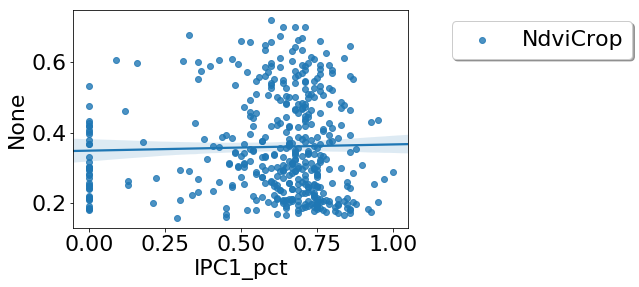

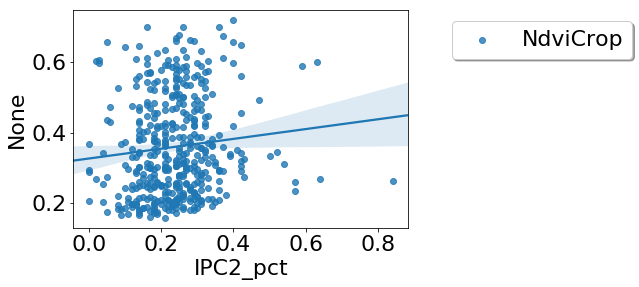

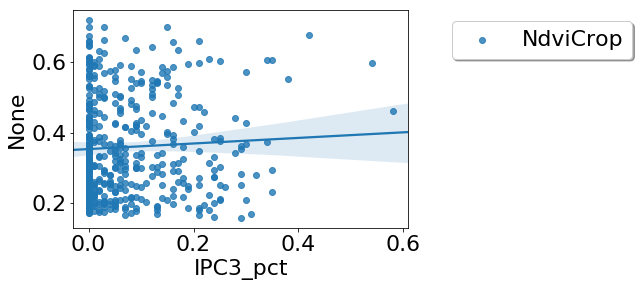

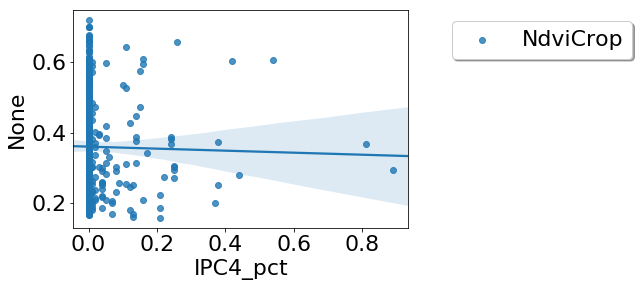

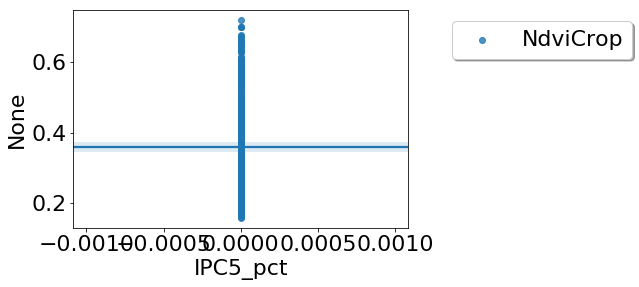

In [15]:
IPC_pct_corr_plots(somalia_bframe)

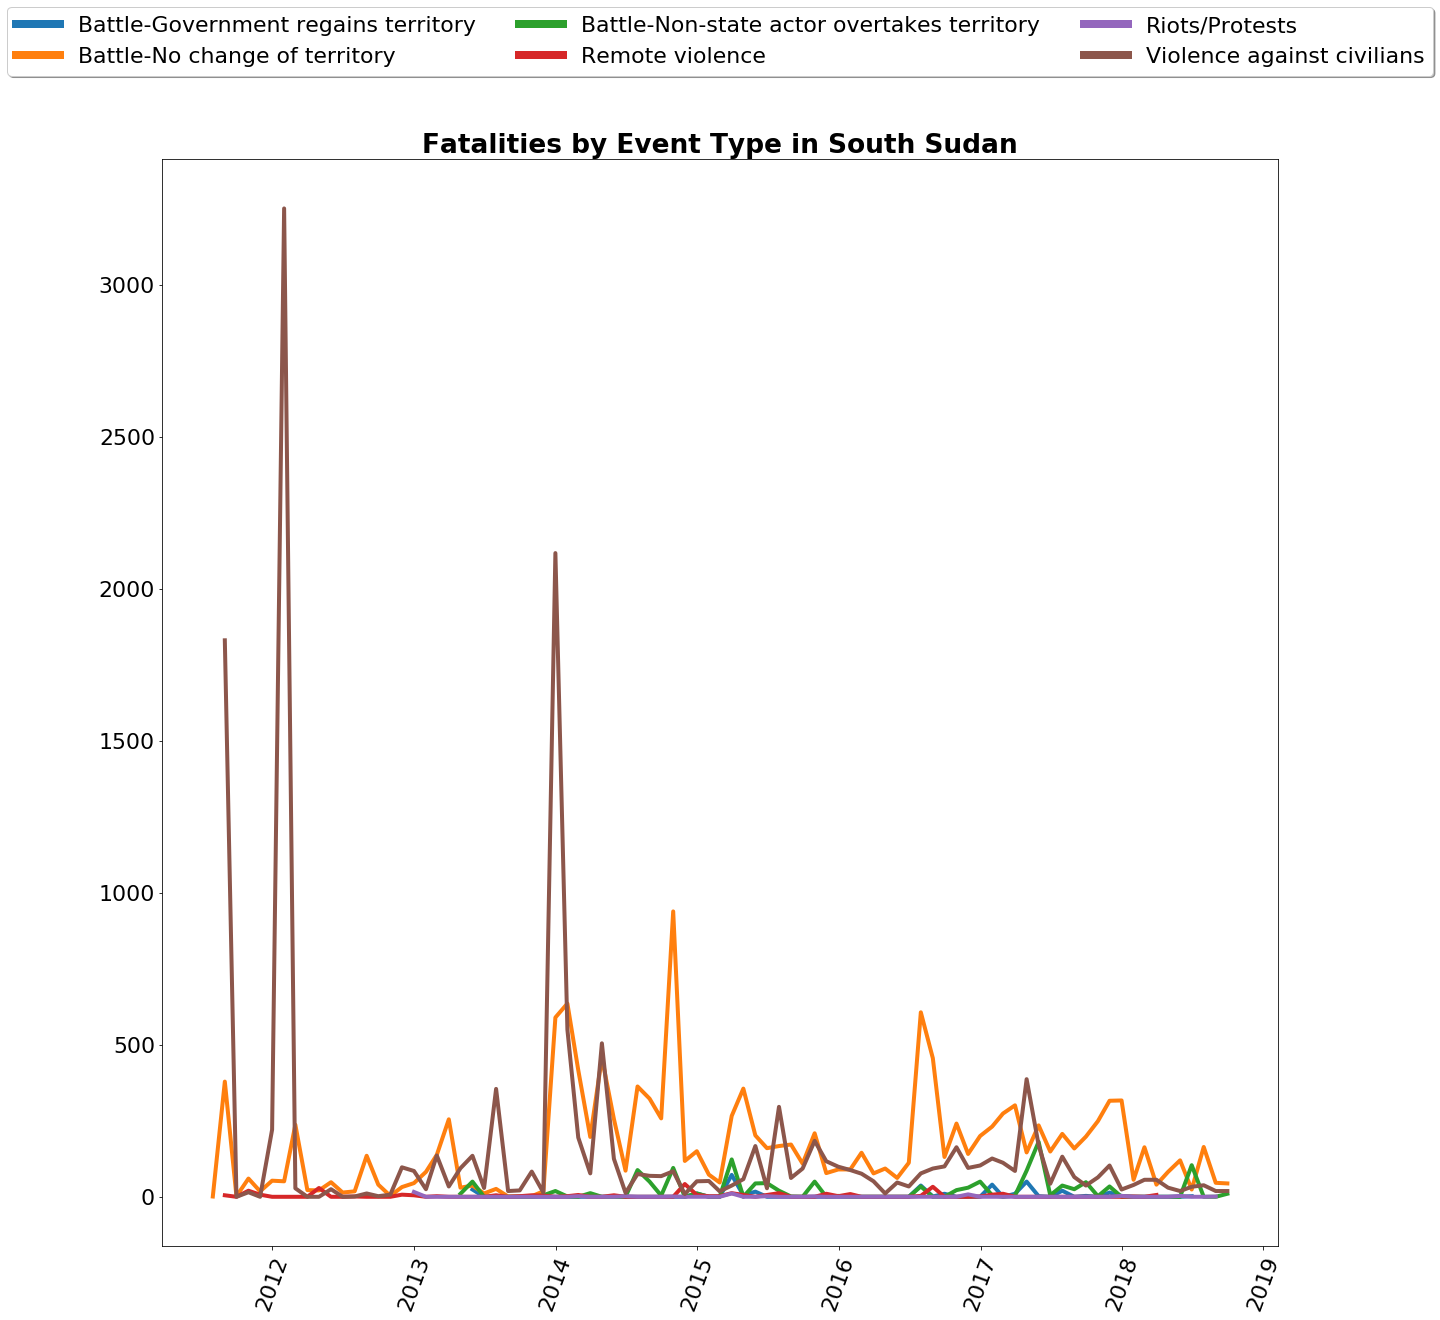

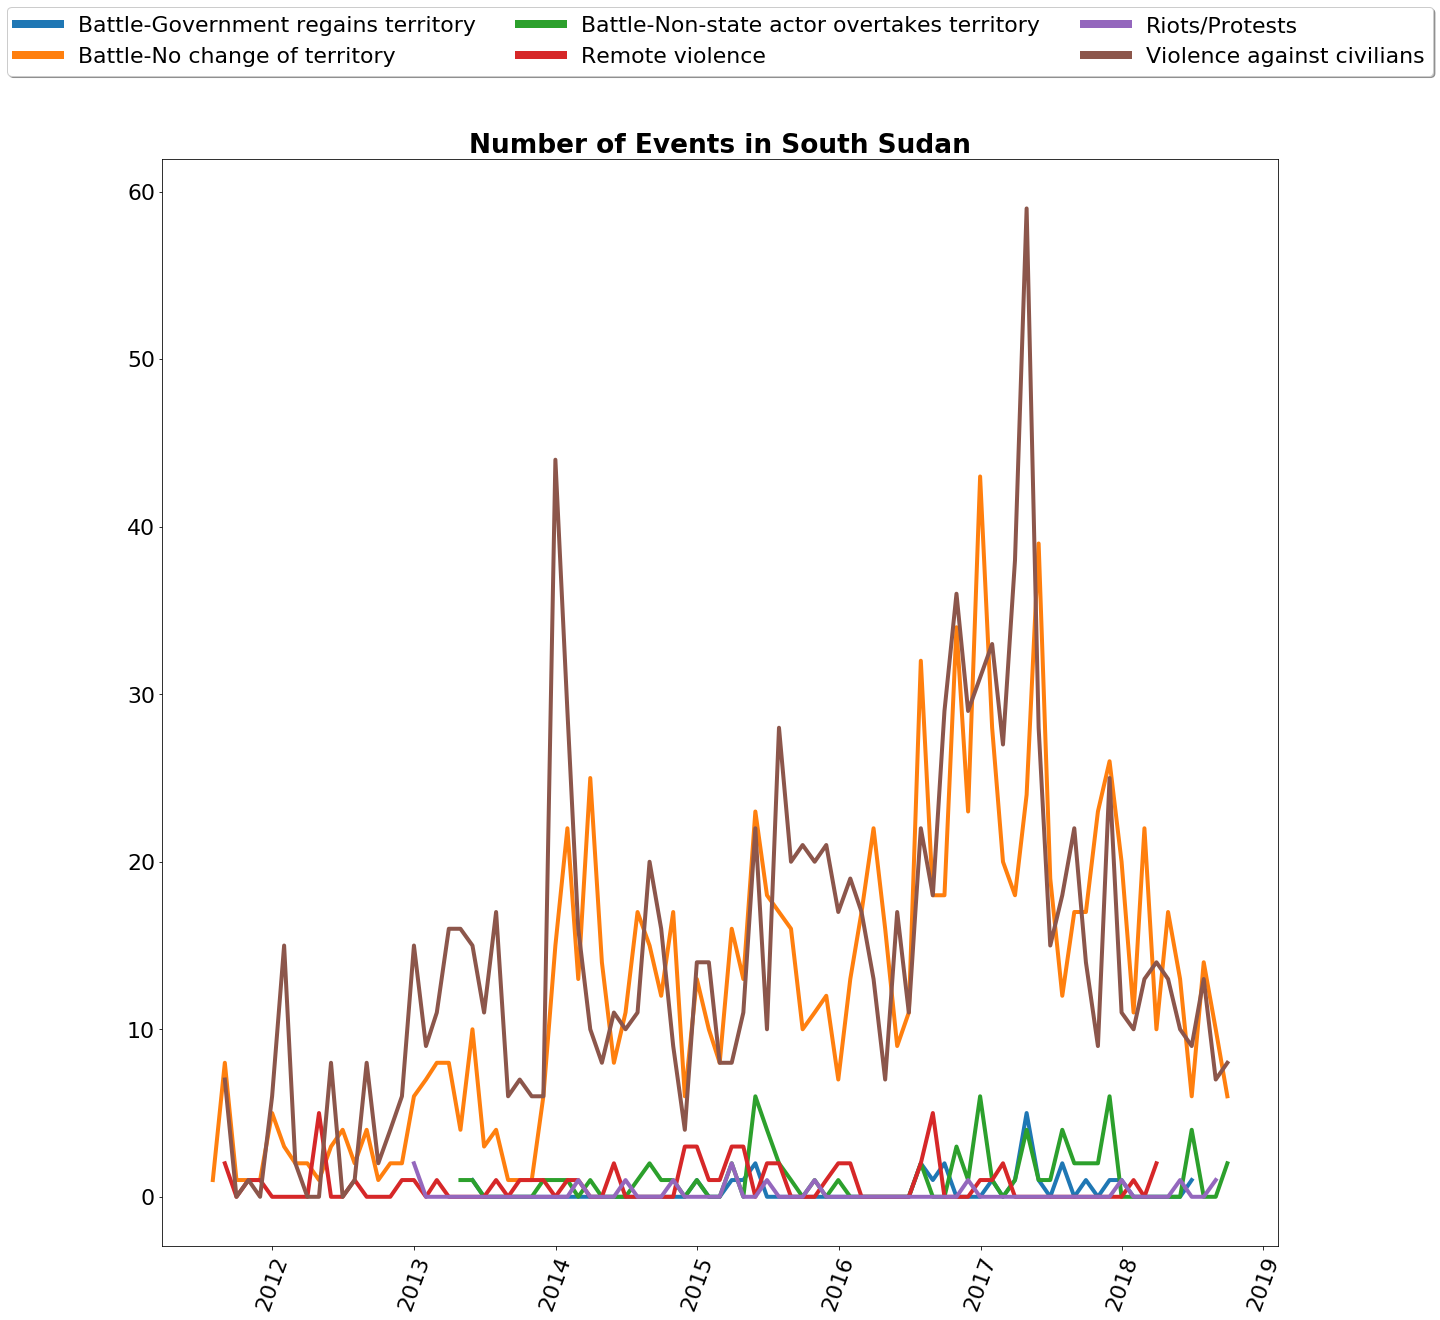

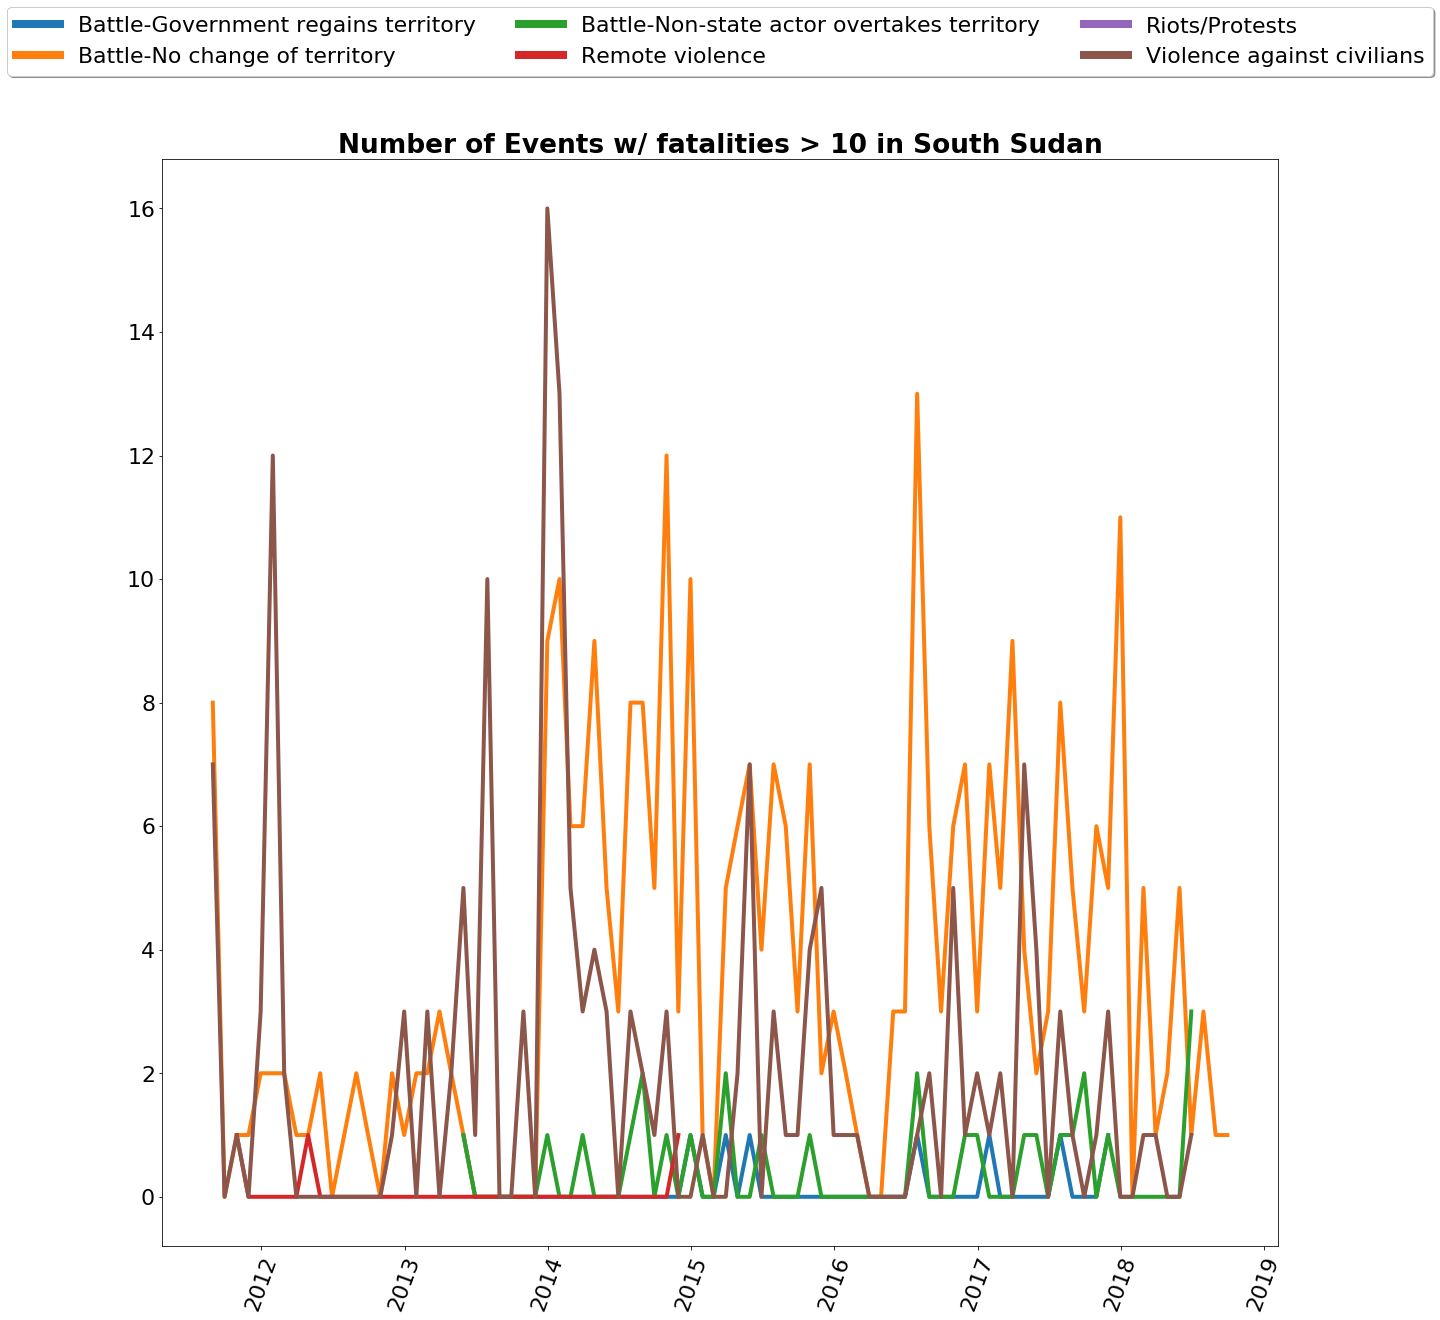

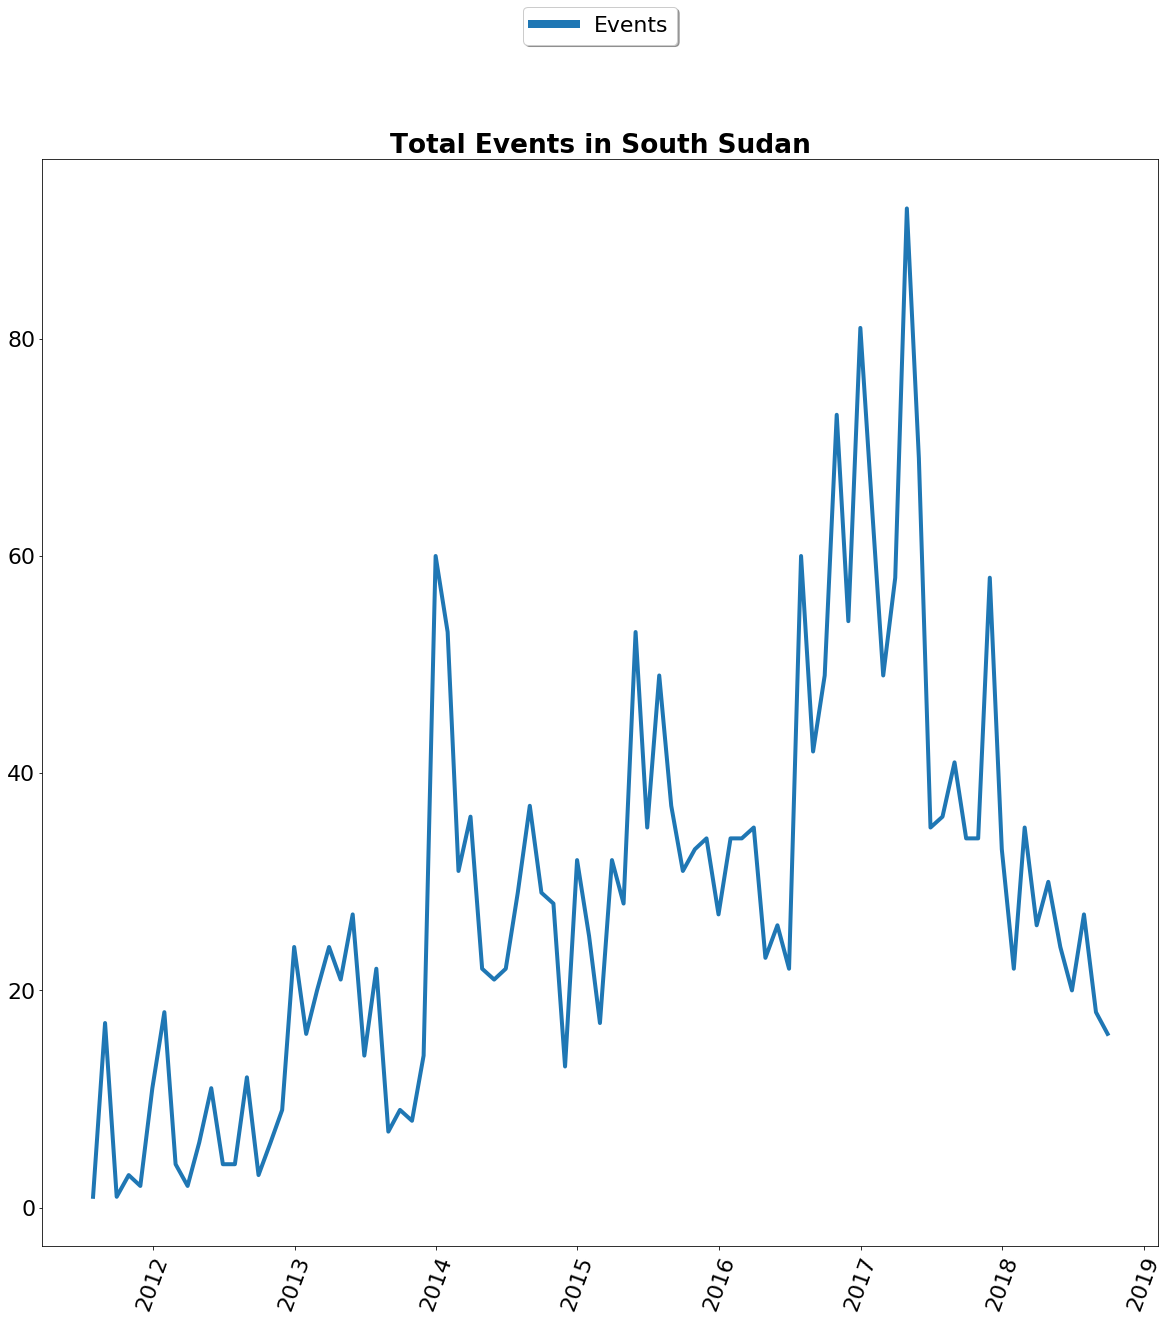

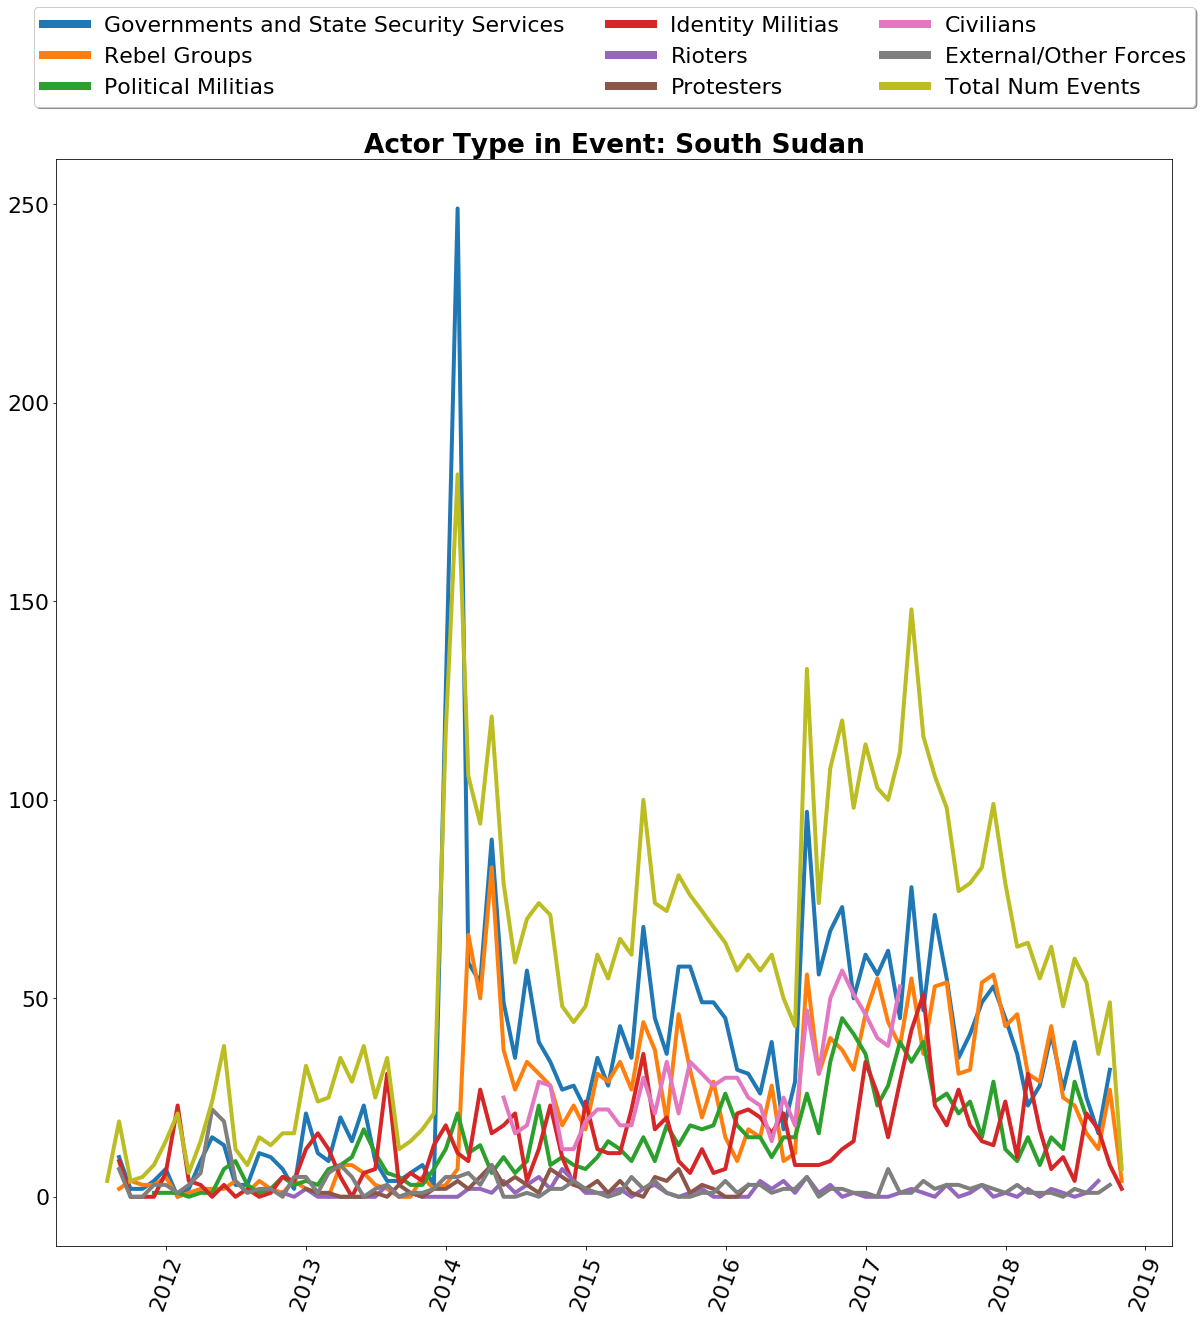

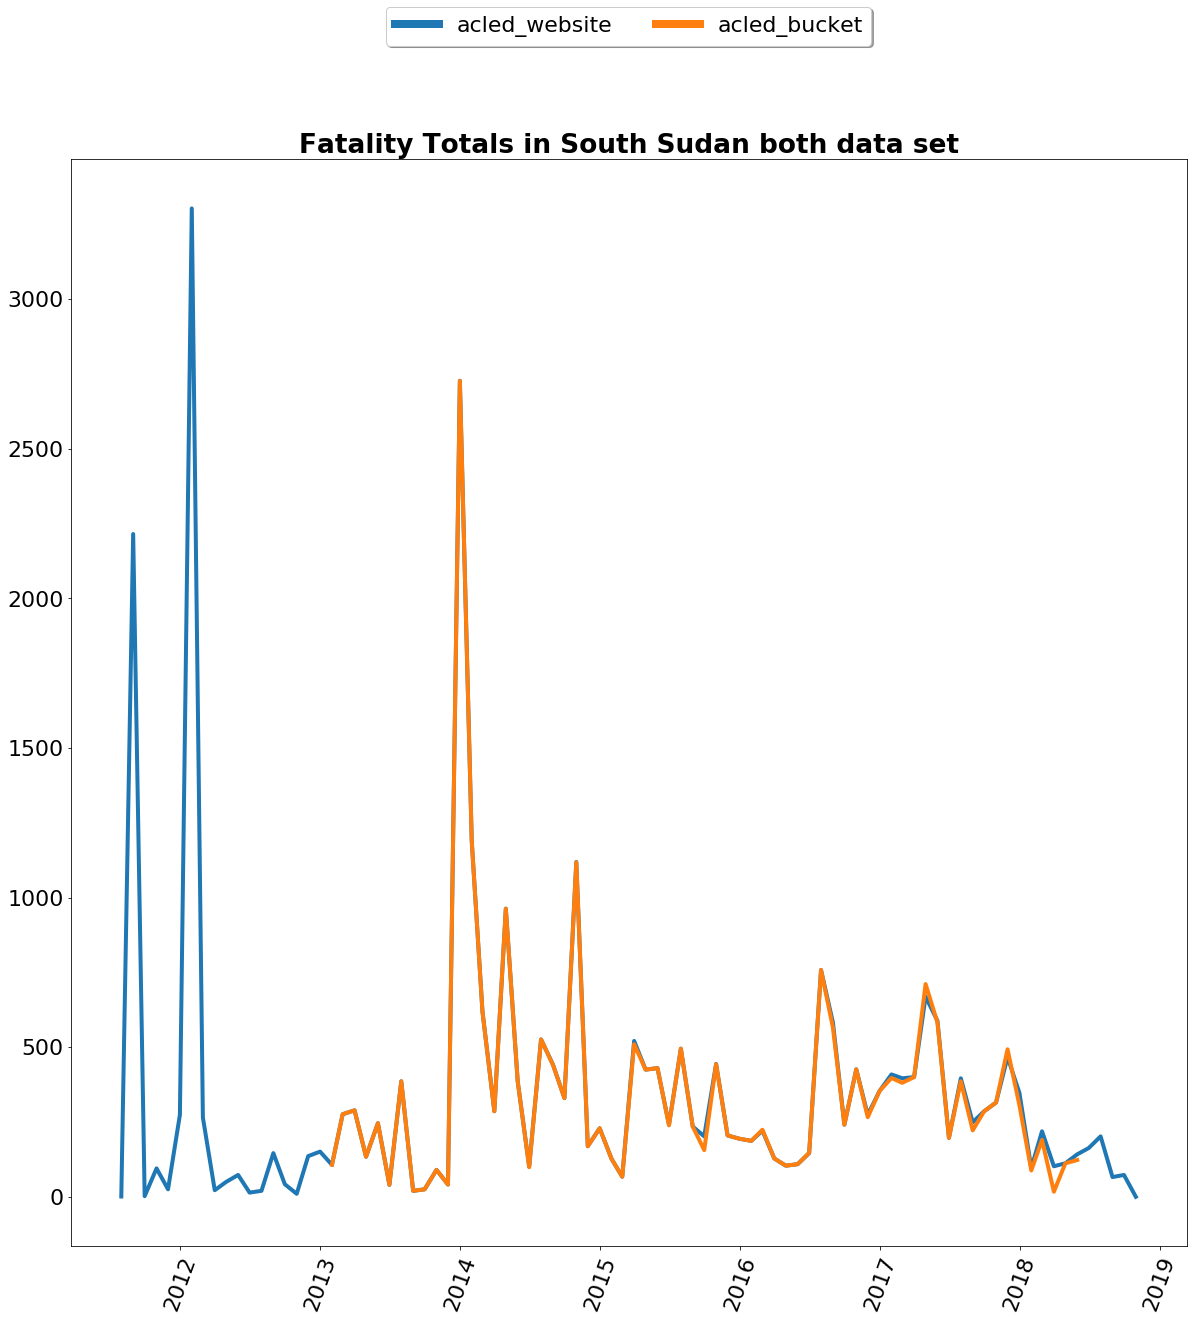

In [16]:
plot_fatalities_by_events(southsudan_aframe, 'South Sudan')
title_str = 'Number of Events in South Sudan'
event_counts(southsudan_aframe, title_str, 'event_type')
title_str = 'Number of Events w/ fatalities > 10 in South Sudan'
event_counts(southsudan_aframe, title_str, 'event_type', 10)
title_str = 'Total Events in South Sudan'
event_counts(southsudan_aframe, title_str)
actor_type(southsudan_aframe, 'South Sudan')
website_vs_bucket_fatalities(southsudan_aframe, southsudan_bframe, 'South Sudan')

NdviCrop.2014_09  NdviCrop.2015_04  NdviCrop.2015_08  NdviCrop.2016_04  \
count         52.000000         52.000000         52.000000         52.000000   
mean           0.707509          0.439335          0.700199          0.410048   
std            0.078451          0.181194          0.088571          0.193719   
min            0.577400          0.209500          0.486400          0.187177   
25%            0.642288          0.262868          0.644658          0.241963   
50%            0.699219          0.427290          0.685351          0.350662   
75%            0.778588          0.584406          0.774895          0.531814   
max            0.853305          0.737045          0.856665          0.768580   

       NdviCrop.2016_12  NdviCrop.2017_05  NdviCrop.2017_09  NdviCrop.2018_01  
count         52.000000         52.000000         52.000000         52.000000  
mean           0.493247          0.483167          0.723638          0.401754  
std            0.150297          0.209291          0.079774          0.130685  
min            0.276277          0.191267          0.568183          0.239890  
25%            0.362852          0.290697          0.668688          0.296439  
50%            0.487392          0.470952          0.722599          0.365731  
75%            0.614796          0.670993          0.799542          0.484500  
max            0.777035          0.844940          0.858670          0.704075

number of Nan in NdviCrop


NdviCrop.2014_09    26
NdviCrop.2015_04    26
NdviCrop.2015_08    26
NdviCrop.2016_04    26
NdviCrop.2016_12    26
NdviCrop.2017_05    26
NdviCrop.2017_09    26
NdviCrop.2018_01    26
dtype: int64

Correlation between IPC1_pct and NdviCrop by month
Correlation between IPC1_pct and NdviCrop all months: 
0.3395311808102369


Pearson's
.2014_09     0.297135
.2015_04     0.784067
.2015_08     0.468955
.2016_04     0.512697
.2016_12     0.140480
.2017_05     0.341731
.2017_09     0.286366
.2018_01     0.278798
All Months   0.339531

.2015_04


NdviCrop.2014_09  NdviCrop.2015_04  NdviCrop.2015_08  NdviCrop.2016_04  \
count         52.000000         52.000000         52.000000         52.000000   
mean           0.707509          0.439335          0.700199          0.410048   
std            0.078451          0.181194          0.088571          0.193719   
min            0.577400          0.209500          0.486400          0.187177   
25%            0.642288          0.262868          0.644658          0.241963   
50%            0.699219          0.427290          0.685351          0.350662   
75%            0.778588          0.584406          0.774895          0.531814   
max            0.853305          0.737045          0.856665          0.768580   

       NdviCrop.2016_12  NdviCrop.2017_05  NdviCrop.2017_09  NdviCrop.2018_01  
count         52.000000         52.000000         52.000000         52.000000  
mean           0.493247          0.483167          0.723638          0.401754  
std            0.150297          0.209291          0.079774          0.130685  
min            0.276277          0.191267          0.568183          0.239890  
25%            0.362852          0.290697          0.668688          0.296439  
50%            0.487392          0.470952          0.722599          0.365731  
75%            0.614796          0.670993          0.799542          0.484500  
max            0.777035          0.844940          0.858670          0.704075

number of Nan in NdviCrop


NdviCrop.2014_09    26
NdviCrop.2015_04    26
NdviCrop.2015_08    26
NdviCrop.2016_04    26
NdviCrop.2016_12    26
NdviCrop.2017_05    26
NdviCrop.2017_09    26
NdviCrop.2018_01    26
dtype: int64

Correlation between IPC2_pct and NdviCrop by month
Correlation between IPC2_pct and NdviCrop all months: 
-0.19754601565763102


Pearson's
.2014_09    -0.370301
.2015_04    -0.433261
.2015_08    -0.187465
.2016_04     0.024593
.2016_12    -0.184651
.2017_05    -0.006309
.2017_09     0.411596
.2018_01     0.133893
All Months  -0.197546

.2015_04


NdviCrop.2014_09  NdviCrop.2015_04  NdviCrop.2015_08  NdviCrop.2016_04  \
count         52.000000         52.000000         52.000000         52.000000   
mean           0.707509          0.439335          0.700199          0.410048   
std            0.078451          0.181194          0.088571          0.193719   
min            0.577400          0.209500          0.486400          0.187177   
25%            0.642288          0.262868          0.644658          0.241963   
50%            0.699219          0.427290          0.685351          0.350662   
75%            0.778588          0.584406          0.774895          0.531814   
max            0.853305          0.737045          0.856665          0.768580   

       NdviCrop.2016_12  NdviCrop.2017_05  NdviCrop.2017_09  NdviCrop.2018_01  
count         52.000000         52.000000         52.000000         52.000000  
mean           0.493247          0.483167          0.723638          0.401754  
std            0.150297          0.209291          0.079774          0.130685  
min            0.276277          0.191267          0.568183          0.239890  
25%            0.362852          0.290697          0.668688          0.296439  
50%            0.487392          0.470952          0.722599          0.365731  
75%            0.614796          0.670993          0.799542          0.484500  
max            0.777035          0.844940          0.858670          0.704075

number of Nan in NdviCrop


NdviCrop.2014_09    26
NdviCrop.2015_04    26
NdviCrop.2015_08    26
NdviCrop.2016_04    26
NdviCrop.2016_12    26
NdviCrop.2017_05    26
NdviCrop.2017_09    26
NdviCrop.2018_01    26
dtype: int64

Correlation between IPC3_pct and NdviCrop by month
Correlation between IPC3_pct and NdviCrop all months: 
-0.2621366329181412


Pearson's
.2014_09    -0.242526
.2015_04    -0.575195
.2015_08    -0.295083
.2016_04    -0.305908
.2016_12    -0.125700
.2017_05    -0.216337
.2017_09    -0.225706
.2018_01    -0.232458
All Months  -0.262137

.2015_04


NdviCrop.2014_09  NdviCrop.2015_04  NdviCrop.2015_08  NdviCrop.2016_04  \
count         52.000000         52.000000         52.000000         52.000000   
mean           0.707509          0.439335          0.700199          0.410048   
std            0.078451          0.181194          0.088571          0.193719   
min            0.577400          0.209500          0.486400          0.187177   
25%            0.642288          0.262868          0.644658          0.241963   
50%            0.699219          0.427290          0.685351          0.350662   
75%            0.778588          0.584406          0.774895          0.531814   
max            0.853305          0.737045          0.856665          0.768580   

       NdviCrop.2016_12  NdviCrop.2017_05  NdviCrop.2017_09  NdviCrop.2018_01  
count         52.000000         52.000000         52.000000         52.000000  
mean           0.493247          0.483167          0.723638          0.401754  
std            0.150297          0.209291          0.079774          0.130685  
min            0.276277          0.191267          0.568183          0.239890  
25%            0.362852          0.290697          0.668688          0.296439  
50%            0.487392          0.470952          0.722599          0.365731  
75%            0.614796          0.670993          0.799542          0.484500  
max            0.777035          0.844940          0.858670          0.704075

number of Nan in NdviCrop


NdviCrop.2014_09    26
NdviCrop.2015_04    26
NdviCrop.2015_08    26
NdviCrop.2016_04    26
NdviCrop.2016_12    26
NdviCrop.2017_05    26
NdviCrop.2017_09    26
NdviCrop.2018_01    26
dtype: int64

Correlation between IPC4_pct and NdviCrop by month
Correlation between IPC4_pct and NdviCrop all months: 
-0.06606263401657218


Pearson's
.2014_09    -0.069951
.2015_04    -0.258360
.2015_08    -0.261811
.2016_04    -0.245814
.2016_12     0.041263
.2017_05    -0.215432
.2017_09    -0.476292
.2018_01    -0.145693
All Months  -0.066063

.2017_09


NdviCrop.2014_09  NdviCrop.2015_04  NdviCrop.2015_08  NdviCrop.2016_04  \
count         52.000000         52.000000         52.000000         52.000000   
mean           0.707509          0.439335          0.700199          0.410048   
std            0.078451          0.181194          0.088571          0.193719   
min            0.577400          0.209500          0.486400          0.187177   
25%            0.642288          0.262868          0.644658          0.241963   
50%            0.699219          0.427290          0.685351          0.350662   
75%            0.778588          0.584406          0.774895          0.531814   
max            0.853305          0.737045          0.856665          0.768580   

       NdviCrop.2016_12  NdviCrop.2017_05  NdviCrop.2017_09  NdviCrop.2018_01  
count         52.000000         52.000000         52.000000         52.000000  
mean           0.493247          0.483167          0.723638          0.401754  
std            0.150297          0.209291          0.079774          0.130685  
min            0.276277          0.191267          0.568183          0.239890  
25%            0.362852          0.290697          0.668688          0.296439  
50%            0.487392          0.470952          0.722599          0.365731  
75%            0.614796          0.670993          0.799542          0.484500  
max            0.777035          0.844940          0.858670          0.704075

number of Nan in NdviCrop


NdviCrop.2014_09    26
NdviCrop.2015_04    26
NdviCrop.2015_08    26
NdviCrop.2016_04    26
NdviCrop.2016_12    26
NdviCrop.2017_05    26
NdviCrop.2017_09    26
NdviCrop.2018_01    26
dtype: int64

Correlation between IPC5_pct and NdviCrop by month
Correlation between IPC5_pct and NdviCrop all months: 
-0.005513569706447701


Pearson's
.2014_09          NaN
.2015_04          NaN
.2015_08          NaN
.2016_04    -0.005348
.2016_12     0.081144
.2017_05    -0.029896
.2017_09    -0.275246
.2018_01          NaN
All Months  -0.005514

.2017_09


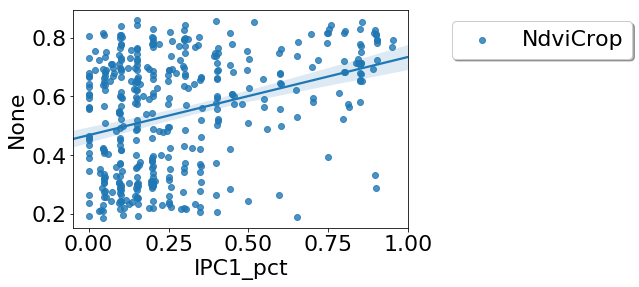

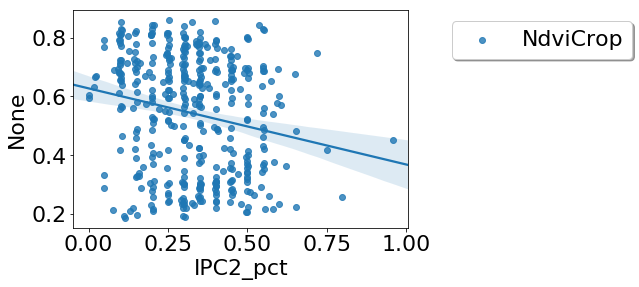

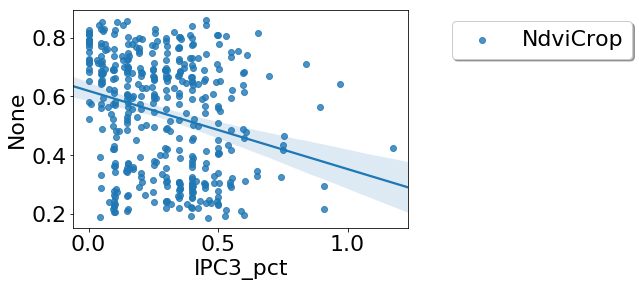

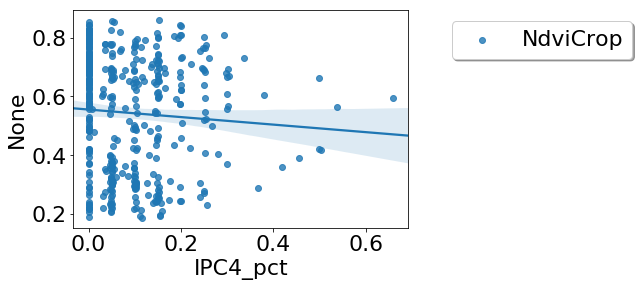

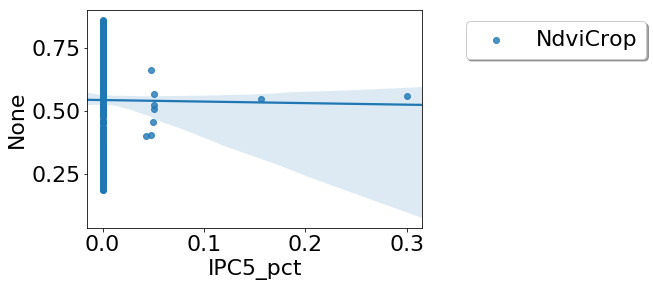

In [17]:
IPC_pct_corr_plots(southsudan_bframe)

2    84
3    74
1     6
4     4
0     2
dtype: int64
1    345
2     69
3     27
dtype: int64
1    234
2    187
0     37
3     30
dtype: int64
2    703
3    231
1     98
4     78
0     47
5     11
dtype: int64
3    331
2    166
4     77
1     44
0      5
5      1
dtype: int64


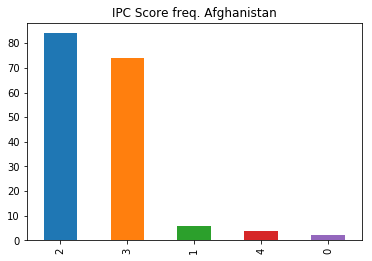

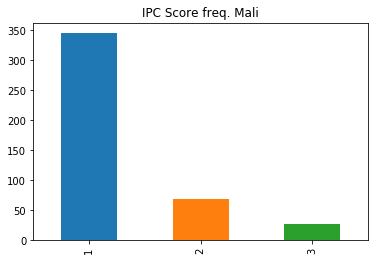

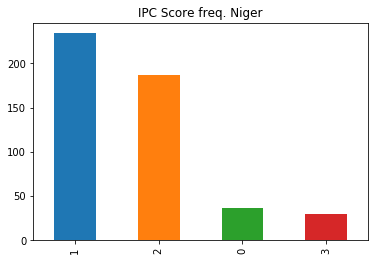

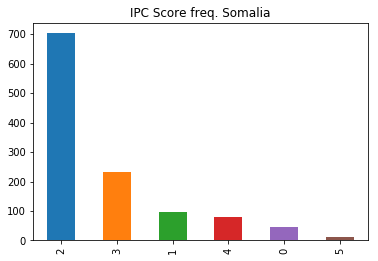

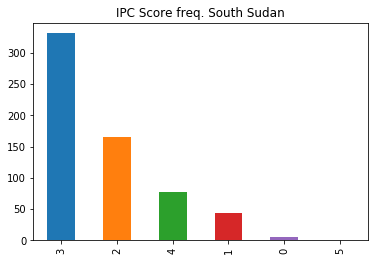

In [8]:
country = 'Afghanistan'
score_freq(b_frame, country)
country = 'Mali'
score_freq(mali_bframe, country)
country = 'Niger'
score_freq(niger_bframe, country)
country = 'Somalia'
score_freq(somalia_bframe, country)
country = 'South Sudan'
score_freq(southsudan_bframe, country)

#### 

Afghanistan
[2 3 1 4 0]
Somalia
[2 3 1 4 0 5]
Mali
[1 2 3]
South Sudan
[3 2 4 1 0 5]
Niger
[1 2 0 3]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



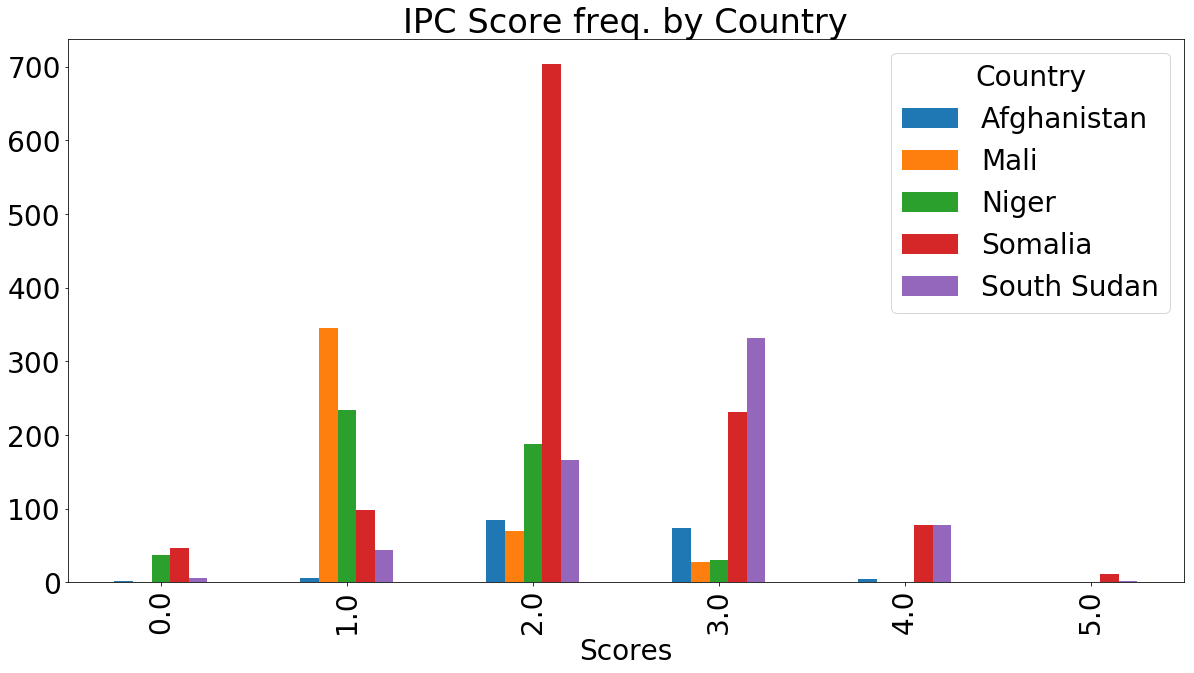

In [9]:
def multi_country_score_freq(scores, by_country=False):
    plt.rcParams.update({'font.size': 28})
    plt.rcParams.update({'figure.figsize': (20,10)})
    #plt.figure(figsize=(20,20))
    fig, ax = plt.subplots()
    ax.set(title='IPC Score freq. by Country')
    #ax.set(figure=plt.figure(figsize=(20,20)))
    s = pd.Series([])
    dumb = pd.DataFrame(['scores', 'country'])
    for country in scores:
        print (country)
        bucket_frame = scores[country]
        phase_scores, m, d = get_cols_by_datelist('1/1/10', pd.datetime.today(), 'IPC_Phase', bucket_frame)
        if by_country:
            df = bucket_frame[phase_scores]#.astype(str) +' '+ country
        else:
            df = bucket_frame[phase_scores]
        
        """for c in phase_scores:
            df[c] = bucket_frame[c]"""
        temp = [df[col] for col in df]
        #temp.append(s)
        s = pd.concat(temp)
        score_count = s.value_counts()
        print(score_count.index.values)
        cur = pd.DataFrame({'Scores':s})
        #cur['scores'] = s
        cur['Country'] = country
        dumb = pd.concat([dumb, cur])
    #score_count.sort_index(inplace=True)
    #countries = [c.split(' ')[1] for c in score_count.index.values]
    #scores = [c.split(' ')[0] for c in score_count.index.values]
    #dfx= pd.DataFrame({'counts': score_count.values, 'country': countries, 'scores':scores})
    #dfx = df.groupby(['country'])
    #display(dfx.groups.keys())
    #print(score_count)
    #score_count.plot(ax=ax, kind='bar')
    #df.groupby('year').case_status.value_counts().unstack(0).
    dumb.groupby('Country').Scores.value_counts().unstack(0).plot(ax=ax,kind='bar')
    
    


multi_country_score_freq({'Afghanistan': b_frame,'Somalia': somalia_bframe, 'Mali': mali_bframe, 'South Sudan': southsudan_bframe, 'Niger': niger_bframe}, True)
